In [1]:
# df = pandas.read_excel(open('your_xls_xlsx_filename','rb'), sheetname=2)
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import math
import os
from datetime import *

#changes displaying
sns.set_context("poster")

In [2]:
#BDR A321
filepath="C:/Users/to09267/Documents/A321XLR"
#file_name="A319N_PW_CAT3_17_03_2020_2.xls"
#file_name="M6839_V432_V434_V440_V441_autoland_flat_std59.csv"
#file_name='autoland_standard_59.csv'
#file_name='A321_XLR_all_app.csv'
file_name='A321EIS_CAT3.csv'


In [3]:
#Read dataset
#dataset= pd.read_csv(os.path.join(filepath, file_name),sep=';',header=(0),skiprows=0) 
#dataset=pd.read_csv(os.path.join(filepath, file_name),skiprows=13,sheetname='extraction_A319N_PW_CAT3_31_03_')

In [4]:
liste_na=['**********','f10.4']

In [5]:
#for python 3
dataset = pd.read_csv(os.path.join(filepath, file_name),sep=',',skiprows=0,header=(0),encoding = 'latin-1',na_values=liste_na)

In [6]:
#recuperation des types
datatype=dataset[:1]
print (datatype)

    AC_NB    AP ATHR  BDR_COMMENTS BRAKE  BULLE_SPAT  CAT_ATT       CG  CGZ  \
0  M11000  DUAL   ON           NaN   NaN       22086      NaN  27.2458  NaN   

     COMMENTS  ... W_SPD      WGT WIND_DESCRIP WX_MEA_1_50 WY_MEA_1_50  \
0  Calm wind.  ...     0  72.1324          NaN      2.3621      1.8237   

   XR_NWTCH    XR_TCH YR_MAX_RO YR_NWTCH  YR_TCH  
0  581.3883  421.1478   -1.6905  -1.5496 -1.6814  

[1 rows x 169 columns]


In [7]:
#suppression des unités du dataset
#dataset = dataset.drop([0])

In [8]:
dataset.head()

AC_NB    AP ATHR  BDR_COMMENTS BRAKE  BULLE_SPAT  CAT_ATT       CG  CGZ  \
0  M11000  DUAL   ON           NaN   NaN       22086      NaN  27.2458  NaN   
1  M11000  DUAL   ON           NaN   NaN       22086      NaN  27.1605  NaN   
2  M11000  DUAL   ON           NaN   NaN       22086      NaN  27.0514  NaN   
3  M11000  DUAL   ON           NaN   NaN       22086      NaN  27.0507  NaN   
4  M11000  DUAL   ON           NaN   NaN       22086      NaN  27.0199  NaN   

     COMMENTS  ... W_SPD      WGT WIND_DESCRIP WX_MEA_1_50 WY_MEA_1_50  \
0  Calm wind.  ...     0  72.1324          NaN      2.3621      1.8237   
1  Calm wind.  ...     0  71.6256          NaN      2.6548      0.4576   
2         NaN  ...     2  71.1823          NaN      0.4708      1.3768   
3         NaN  ...     3  70.7235          NaN      0.6609      0.3351   
4         NaN  ...     2  70.0915          NaN     -0.2675     -0.5922   

   XR_NWTCH    XR_TCH YR_MAX_RO YR_NWTCH  YR_TCH  
0  581.3883  421.1478   -1.6905  -1.5496 -1.6814  
1  582.3378  422.5276   -0.8797  -0.8309 -0.8797  
2  558.9481  350.2886   -4.1503  -3.8131 -3.7472  
3  558.7096  359.6701   -2.0951  -1.8251 -2.0797  
4  596.9416  455.3888   -1.5278  -1.4289 -0.8681  

[5 rows x 169 columns]

In [9]:
datadev = pd.read_csv(os.path.join(filepath, "atld_pw_bdr - atld_pw_bdr.csv"),sep=',',skiprows=0,header=(0),encoding = 'latin-1',na_values=liste_na)

In [10]:
datadev.head()

AC_NB    AP ATHR BDR_COMMENTS BRAKE  BULLE_SPAT  CAT_ATT       CG  CGZ  \
0  M11058  DUAL   ON          NaN   NaN       22086      NaN  11.7979  NaN   
1  M11058  DUAL   ON          NaN   NaN       22086      NaN  11.7856  NaN   
2  M11058  DUAL   ON          NaN   NaN       22086      NaN  11.8136  NaN   
3  M11058  DUAL   ON          NaN   NaN       22086      NaN  11.7926  NaN   
4  M11058  DUAL   ON          NaN   NaN       22086      NaN  11.3050  NaN   

   COMMENTS  ... W_SPD      WGT WIND_DESCRIP WX_MEA_1_50 WY_MEA_1_50  \
0       NaN  ...   2.0  63.9229          NaN      2.3116      0.7526   
1       NaN  ...   2.0  63.5798          NaN      2.4112     -1.2406   
2       NaN  ...   3.0  63.2519          NaN      2.2254     -1.2796   
3       NaN  ...   1.0  62.9385          NaN      1.0151     -1.0312   
4       NaN  ...   2.0  62.6526          NaN      0.3456      0.4500   

   XR_NWTCH    XR_TCH YR_MAX_RO  YR_NWTCH  YR_TCH  
0  519.7349  358.8166   -1.1914   -0.6189 -0.3171  
1  495.3152  334.4957   -0.8211   -0.6593 -0.7954  
2  515.4762  333.7890   -0.5791    0.1040  0.0644  
3  467.8465  289.0013   -1.0806   -0.3430 -0.2951  
4  471.4369  320.2713   -1.5574   -0.6495 -0.6301  

[5 rows x 169 columns]

In [11]:
liste = list(dataset)

for data in liste:
    typ=type (dataset[data][1])
    print (data,typ)  

AC_NB <class 'str'>
AP <class 'str'>
ATHR <class 'str'>
BDR_COMMENTS <class 'numpy.float64'>
BRAKE <class 'float'>
BULLE_SPAT <class 'numpy.int64'>
CAT_ATT <class 'numpy.float64'>
CG <class 'numpy.float64'>
CGZ <class 'numpy.float64'>
COMMENTS <class 'str'>
CONF <class 'str'>
CONF_LOCSTAR <class 'str'>
CREW <class 'str'>
CTF <class 'str'>
DATE_ESSAI <class 'str'>
DATE_EXPLOIT <class 'str'>
DED_H_GA <class 'numpy.float64'>
DED_WGT_CG <class 'str'>
DED_WIND <class 'str'>
DENSITY_ALT <class 'numpy.float64'>
DH_GA <class 'numpy.float64'>
DIST_LOCSTAR <class 'numpy.float64'>
DPSI_ALIG <class 'numpy.float64'>
DPSI_TCH <class 'numpy.float64'>
DT_50_TCH <class 'numpy.float64'>
DT_ABAT <class 'numpy.float64'>
DT_FLARE <class 'numpy.float64'>
DTRK_LOCSTAR <class 'numpy.float64'>
DVC_100 <class 'numpy.float64'>
DVC_200 <class 'numpy.float64'>
DVC_300 <class 'numpy.float64'>
DVC_400 <class 'numpy.float64'>
DVC_50 <class 'numpy.float64'>
DVC_500 <class 'numpy.float64'>
DVC_MAX_5_50 <class 'numpy.fl

In [12]:
liste = list(dataset)
print (liste)

['AC_NB', 'AP', 'ATHR', 'BDR_COMMENTS', 'BRAKE', 'BULLE_SPAT', 'CAT_ATT', 'CG', 'CGZ', 'COMMENTS', 'CONF', 'CONF_LOCSTAR', 'CREW', 'CTF', 'DATE_ESSAI', 'DATE_EXPLOIT', 'DED_H_GA', 'DED_WGT_CG', 'DED_WIND', 'DENSITY_ALT', 'DH_GA', 'DIST_LOCSTAR', 'DPSI_ALIG', 'DPSI_TCH', 'DT_50_TCH', 'DT_ABAT', 'DT_FLARE', 'DTRK_LOCSTAR', 'DVC_100', 'DVC_200', 'DVC_300', 'DVC_400', 'DVC_50', 'DVC_500', 'DVC_MAX_5_50', 'DVC_MEA_5_50', 'DVC_MIN_5_50', 'DVC_TCH', 'DVC_X0', 'DVC_X60', 'ENG', 'ENG_CND', 'ETAT_SPAT', 'EXP_NB', 'FLT', 'GMT_REF', 'GS_100', 'GS_200', 'GS_300', 'GS_400', 'GS_500', 'GS_MAX_2_1', 'GS_MAX_3_1', 'GS_MAX_3_2', 'GS_MAX_5_1', 'GSPD_AP_OFF', 'GSPD_LOCSTAR', 'GSPD_NWTCH', 'GSPD_TCH', 'GSPD_YR_MAX', 'H_FLARE', 'H_GA', 'H_MIN_GA', 'HRA_FLARE', 'HRA_GA', 'HRA_X0', 'HRA_X60', 'LOC_100', 'LOC_200', 'LOC_300', 'LOC_400', 'LOC_50', 'LOC_500', 'LOC_MAX_1_T', 'LOC_MAX_2_1', 'LOC_MAX_3_1', 'LOC_MAX_3_15', 'LOC_MAX_3_2', 'LOC_MAX_3_50', 'LOC_MAX_3_T', 'LOC_MAX_5_15', 'LOC_NWTCH', 'LOC_TCH', 'LOC_X0'

In [13]:
def parse_maybe_int(serie):
    result=[]
    for i in serie:
        if np.isnan(i)or i>90000:
            i=None
        else:
            i=int(i)
        result.append(i)
    return result
    
def parse_maybe_float(x):
    if x == '':
        return None
    else:
        return float(x)
    
def parse_range_float(serie):
    result=[]
    for x in serie:
        if x < -9000 or x > 9000 or np.isnan(x):
            y=None
        else:
            y=float(x)
#        print x,y        
        result.append(y)
    return result

def parse_force_float(x):
        return float(x)

In [14]:
#forçage des types
liste = list(dataset)

for data in liste:
    typ=type (dataset[data][1])
    typ_bdr=datatype.loc[0,data]
    typ_bdr=datatype.loc[0,data]
    print (data,typ,typ_bdr)

    
    if typ==np.int64:
        dataset[data]=parse_maybe_int(dataset[data])
    if typ==np.float64:
        dataset[data]=parse_range_float(dataset[data])
        
    if ((typ_bdr=="f10.4") and (typ=='str')):
#        dataset[data]=parse_force_float(dataset[data])
#         dataset[data]=dataset[data].astype(float)
        dataset[data]=pd.to_numeric(dataset[data], errors='coerce')
        
#    if ((typ=='str')):
        dataset[data]=parse_range_float(dataset[data])

AC_NB <class 'str'> M11000
AP <class 'str'> DUAL
ATHR <class 'str'> ON
BDR_COMMENTS <class 'numpy.float64'> nan
BRAKE <class 'float'> nan
BULLE_SPAT <class 'numpy.int64'> 22086
CAT_ATT <class 'numpy.float64'> nan
CG <class 'numpy.float64'> 27.2458
CGZ <class 'numpy.float64'> nan
COMMENTS <class 'str'> Calm wind.
CONF <class 'str'> FULL
CONF_LOCSTAR <class 'str'> 2A
CREW <class 'str'> EASA
CTF <class 'str'> C
DATE_ESSAI <class 'str'> 06/03/2024
DATE_EXPLOIT <class 'str'> 02/04/24 9:55
DED_H_GA <class 'numpy.float64'> nan
DED_WGT_CG <class 'str'> HVY/MED
DED_WIND <class 'str'> -
DENSITY_ALT <class 'numpy.float64'> nan
DH_GA <class 'numpy.float64'> nan
DIST_LOCSTAR <class 'numpy.float64'> 14.7567
DPSI_ALIG <class 'numpy.float64'> 0.4883
DPSI_TCH <class 'numpy.float64'> -0.0349
DT_50_TCH <class 'numpy.float64'> 6.75
DT_ABAT <class 'numpy.float64'> 1.625
DT_FLARE <class 'numpy.float64'> 7.125
DTRK_LOCSTAR <class 'numpy.float64'> -32.514
DVC_100 <class 'numpy.float64'> 2.4129
DVC_200 <class 

In [15]:
liste = list(dataset)

for data in liste:
    typ=type (dataset[data][1])
    print (data,typ) 

AC_NB <class 'str'>
AP <class 'str'>
ATHR <class 'str'>
BDR_COMMENTS <class 'NoneType'>
BRAKE <class 'float'>
BULLE_SPAT <class 'numpy.int64'>
CAT_ATT <class 'NoneType'>
CG <class 'numpy.float64'>
CGZ <class 'NoneType'>
COMMENTS <class 'str'>
CONF <class 'str'>
CONF_LOCSTAR <class 'str'>
CREW <class 'str'>
CTF <class 'str'>
DATE_ESSAI <class 'str'>
DATE_EXPLOIT <class 'str'>
DED_H_GA <class 'NoneType'>
DED_WGT_CG <class 'str'>
DED_WIND <class 'str'>
DENSITY_ALT <class 'numpy.float64'>
DH_GA <class 'numpy.float64'>
DIST_LOCSTAR <class 'numpy.float64'>
DPSI_ALIG <class 'numpy.float64'>
DPSI_TCH <class 'numpy.float64'>
DT_50_TCH <class 'numpy.float64'>
DT_ABAT <class 'numpy.float64'>
DT_FLARE <class 'numpy.float64'>
DTRK_LOCSTAR <class 'numpy.float64'>
DVC_100 <class 'numpy.float64'>
DVC_200 <class 'numpy.float64'>
DVC_300 <class 'numpy.float64'>
DVC_400 <class 'numpy.float64'>
DVC_50 <class 'numpy.float64'>
DVC_500 <class 'numpy.float64'>
DVC_MAX_5_50 <class 'numpy.float64'>
DVC_MEA_5_50

In [16]:
print (dataset['GMT_REF'])

0       9:43:36
1       9:56:11
2      10:07:16
3      10:18:28
4      10:34:30
         ...   
115    14:17:47
116    14:26:41
117    14:35:24
118    14:44:09
119    14:52:18
Name: GMT_REF, Length: 120, dtype: object


In [17]:
dataset['TEST_NB']=dataset['TEST_NB'].astype(str)

In [18]:
dataset.head()

AC_NB    AP ATHR BDR_COMMENTS BRAKE  BULLE_SPAT CAT_ATT       CG   CGZ  \
0  M11000  DUAL   ON         None   NaN       22086    None  27.2458  None   
1  M11000  DUAL   ON         None   NaN       22086    None  27.1605  None   
2  M11000  DUAL   ON         None   NaN       22086    None  27.0514  None   
3  M11000  DUAL   ON         None   NaN       22086    None  27.0507  None   
4  M11000  DUAL   ON         None   NaN       22086    None  27.0199  None   

     COMMENTS  ... W_SPD      WGT WIND_DESCRIP WX_MEA_1_50 WY_MEA_1_50  \
0  Calm wind.  ...     0  72.1324         None      2.3621      1.8237   
1  Calm wind.  ...     0  71.6256         None      2.6548      0.4576   
2         NaN  ...     2  71.1823         None      0.4708      1.3768   
3         NaN  ...     3  70.7235         None      0.6609      0.3351   
4         NaN  ...     2  70.0915         None     -0.2675     -0.5922   

   XR_NWTCH    XR_TCH YR_MAX_RO YR_NWTCH  YR_TCH  
0  581.3883  421.1478   -1.6905  -1.5496 -1.6814  
1  582.3378  422.5276   -0.8797  -0.8309 -0.8797  
2  558.9481  350.2886   -4.1503  -3.8131 -3.7472  
3  558.7096  359.6701   -2.0951  -1.8251 -2.0797  
4  596.9416  455.3888   -1.5278  -1.4289 -0.8681  

[5 rows x 169 columns]

In [19]:
def DED_CG(x):
    ded_cg="MID"
    if x <= 16:
        ded_cg="FWD"
    else:
        if x>=30:
            ded_cg="AFT"
    return ded_cg        

In [20]:
def DED_WGT(x):
    ded_wgt="MED"
    if x <= 70:
        ded_wgt="LGT"
    else:
        if x>=80:
            ded_cg="HVY"
    return ded_wgt  

In [21]:
def DED_WGTCG(x,y):
    ded_wgtcg="MED/MED"
    if x <= 70:
        if y<=16:
            ded_wgtcg="LGT/FWD"
        else:
            if y>30:
                ded_wgtcg="LGT/AFT"
            else:
                ded_wgtcg="LGT/MED"
    
    else:
        if x>=80:
            if y<=16:
                ded_wgtcg="HVY/FWD"
        else:
            if y>30:
                ded_wgtcg="HVY/AFT"
            else:
                ded_wgtcg="HVY/MED"
        
    return ded_wgtcg 

In [22]:
def kiss_landing (vztch):
    vznorm=vztch
    if vztch > 0:
        vznorm=0
    return vznorm

In [23]:
def key(ac,flt,test_nb):
    key=ac+"_"+flt+"_"+str(test_nb)
    return key

In [24]:
datadev[["dev/ctf"]]="DEV"

In [25]:
dataset[["dev/ctf"]]="CTF"

C:\Temp\ipykernel_28224\3691780831.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[["dev/ctf"]]="CTF"


In [26]:
dataset[["key"]]=dataset.apply(lambda row: pd.Series(key(row["AC_NB"],row["FLT"],row["TEST_NB"])),axis=1)
datadev[["key"]]=datadev.apply(lambda row: pd.Series(key(row["AC_NB"],row["FLT"],row["TEST_NB"])),axis=1)

C:\Temp\ipykernel_28224\2794833130.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[["key"]]=dataset.apply(lambda row: pd.Series(key(row["AC_NB"],row["FLT"],row["TEST_NB"])),axis=1)


In [63]:
datadev[["VZTCH"]]=dataset.apply(lambda row: pd.Series(kiss_landing(row["VZTCH"])),axis=1)

In [64]:
datanew=pd.concat([dataset, datadev])
 

In [65]:
datanew.head()

AC_NB    AP ATHR BDR_COMMENTS BRAKE  BULLE_SPAT CAT_ATT       CG   CGZ  \
0  M11000  DUAL   ON         None   NaN       22086    None  27.2458  None   
1  M11000  DUAL   ON         None   NaN       22086    None  27.1605  None   
2  M11000  DUAL   ON         None   NaN       22086    None  27.0514  None   
3  M11000  DUAL   ON         None   NaN       22086    None  27.0507  None   
4  M11000  DUAL   ON         None   NaN       22086    None  27.0199  None   

     COMMENTS  ... WY_MEA_1_50  XR_NWTCH    XR_TCH YR_MAX_RO YR_NWTCH  YR_TCH  \
0  Calm wind.  ...      1.8237  581.3883  421.1478   -1.6905  -1.5496 -1.6814   
1  Calm wind.  ...      0.4576  582.3378  422.5276   -0.8797  -0.8309 -0.8797   
2         NaN  ...      1.3768  558.9481  350.2886   -4.1503  -3.8131 -3.7472   
3         NaN  ...      0.3351  558.7096  359.6701   -2.0951  -1.8251 -2.0797   
4         NaN  ...     -0.5922  596.9416  455.3888   -1.5278  -1.4289 -0.8681   

  dev/ctf             key OVERSHOOT_LOC*  DTRK_LOC*  
0     CTF  M11000_V0217_1            1.0    32.5140  
1     CTF  M11000_V0217_2            1.0    43.1818  
2     CTF  M11000_V0217_3            0.0    43.1433  
3     CTF  M11000_V0217_4            1.0    42.4072  
4     CTF  M11000_V0217_5            0.0    30.9814  

[5 rows x 173 columns]

In [66]:
datanew[['WGT_DIS']]=dataset.apply(lambda row: pd.Series(DED_WGT(row["WGT"])),axis=1)


C:\Temp\ipykernel_28224\2120535209.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  datanew[['WGT_DIS']]=dataset.apply(lambda row: pd.Series(DED_WGT(row["WGT"])),axis=1)


In [67]:
datanew[['CG_DIS']]=dataset.apply(lambda row: pd.Series(DED_CG(row["CG"])),axis=1)

C:\Temp\ipykernel_28224\2228491154.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  datanew[['CG_DIS']]=dataset.apply(lambda row: pd.Series(DED_CG(row["CG"])),axis=1)


In [68]:
datanew[['WGTCG_DIS']]=dataset.apply(lambda row: pd.Series(DED_WGTCG(row["WGT"],row["CG"])),axis=1)

C:\Temp\ipykernel_28224\650111944.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  datanew[['WGTCG_DIS']]=dataset.apply(lambda row: pd.Series(DED_WGTCG(row["WGT"],row["CG"])),axis=1)


In [69]:
dataset.head()

AC_NB    AP ATHR BDR_COMMENTS BRAKE  BULLE_SPAT CAT_ATT       CG   CGZ  \
0  M11000  DUAL   ON         None   NaN       22086    None  27.2458  None   
1  M11000  DUAL   ON         None   NaN       22086    None  27.1605  None   
2  M11000  DUAL   ON         None   NaN       22086    None  27.0514  None   
3  M11000  DUAL   ON         None   NaN       22086    None  27.0507  None   
4  M11000  DUAL   ON         None   NaN       22086    None  27.0199  None   

     COMMENTS  ... WY_MEA_1_50  XR_NWTCH    XR_TCH YR_MAX_RO YR_NWTCH  YR_TCH  \
0  Calm wind.  ...      1.8237  581.3883  421.1478   -1.6905  -1.5496 -1.6814   
1  Calm wind.  ...      0.4576  582.3378  422.5276   -0.8797  -0.8309 -0.8797   
2         NaN  ...      1.3768  558.9481  350.2886   -4.1503  -3.8131 -3.7472   
3         NaN  ...      0.3351  558.7096  359.6701   -2.0951  -1.8251 -2.0797   
4         NaN  ...     -0.5922  596.9416  455.3888   -1.5278  -1.4289 -0.8681   

  dev/ctf             key OVERSHOOT_LOC*  DTRK_LOC*  
0     CTF  M11000_V0217_1              1    32.5140  
1     CTF  M11000_V0217_2              1    43.1818  
2     CTF  M11000_V0217_3              0    43.1433  
3     CTF  M11000_V0217_4              1    42.4072  
4     CTF  M11000_V0217_5              0    30.9814  

[5 rows x 173 columns]

In [70]:
result_wind_axis = datanew.groupby('WGTCG_DIS').agg({'WX_MEA_1_50': ['min', 'max']}) 
print (result_wind_axis)
result_wind_lat = datanew.groupby('WGTCG_DIS').agg({'WY_MEA_1_50': ['min', 'max']}) 
print (result_wind_lat)

          WX_MEA_1_50         
                  min      max
WGTCG_DIS                     
HVY/FWD      -16.4107   3.3771
HVY/MED      -32.4429  13.9746
LGT/AFT      -34.5953  11.6490
LGT/FWD        0.8117   3.0740
LGT/MED      -22.8674   3.2387
MED/MED       -2.1231  11.8144
          WY_MEA_1_50        
                  min     max
WGTCG_DIS                    
HVY/FWD      -12.1760  2.6646
HVY/MED      -24.5823  8.4684
LGT/AFT      -13.3433  9.2901
LGT/FWD       -0.0891  0.8851
LGT/MED      -22.1154  6.9704
MED/MED       -5.0752  6.9655


In [71]:
print (datanew["FLT"].unique())

['V0217' 'V0218' 'V0219' 'V0220' 'V0221' 'V0222' 'V0223' 'V0224' 'V0225'
 'V0226' 'V0227' 'V0228' 'V0229' 'V0231' 'V0232' 'V0233' 'V0096' 'V0097'
 'V0100' 'V0101' 'V0103' 'V0104' 'V0105']


In [72]:
#selection des données pertinentes pour l'analyse
list_of_flights=['V0217', 'V0218', 'V0219', 'V0220', 'V0221', 'V0222', 'V0223', 'V0224', 'V0225',
 'V0226', 'V0227', 'V0228', 'V0229', 'V0231', 'V0232', 'V0233','V0096', 'V0097',
 'V0100', 'V0101', 'V0103', 'V0104', 'V0105']

In [73]:
datanew=datanew[((datanew.TEST=='LDG')| (datanew.TEST=='RO'))&(datanew.FLT.isin(list_of_flights))]

In [74]:
datanew.describe()

BULLE_SPAT          CG  DENSITY_ALT  DH_GA  DIST_LOCSTAR   DPSI_ALIG  \
count    177.000000  177.000000   103.000000    0.0    174.000000  177.000000   
mean   22082.372881   25.005622   538.160776    NaN     10.412079   -1.284788   
std       12.386620    9.891826   455.068354    NaN      2.734036    2.864017   
min    22032.000000   11.010000  -289.679500    NaN      5.600700   -9.478700   
25%    22084.000000   15.325800   177.872600    NaN      8.352975   -2.617300   
50%    22086.000000   27.131800   496.663600    NaN      9.910600   -0.505400   
75%    22086.000000   35.547100   821.941600    NaN     11.908550    0.601200   
max    22086.000000   39.594600  2461.069600    NaN     21.787100    3.121600   

         DPSI_TCH   DT_50_TCH     DT_ABAT    DT_FLARE  ...         WGT  \
count  176.000000  176.000000  175.000000  177.000000  ...  177.000000   
mean    -0.408226    6.493608    2.207143    6.594633  ...   70.490082   
std      1.157619    1.062869    0.518812    1.038010  ...    6.489451   
min     -3.479300    4.125000    1.000000    4.250000  ...   56.596400   
25%     -1.013000    5.750000    1.875000    5.750000  ...   66.312000   
50%     -0.257600    6.375000    2.125000    6.500000  ...   69.434900   
75%      0.278725    7.250000    2.500000    7.250000  ...   77.539700   
max      2.846900    9.750000    3.750000    9.750000  ...   81.423800   

       WX_MEA_1_50  WY_MEA_1_50    XR_NWTCH      XR_TCH   YR_MAX_RO  \
count   177.000000   177.000000  175.000000  176.000000  177.000000   
mean     -4.951312    -2.975888  550.298214  376.446719   -0.763776   
std      10.296220     7.164941   47.684640   60.780243    1.758192   
min     -34.595300   -24.582300  390.243400  205.840100   -5.593100   
25%     -10.577200    -6.550400  516.736150  333.076400   -1.912800   
50%      -1.129800    -0.209200  546.382400  368.901250   -1.131700   
75%       1.152200     1.492300  583.260050  425.318550    0.491000   
max      13.974600     9.290100  683.256000  543.009000    4.645800   

         YR_NWTCH      YR_TCH  OVERSHOOT_LOC*   DTRK_LOC*  
count  175.000000  176.000000      109.000000  109.000000  
mean    -0.683953   -0.749027        0.752294   73.950378  
std      1.153985    1.130804        0.433674   30.582003  
min     -3.813100   -3.747200        0.000000   14.450800  
25%     -1.383400   -1.412450        1.000000   44.999800  
50%     -0.720800   -0.721450        1.000000   70.465300  
75%     -0.017700   -0.124525        1.000000  102.747700  
max      3.965900    4.645800        1.000000  114.802400  

[8 rows x 132 columns]

In [75]:
dataset['BULLE_SPAT']=dataset['BULLE_SPAT'].astype(str)
print (datanew['BULLE_SPAT'].unique())

[22086 22085 22032 22084]


In [189]:
dataset['ETAT_SPAT']=dataset['ETAT_SPAT'].astype(str)
print (datanew['ETAT_SPAT'].unique())

['0' '37184' '37183']


In [76]:
#to verify if data have been properly cleaned no more 99999
dataset.describe()


CG  DENSITY_ALT      DH_GA  DIST_LOCSTAR   DPSI_ALIG  \
count  120.000000    46.000000  11.000000    117.000000  110.000000   
mean    26.345822   534.438889  20.417691     10.608856   -1.871993   
std      8.573594   585.903678   5.789400      2.823531    3.254695   
min     12.864000  -259.352500  10.676100      5.670800   -9.478700   
25%     16.272750    45.714525  15.919800      8.731200   -3.940700   
50%     27.218800   516.879500  19.763700     10.115500   -0.750800   
75%     36.145725   838.609025  25.518250     12.426000    0.418200   
max     38.687200  2461.069600  27.974400     21.787100    3.121600   

         DPSI_TCH   DT_50_TCH     DT_ABAT    DT_FLARE  DTRK_LOCSTAR  ...  \
count  109.000000  109.000000  107.000000  116.000000    120.000000  ...   
mean    -0.615980    6.697248    2.281542    6.480603    -40.743596  ...   
std      1.230943    1.107280    0.540815    1.535416     69.586019  ...   
min     -3.390000    4.250000    1.000000    0.500000   -114.802400  ...   
25%     -1.381900    5.750000    1.875000    5.750000    -91.230425  ...   
50%     -0.452400    6.625000    2.375000    6.562500    -57.759100  ...   
75%      0.131800    7.375000    2.750000    7.406250    -32.987850  ...   
max      2.846900    9.750000    3.750000    9.750000    114.724800  ...   

              WGT  WX_MEA_1_50  WY_MEA_1_50    XR_NWTCH      XR_TCH  \
count  120.000000   118.000000   118.000000  107.000000  109.000000   
mean    71.371634    -7.747146    -4.284561  556.405371  382.803301   
std      5.636119    11.524036     7.963809   51.585606   66.311235   
min     56.596400   -34.595300   -24.582300  390.243400  205.840100   
25%     67.930675   -15.565150   -10.403200  518.852450  336.799700   
50%     70.001450    -6.167700    -1.965200  558.114200  375.625600   
75%     77.357525    -0.008975     1.293100  594.734050  434.044700   
max     81.914300    13.974600     9.290100  683.256000  543.009000   

        YR_MAX_RO    YR_NWTCH      YR_TCH  OVERSHOOT_LOC*   DTRK_LOC*  
count  109.000000  107.000000  109.000000      120.000000  120.000000  
mean    -0.780061   -0.675524   -0.811046        0.750000   74.621179  
std      1.975013    1.252324    1.219399        0.434828   30.018188  
min     -5.593100   -3.813100   -3.747200        0.000000   14.450800  
25%     -2.055100   -1.394550   -1.555000        0.750000   46.178625  
50%     -1.270900   -0.805900   -0.879700        1.000000   72.133450  
75%      0.943700    0.090800   -0.171300        1.000000  102.643150  
max      4.645800    3.965900    4.645800        1.000000  114.802400  

[8 rows x 131 columns]

In [77]:
dataset=datanew

In [78]:
dataset.head()

AC_NB    AP ATHR BDR_COMMENTS BRAKE  BULLE_SPAT CAT_ATT       CG   CGZ  \
0  M11000  DUAL   ON         None   NaN       22086    None  27.2458  None   
1  M11000  DUAL   ON         None   NaN       22086    None  27.1605  None   
2  M11000  DUAL   ON         None   NaN       22086    None  27.0514  None   
3  M11000  DUAL   ON         None   NaN       22086    None  27.0507  None   
4  M11000  DUAL   ON         None   NaN       22086    None  27.0199  None   

     COMMENTS  ... YR_MAX_RO YR_NWTCH  YR_TCH dev/ctf             key  \
0  Calm wind.  ...   -1.6905  -1.5496 -1.6814     CTF  M11000_V0217_1   
1  Calm wind.  ...   -0.8797  -0.8309 -0.8797     CTF  M11000_V0217_2   
2         NaN  ...   -4.1503  -3.8131 -3.7472     CTF  M11000_V0217_3   
3         NaN  ...   -2.0951  -1.8251 -2.0797     CTF  M11000_V0217_4   
4         NaN  ...   -1.5278  -1.4289 -0.8681     CTF  M11000_V0217_5   

  OVERSHOOT_LOC* DTRK_LOC* WGT_DIS CG_DIS  WGTCG_DIS  
0            1.0   32.5140     MED    MID    HVY/MED  
1            1.0   43.1818     MED    MID    HVY/MED  
2            0.0   43.1433     MED    MID    HVY/MED  
3            1.0   42.4072     MED    MID    HVY/MED  
4            0.0   30.9814     MED    MID    HVY/MED  

[5 rows x 176 columns]

In [79]:
print (dataset["GMT_REF"])

0      9:43:36
1      9:56:11
2     10:07:16
3     10:18:28
4     10:34:30
        ...   
67     8:16:59
68     8:24:41
69     8:31:39
70     8:46:00
71     8:55:15
Name: GMT_REF, Length: 177, dtype: object


Wind & wgt/CG conditions


In [80]:
result_wind_axis = dataset.groupby('WGTCG_DIS').agg({'WX_MEA_1_50': ['min', 'max','count']}) 
print (result_wind_axis)
result_wind_lat = dataset.groupby('WGTCG_DIS').agg({'WY_MEA_1_50': ['min', 'max','count']}) 
print (result_wind_lat)

          WX_MEA_1_50               
                  min      max count
WGTCG_DIS                           
HVY/FWD      -16.4107   3.3771     3
HVY/MED      -32.4429  13.9746    83
LGT/AFT      -34.5953  11.6490    50
LGT/FWD        0.8117   3.0740     5
LGT/MED      -22.8674   3.2387    29
MED/MED       -2.0072  11.8144     7
          WY_MEA_1_50              
                  min     max count
WGTCG_DIS                          
HVY/FWD      -12.1760  2.6646     3
HVY/MED      -24.5823  8.4684    83
LGT/AFT      -13.3433  9.2901    50
LGT/FWD       -0.0891  0.8851     5
LGT/MED      -22.1154  6.9704    29
MED/MED       -5.0752  6.9655     7


In [81]:
liste_totale=['AC_NB', 'AP', 'ATHR', 'BDR_COMMENTS', 'BRAKE', 'BULLE_SPAT', 'CAT_ATT', 'CG', 'CGZ', 'COMMENTS', 'CONF', 'CONF_LOCSTAR', 'CREW', 'CTF', 'DATE_ESSAI', 'DATE_EXPLOIT', 'DED_H_GA', 'DED_WGT_CG', 'DED_WIND', 'DENSITY_ALT', 'DH_GA', 'DIST_LOCSTAR', 'DPSI_ALIG', 'DPSI_TCH', 'DT_50_TCH', 'DT_ABAT', 'DT_FLARE', 'DTRK_LOCSTAR', 'DVC_100', 'DVC_200', 'DVC_300', 'DVC_400', 'DVC_50', 'DVC_500', 'DVC_MAX_5_50', 'DVC_MEA_5_50', 'DVC_MIN_5_50', 'DVC_TCH', 'DVC_X0', 'DVC_X60', 'ENG', 'ENG_CND', 'ETAT_SPAT', 'EXP_NB', 'FLT', 'GMT_REF', 'GS_100', 'GS_200', 'GS_300', 'GS_400', 'GS_500', 'GS_MAX_2_1', 'GS_MAX_3_1', 'GS_MAX_3_2', 'GS_MAX_5_1', 'GSPD_AP_OFF', 'GSPD_LOCSTAR', 'GSPD_NWTCH', 'GSPD_TCH', 'GSPD_YR_MAX', 'H_FLARE', 'H_GA', 'H_MIN_GA', 'HRA_FLARE', 'HRA_GA', 'HRA_X0', 'HRA_X60', 'LOC_100', 'LOC_200', 'LOC_300', 'LOC_400', 'LOC_50', 'LOC_500', 'LOC_MAX_1_T', 'LOC_MAX_2_1', 'LOC_MAX_3_1', 'LOC_MAX_3_15', 'LOC_MAX_3_2', 'LOC_MAX_3_50', 'LOC_MAX_3_T', 'LOC_MAX_5_15', 'LOC_NWTCH', 'LOC_TCH', 'LOC_X0', 'LOC_X60', 'MMR_MODE', 'NZB_DEROT_AV', 'NZB_TCH_TP', 'OVER_LOCSTAR', 'PHI_MAX_ALIG', 'PHI_MIN_ALIG', 'PHI_TCH', 'PS0', 'QMAX_DEROT', 'QMIN_DEROT', 'REF_FICHIER', 'REV', 'RWY', 'RWY_CND', 'SPARE1', 'SPARE2', 'SPARE3', 'SPD_SEL_MAN', 'STD_ELAC1', 'STD_ELAC2', 'STD_FCU', 'STD_FMGCE1', 'STD_FMGCE2', 'TEST', 'TEST_NB', 'TEST_VAL', 'TETA_10', 'TETA_100', 'TETA_15', 'TETA_20', 'TETA_200', 'TETA_25', 'TETA_30', 'TETA_35', 'TETA_40', 'TETA_45', 'TETA_5', 'TETA_50', 'TETA_60', 'TETA_70', 'TETA_80', 'TETA_90', 'TETA_TCH', 'TETA_X0', 'TETA_X60', 'TS0', 'VSEL', 'VX_TCH', 'VY_NWTCH', 'VY_TCH', 'VZTCH', 'VZTJ_10', 'VZTJ_100', 'VZTJ_15', 'VZTJ_20', 'VZTJ_200', 'VZTJ_25', 'VZTJ_30', 'VZTJ_35', 'VZTJ_40', 'VZTJ_45', 'VZTJ_5', 'VZTJ_50', 'VZTJ_60', 'VZTJ_70', 'VZTJ_80', 'VZTJ_90', 'VZTJ_TCH', 'VZTJ_X0', 'VZTJ_X60', 'W_AXIS', 'W_GUST', 'W_HDG', 'W_LAT', 'W_SPD', 'WGT', 'WIND_DESCRIP', 'WX_MEA_1_50', 'WY_MEA_1_50', 'XR_NWTCH', 'XR_TCH', 'YR_MAX_RO', 'YR_NWTCH', 'YR_TCH','key']
print (liste_totale)

['AC_NB', 'AP', 'ATHR', 'BDR_COMMENTS', 'BRAKE', 'BULLE_SPAT', 'CAT_ATT', 'CG', 'CGZ', 'COMMENTS', 'CONF', 'CONF_LOCSTAR', 'CREW', 'CTF', 'DATE_ESSAI', 'DATE_EXPLOIT', 'DED_H_GA', 'DED_WGT_CG', 'DED_WIND', 'DENSITY_ALT', 'DH_GA', 'DIST_LOCSTAR', 'DPSI_ALIG', 'DPSI_TCH', 'DT_50_TCH', 'DT_ABAT', 'DT_FLARE', 'DTRK_LOCSTAR', 'DVC_100', 'DVC_200', 'DVC_300', 'DVC_400', 'DVC_50', 'DVC_500', 'DVC_MAX_5_50', 'DVC_MEA_5_50', 'DVC_MIN_5_50', 'DVC_TCH', 'DVC_X0', 'DVC_X60', 'ENG', 'ENG_CND', 'ETAT_SPAT', 'EXP_NB', 'FLT', 'GMT_REF', 'GS_100', 'GS_200', 'GS_300', 'GS_400', 'GS_500', 'GS_MAX_2_1', 'GS_MAX_3_1', 'GS_MAX_3_2', 'GS_MAX_5_1', 'GSPD_AP_OFF', 'GSPD_LOCSTAR', 'GSPD_NWTCH', 'GSPD_TCH', 'GSPD_YR_MAX', 'H_FLARE', 'H_GA', 'H_MIN_GA', 'HRA_FLARE', 'HRA_GA', 'HRA_X0', 'HRA_X60', 'LOC_100', 'LOC_200', 'LOC_300', 'LOC_400', 'LOC_50', 'LOC_500', 'LOC_MAX_1_T', 'LOC_MAX_2_1', 'LOC_MAX_3_1', 'LOC_MAX_3_15', 'LOC_MAX_3_2', 'LOC_MAX_3_50', 'LOC_MAX_3_T', 'LOC_MAX_5_15', 'LOC_NWTCH', 'LOC_TCH', 'LOC_X0'

In [82]:
liste_guidance_perfo=['AC_NB','FLT','TEST_NB','TEST','RWY','CAT_ATT','W_HDG','W_SPD','W_GUST','WGT','CG','AP', 'ATHR','VSEL','SPD_SEL_MAN','ENG_CND','DVC_MIN_5_50','DVC_MEA_5_50','DVC_MAX_5_50','LOC_MAX_3_15','GS_MAX_3_1','CREW','COMMENTS','key']

In [83]:
dataset_guidance_perfo=dataset[liste_guidance_perfo]

In [84]:
s = dataset_guidance_perfo.style.set_table_styles([
                            {
                                "selector":"thead",
                                "props": [("background-color", "grey"), ("color", "white"),
                                          ("border", "3px solid black"),
                                          ("font-size", "6pt"), ("font-style", "italic")]
                            },
                            {
                                'selector': 'th', 
                                'props': [("border", "3px solid black")]
                            },
                            {
                                "selector":"th.row_heading",
                                "props": [("background-color", "white"), ("color", "BLACK"),
                                          ("border", "2px solid black"),
                                          ("font-size", "6pt"), ("font-style", "italic")]
                            },
                            {
                                            "selector" :"td",
                                            "props": [("border","1px solid black"),
                                                      ("color", "blue"),
                                                      ("background-color", "white"),('text-align','center')]
                                        }
                        ]).set_properties(color="black", border="1px solid black").format(precision=1, na_rep="")

s

KeyError: '`Styler.apply` and `.applymap` are not compatible with non-unique index or columns.'

In [85]:
print (type(s))

<class 'pandas.io.formats.style.Styler'>


In [86]:

#s.to_xlsx(os.path.join(filepath, file_name + '_format' + '.xlsx'),index=False) 

## import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data=dataset,hue="CONF",x_vars="W_AXIS",y_vars="W_LAT",size=4, aspect=3)
plt.suptitle("Winds [kn]")
plt.grid(True)
plt.show()
head = -int(min(dataset['W_AXIS']))
tail = int(max (dataset['W_AXIS']))
cross = int(max(-min(dataset['W_LAT']),max(dataset['W_LAT'])))
print 'Max experimented winds:', tail,'T',head,"H",cross, "X"

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


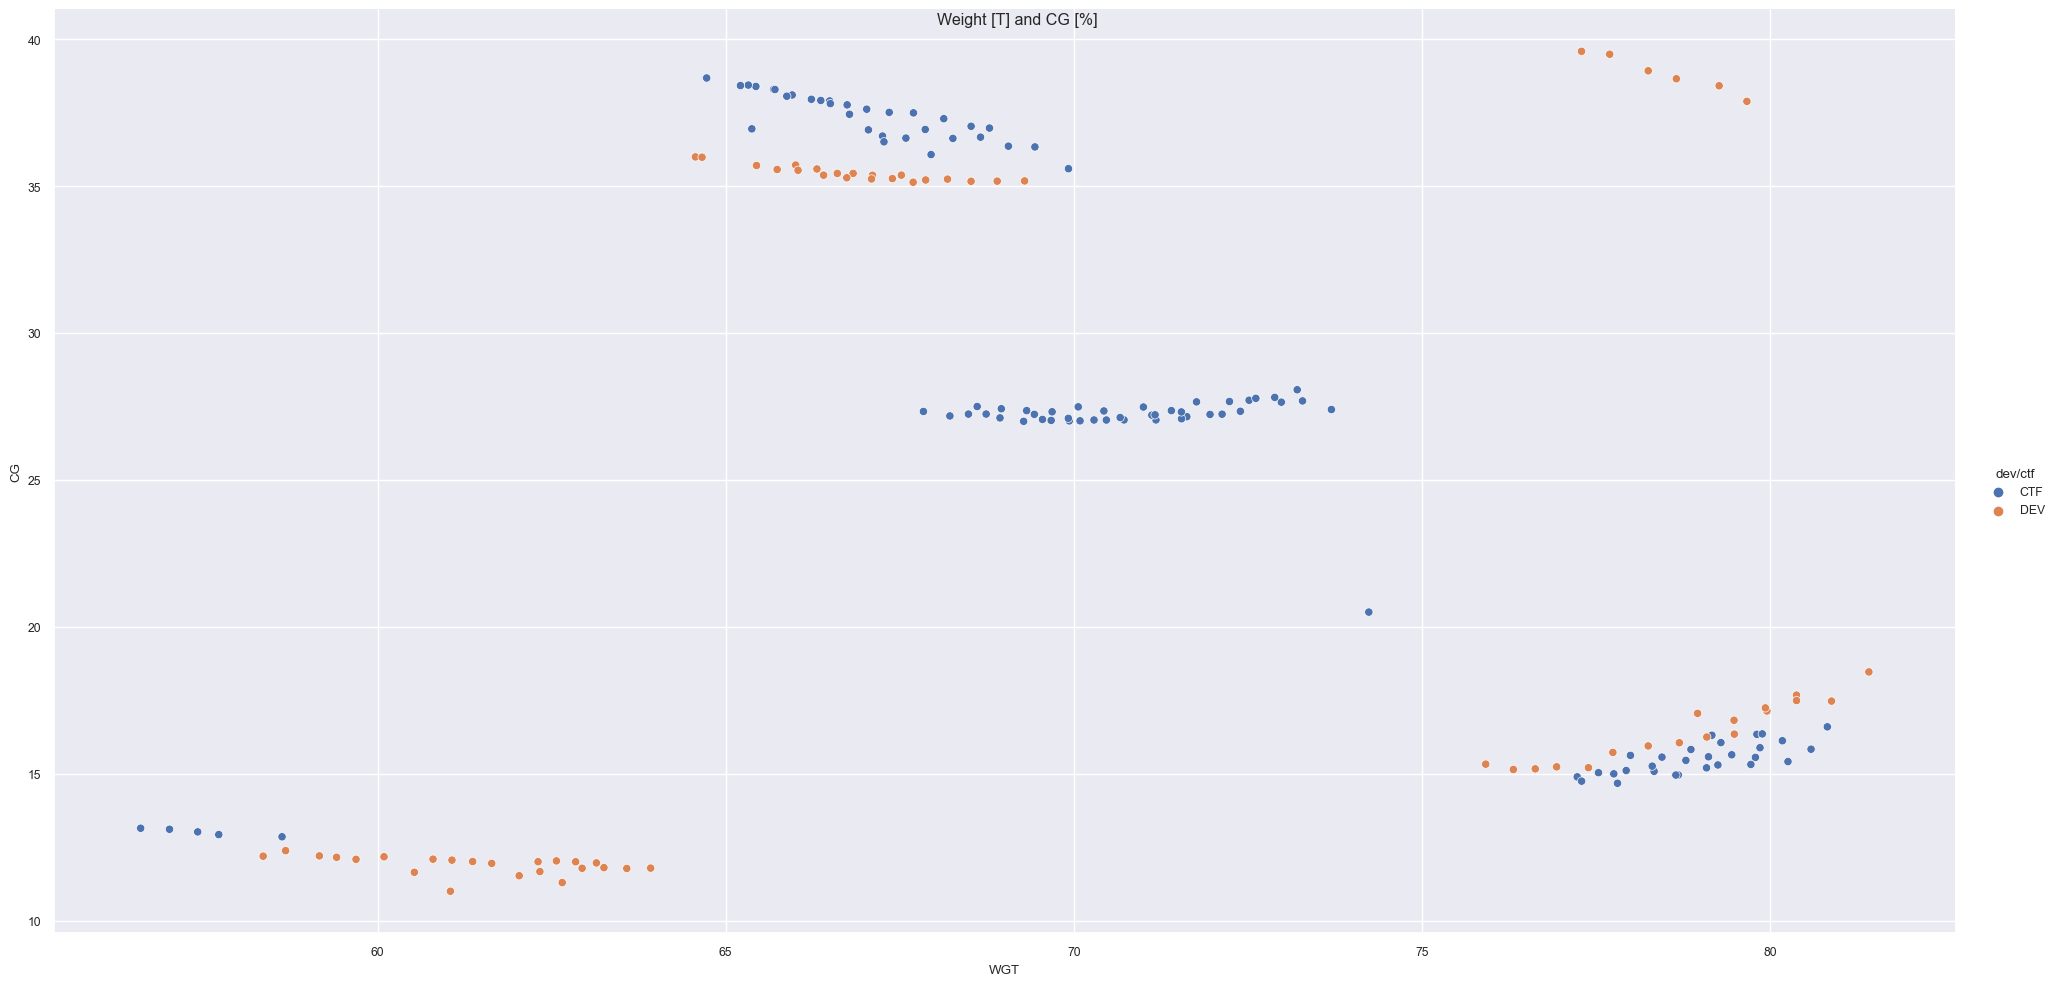

Min/Max experimented Weight: 56 / 81 T
Min/Max experimented CG: 11 / 39 %


In [87]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="WGT",y_vars="CG",size=10, aspect=2)
plt.suptitle('Weight [T] and CG [%]')
plt.grid(True)
plt.show()
print ('Min/Max experimented Weight:', int(min(dataset['WGT'])),'/',int(max(dataset['WGT'])),'T')
print ('Min/Max experimented CG:',int(min(dataset['CG'])),'/',int(max(dataset['CG'])),'%')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


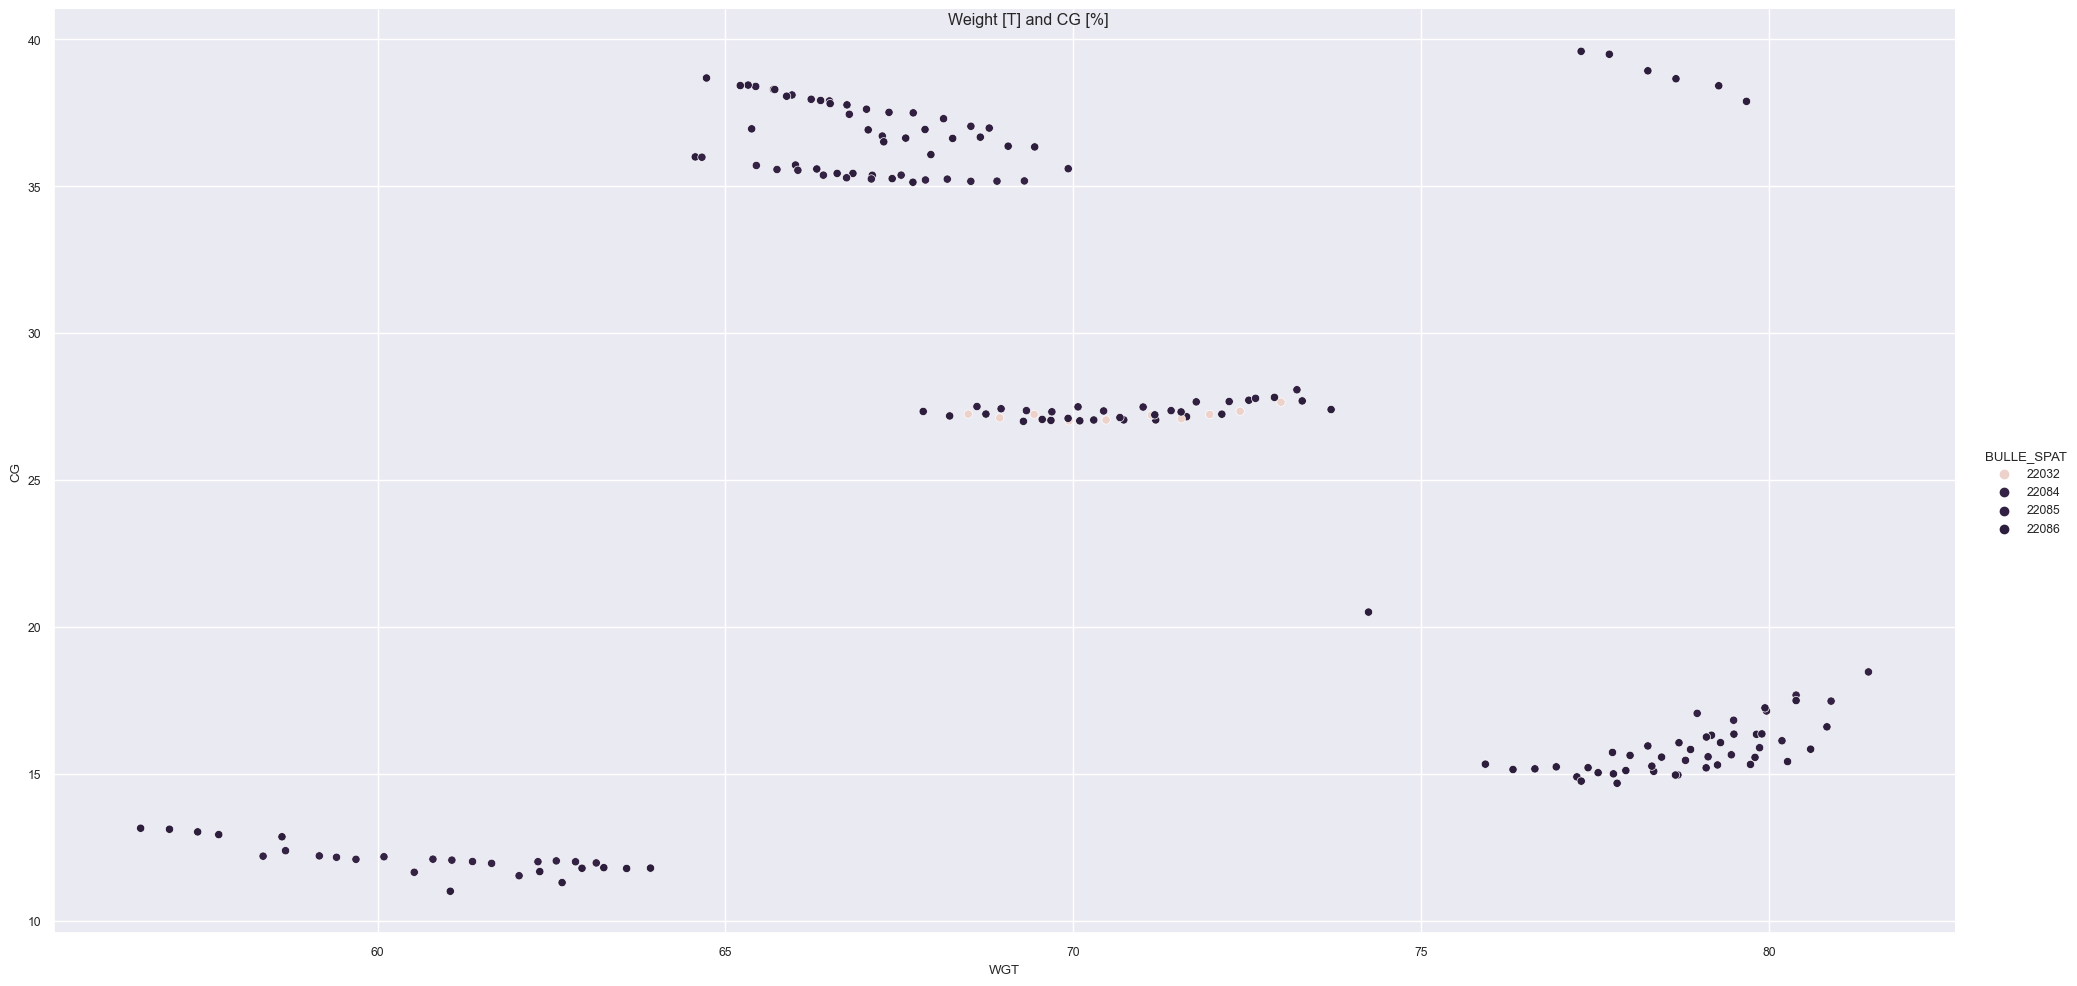

Min/Max experimented Weight: 56 / 81 T
Min/Max experimented CG: 11 / 39 %


In [88]:
sns.pairplot(data=dataset,hue="BULLE_SPAT",x_vars="WGT",y_vars="CG",size=10, aspect=2)
plt.suptitle('Weight [T] and CG [%]')
plt.grid(True)
plt.show()
print ('Min/Max experimented Weight:', int(min(dataset['WGT'])),'/',int(max(dataset['WGT'])),'T')
print ('Min/Max experimented CG:',int(min(dataset['CG'])),'/',int(max(dataset['CG'])),'%')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


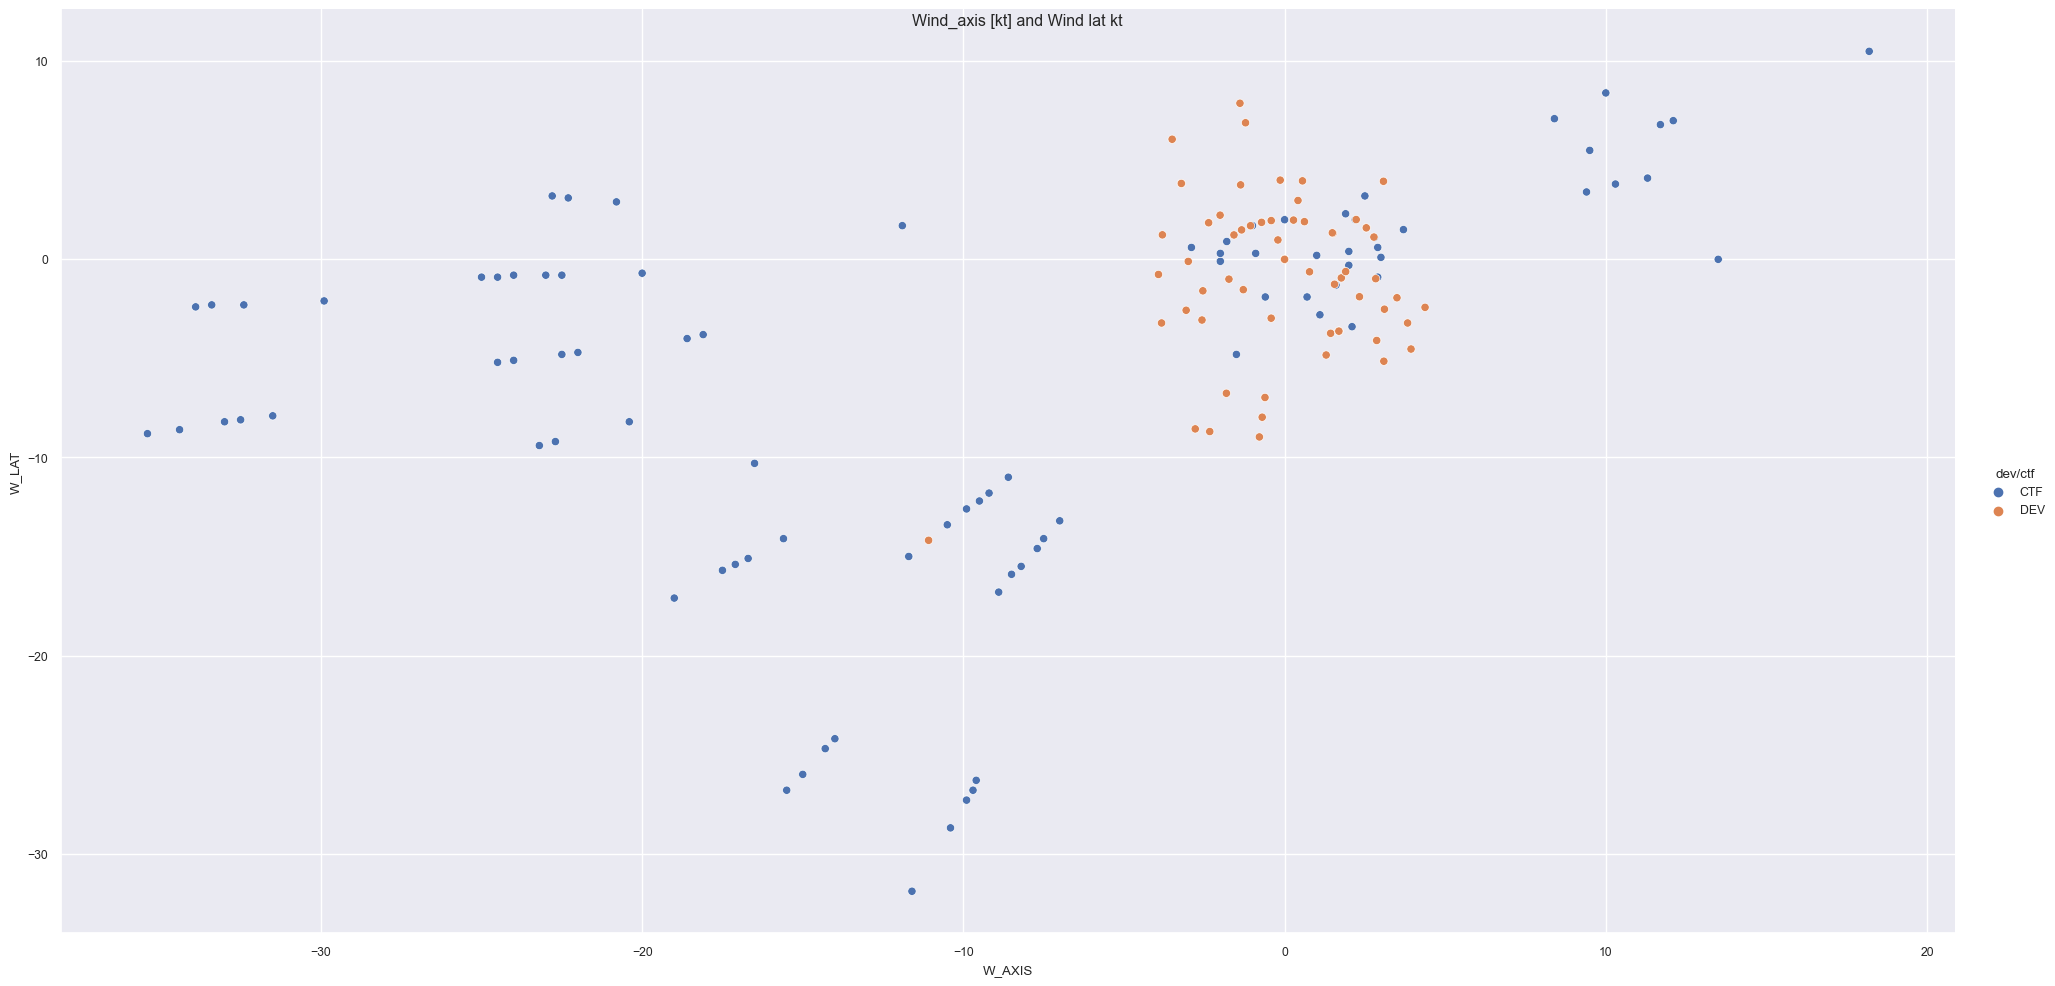

Min/Max experimented longi Wind: -35 / 18 kt
Min/Max experimented lat Wind: -31 / 10 kt


In [89]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="W_AXIS",y_vars="W_LAT",size=10, aspect=2)
plt.suptitle('Wind_axis [kt] and Wind lat kt')
plt.grid(True)
plt.show()
print ('Min/Max experimented longi Wind:', int(min(dataset['W_AXIS'])),'/',int(max(dataset['W_AXIS'])),'kt')
print ('Min/Max experimented lat Wind:',int(min(dataset['W_LAT'])),'/',int(max(dataset['W_LAT'])),'kt')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


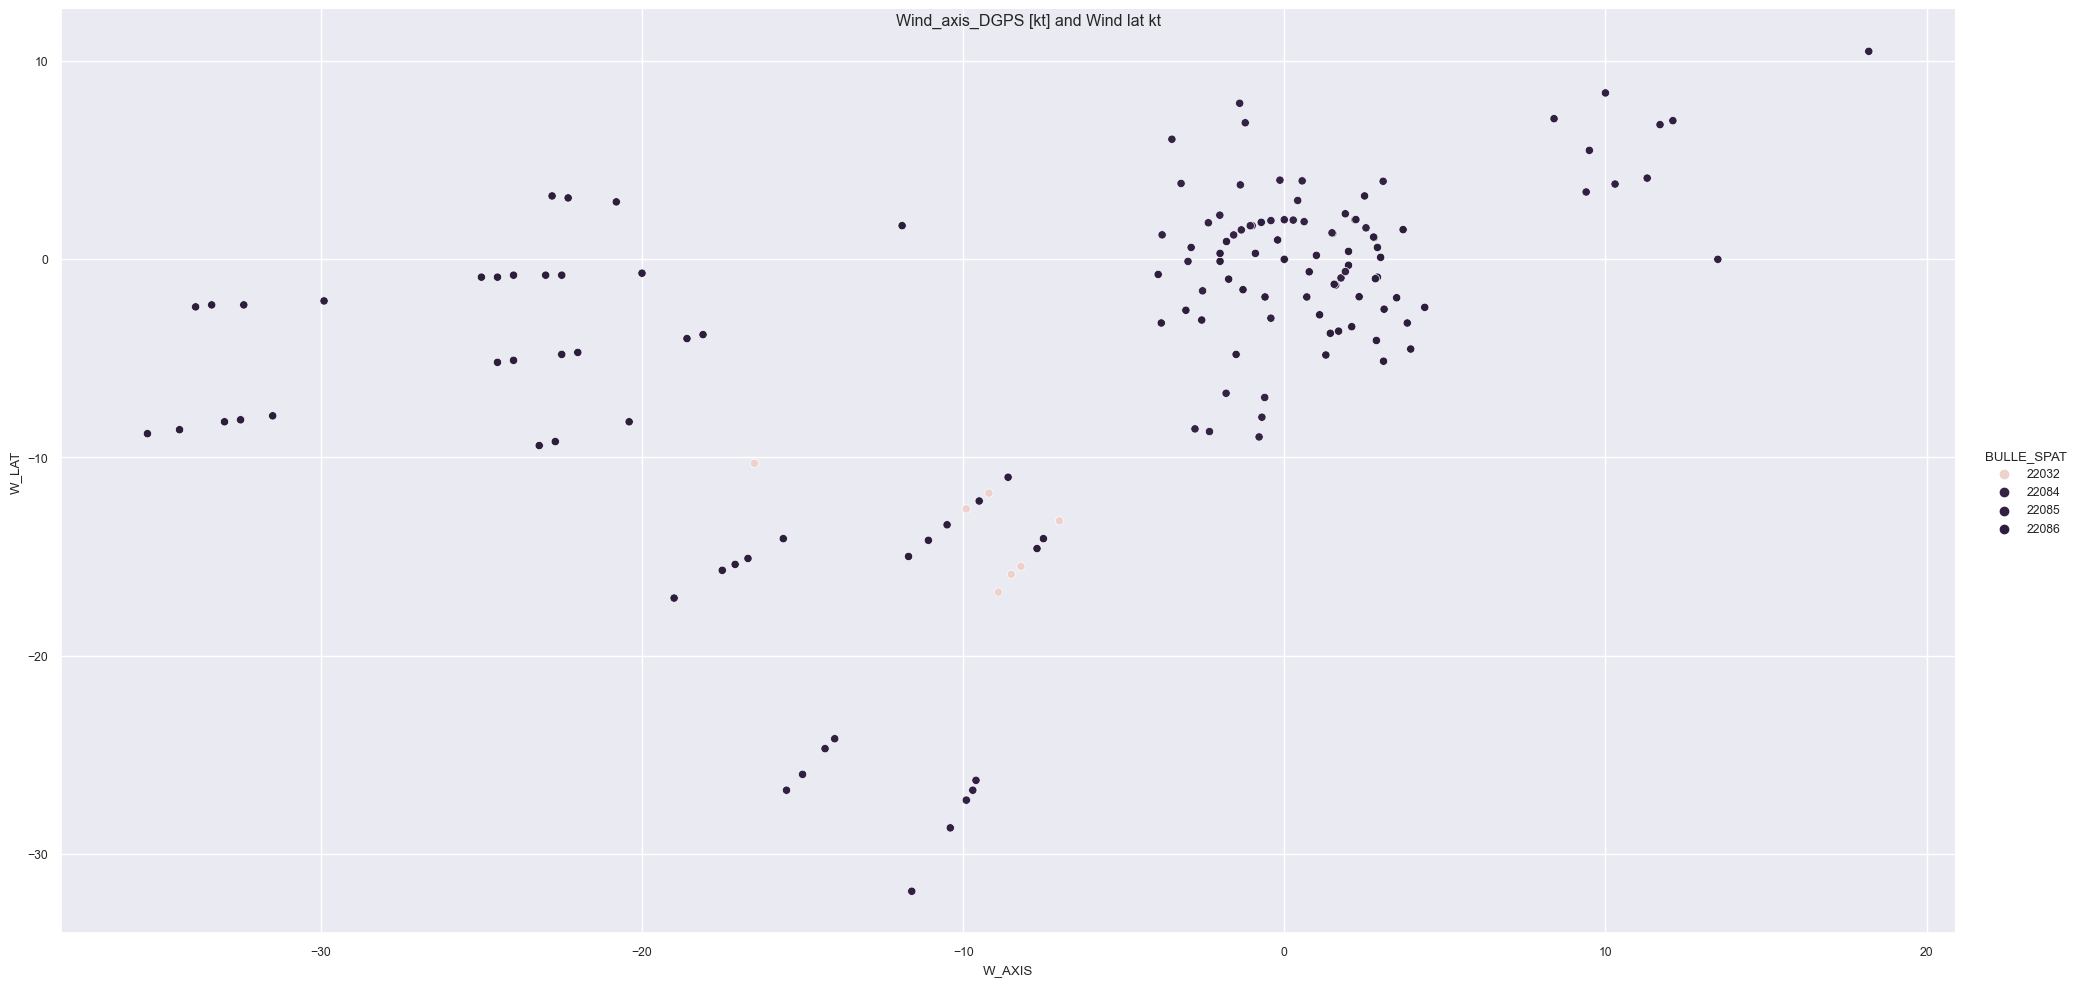

Min/Max experimented longi Wind: -34 / 13 kt
Min/Max experimented lat Wind: -24 / 9 kt


In [90]:
sns.pairplot(data=dataset,hue="BULLE_SPAT",x_vars="W_AXIS",y_vars="W_LAT",size=10, aspect=2)
plt.suptitle('Wind_axis_DGPS [kt] and Wind lat kt')
plt.grid(True)
plt.show()
print ('Min/Max experimented longi Wind:', int(min(dataset['WX_MEA_1_50'])),'/',int(max(dataset['WX_MEA_1_50'])),'kt')
print ('Min/Max experimented lat Wind:',int(min(dataset['WY_MEA_1_50'])),'/',int(max(dataset['WY_MEA_1_50'])),'kt')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


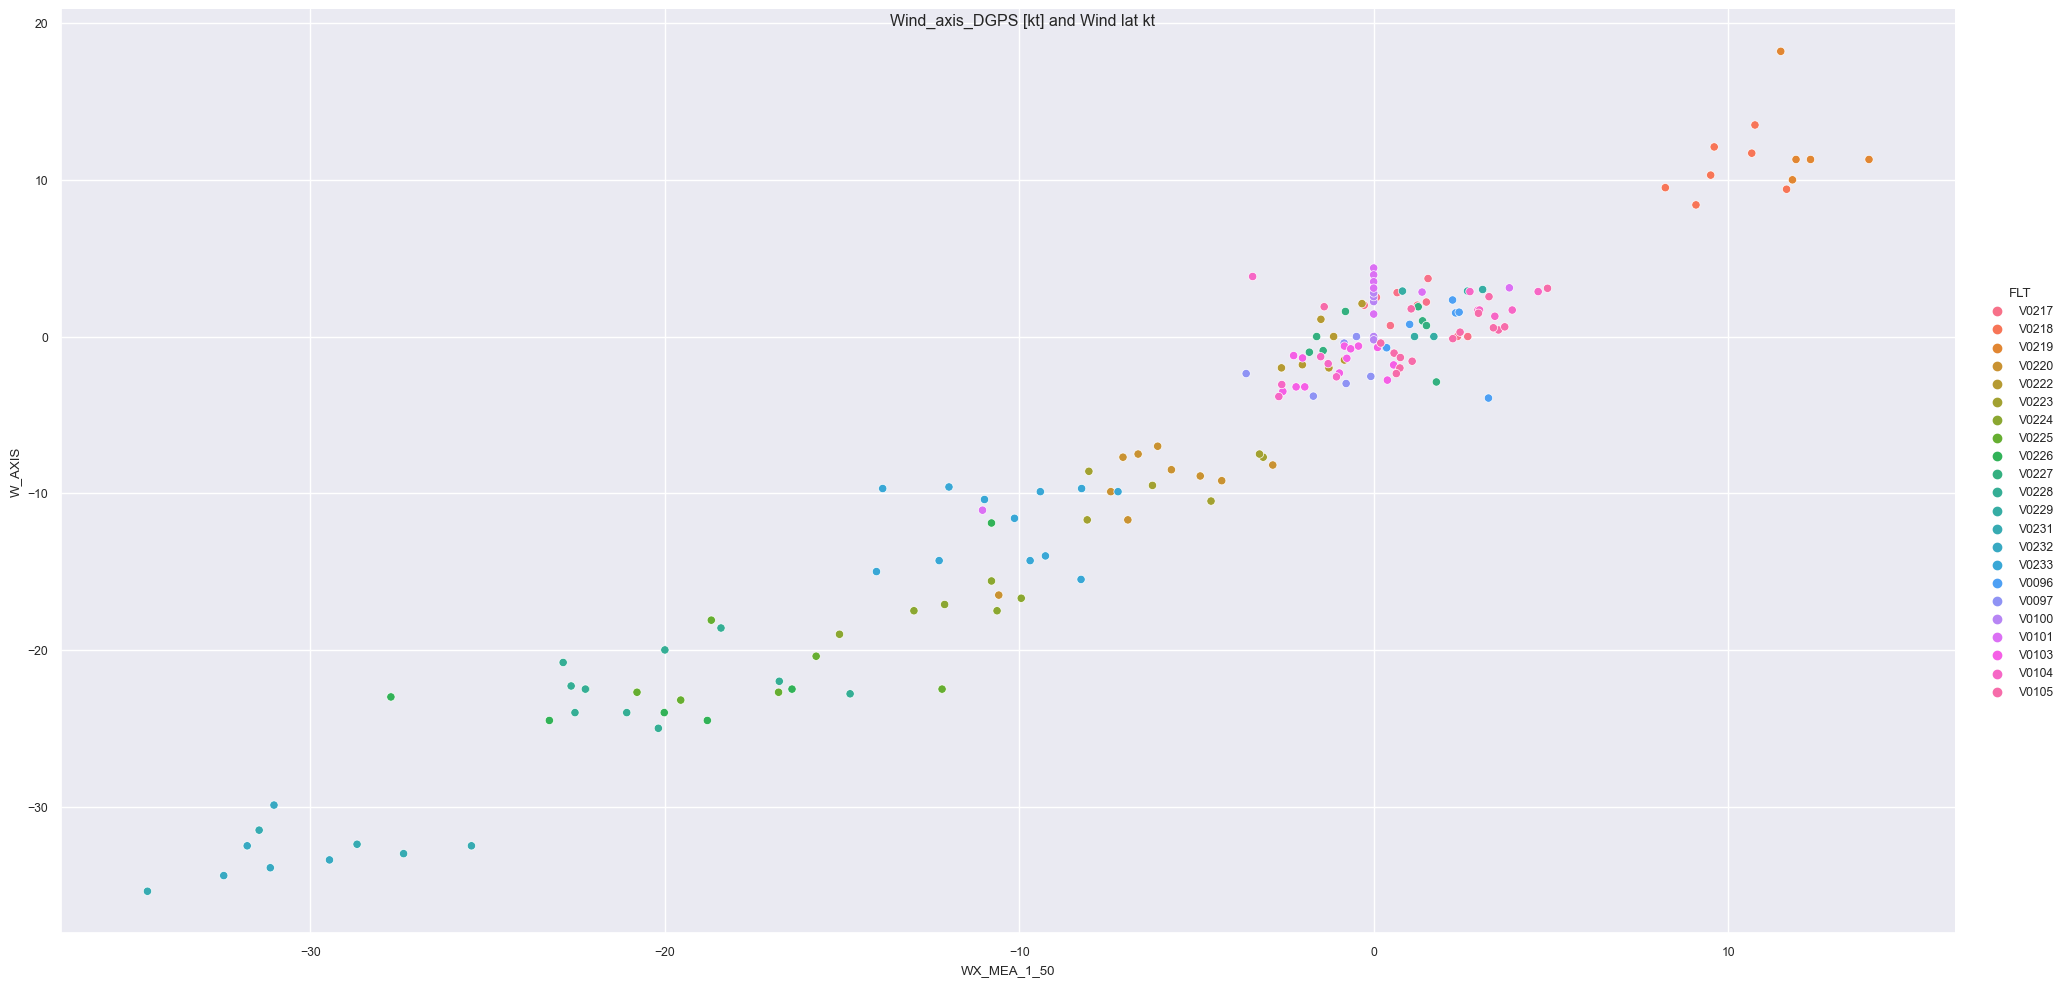

In [91]:
sns.pairplot(data=dataset,hue="FLT",x_vars="WX_MEA_1_50",y_vars="W_AXIS",size=10, aspect=2)
plt.suptitle('Wind_axis_DGPS [kt] and Wind lat kt')
plt.grid(True)
plt.show()


C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


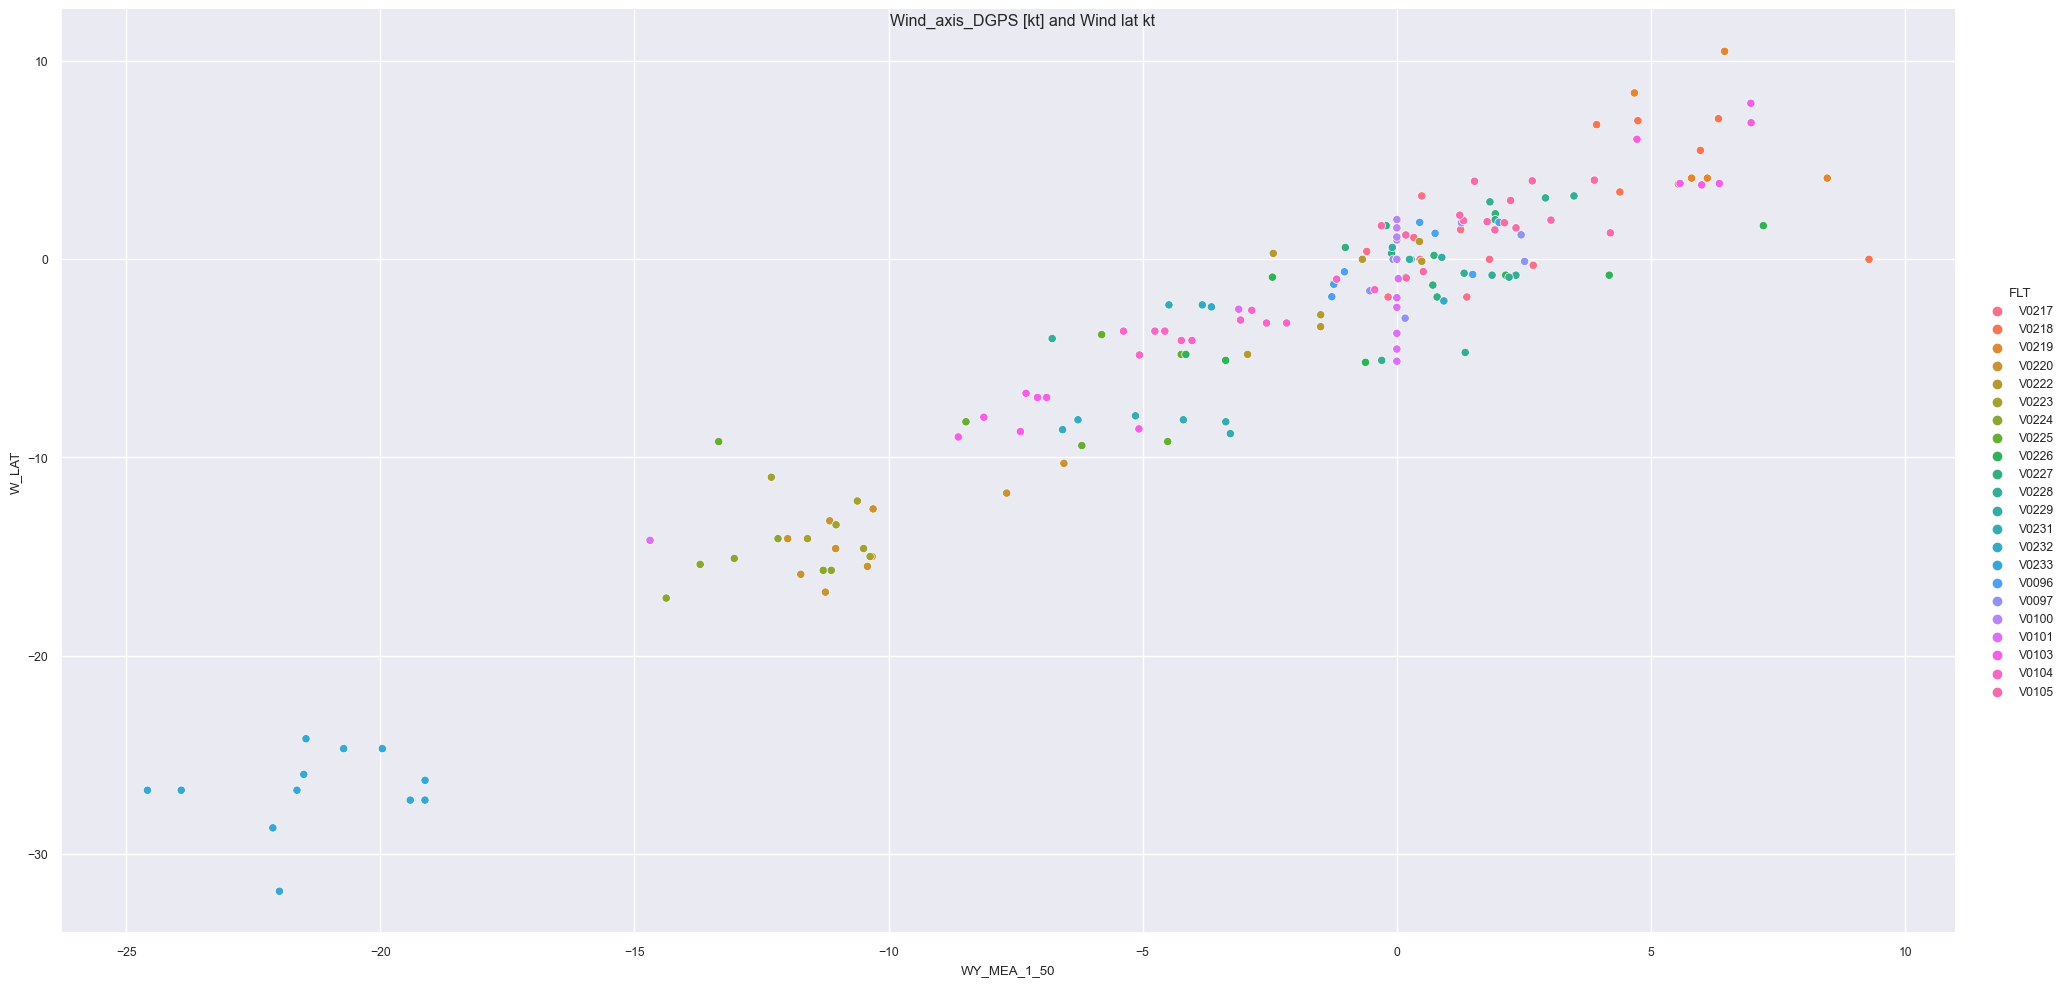

In [92]:
sns.pairplot(data=dataset,hue="FLT",x_vars="WY_MEA_1_50",y_vars="W_LAT",size=10, aspect=2)
plt.suptitle('Wind_axis_DGPS [kt] and Wind lat kt')
plt.grid(True)
plt.show()

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


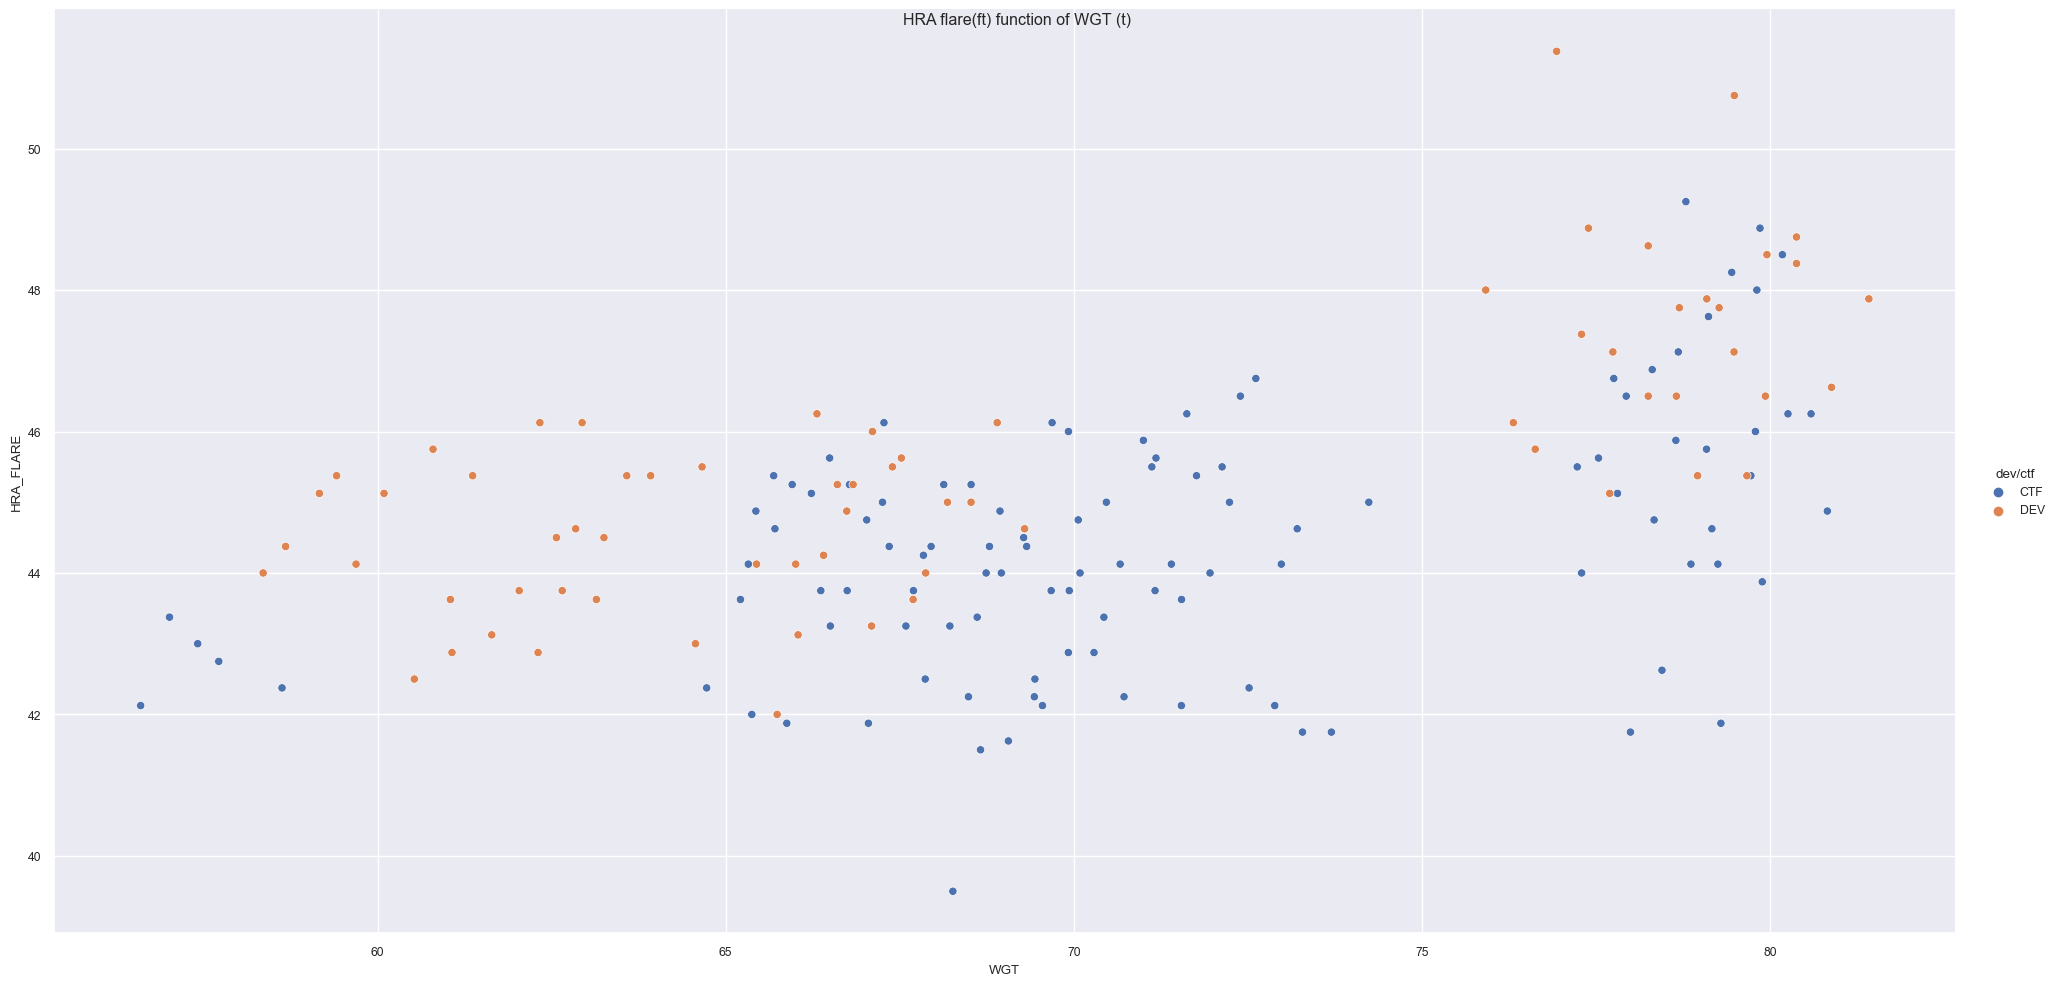

Min/Max experimented Weight: 56 / 81 T
Min/Max experimented Hraflare: 39 / 51 ft


In [93]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="WGT",y_vars="HRA_FLARE",size=10, aspect=2)
plt.suptitle('HRA flare(ft) function of WGT (t)')
plt.grid(True)
plt.show()
print ('Min/Max experimented Weight:', int(min(dataset['WGT'])),'/',int(max(dataset['WGT'])),'T')
print ('Min/Max experimented Hraflare:',int(min(dataset['HRA_FLARE'])),'/',int(max(dataset['HRA_FLARE'])),'ft')

    Flare coverage in WGT/CG ranges from Med /Aft to Hvy /FWd

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


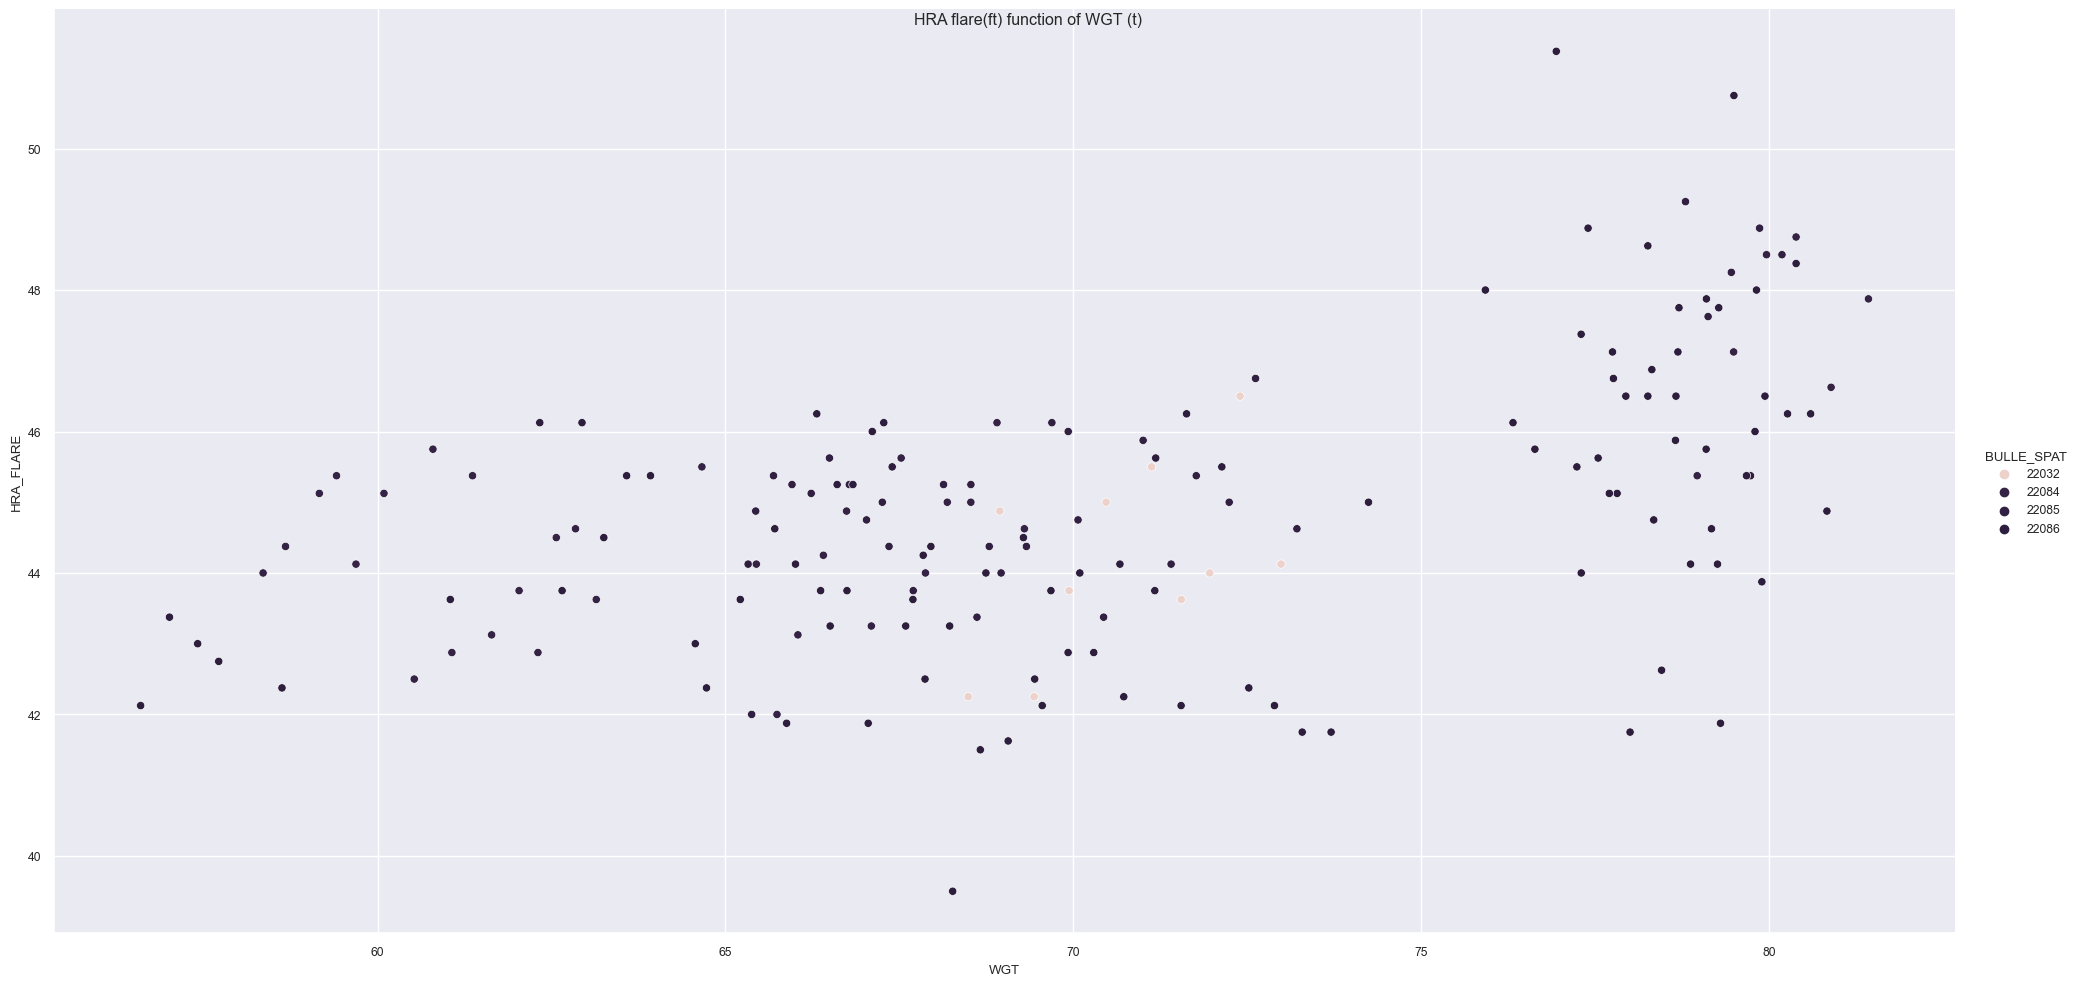

Min/Max experimented Weight: 56 / 81 T
Min/Max experimented Hraflare: 39 / 51 ft


In [94]:
sns.pairplot(data=dataset,hue="BULLE_SPAT",x_vars="WGT",y_vars="HRA_FLARE",size=10, aspect=2)
plt.suptitle('HRA flare(ft) function of WGT (t)')
plt.grid(True)
plt.show()
print ('Min/Max experimented Weight:', int(min(dataset['WGT'])),'/',int(max(dataset['WGT'])),'T')
print ('Min/Max experimented Hraflare:',int(min(dataset['HRA_FLARE'])),'/',int(max(dataset['HRA_FLARE'])),'ft')

In [95]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

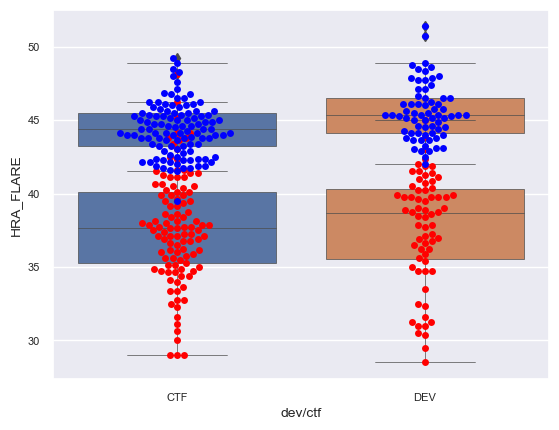

In [96]:
 ax = sns.boxplot(data=dataset, y="HRA_X0", x="dev/ctf",linewidth=.5)
 ax = sns.swarmplot(data=dataset, y="HRA_X0", x="dev/ctf", color="red")
 ax = sns.boxplot(data=dataset, y="HRA_FLARE", x="dev/ctf",linewidth=.5)
 ax = sns.swarmplot(data=dataset, y="HRA_FLARE", x="dev/ctf", color="blue")
plt.show()

In [97]:
dataset[['HRA_FLARE','HRA_X0']].describe()

HRA_FLARE      HRA_X0
count  177.000000  177.000000
mean    44.830508   37.676554
std      1.919005    3.735137
min     39.500000   28.500000
25%     43.625000   35.375000
50%     44.750000   37.875000
75%     45.875000   40.250000
max     51.375000   48.125000

ValueError: cannot reindex on an axis with duplicate labels

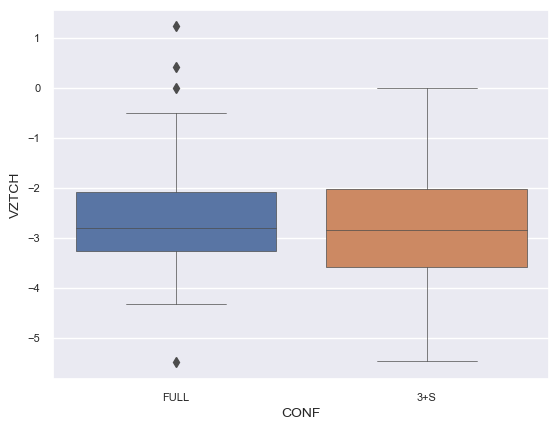

In [98]:
 ax = sns.boxplot(data=dataset, y="VZTCH", x="CONF",linewidth=.5)
 ax = sns.swarmplot(data=dataset, y="VZTCH", x="CONF", color="yellow")
plt.show()

In [99]:
liste_maj=[]
liste_min=['vztj_200','vztj_100','vztj_90','vztj_80','vztj_70','vztj_60','vztj_50','vztj_45','vztj_40','vztj_35','vztj_30','vztj_25','vztj_20','vztj_15','vztj_10','vztj_5','vztj_tch','conf']
for elem in liste_min:
    liste_maj.append(elem.upper())
print(liste_maj)

['VZTJ_200', 'VZTJ_100', 'VZTJ_90', 'VZTJ_80', 'VZTJ_70', 'VZTJ_60', 'VZTJ_50', 'VZTJ_45', 'VZTJ_40', 'VZTJ_35', 'VZTJ_30', 'VZTJ_25', 'VZTJ_20', 'VZTJ_15', 'VZTJ_10', 'VZTJ_5', 'VZTJ_TCH', 'CONF']


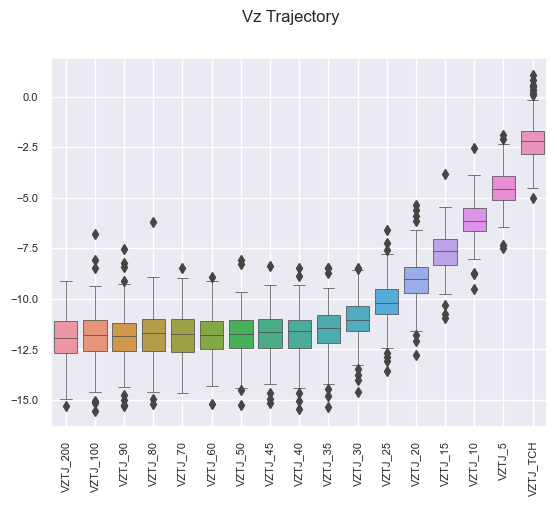

In [100]:

# lecture du dataset
vztraj=dataset[['VZTJ_200', 'VZTJ_100', 'VZTJ_90', 'VZTJ_80', 'VZTJ_70', 'VZTJ_60', 'VZTJ_50', 'VZTJ_45', 'VZTJ_40', 'VZTJ_35', 'VZTJ_30', 'VZTJ_25', 'VZTJ_20', 'VZTJ_15', 'VZTJ_10', 'VZTJ_5', 'VZTJ_TCH', 'CONF']]


vztraj_conf3=vztraj.query('CONF=="3+S" and VZTJ_100>-20')
vztraj_conff=vztraj.query('CONF=="FULL" and VZTJ_100>-20')
vztraj_clean=vztraj.query('VZTJ_100>-20')


#prints vztraj_clean
ax =sns.boxplot(data=vztraj_clean,linewidth=0.5)
#inserts headline
plt.suptitle("Vz Trajectory")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()



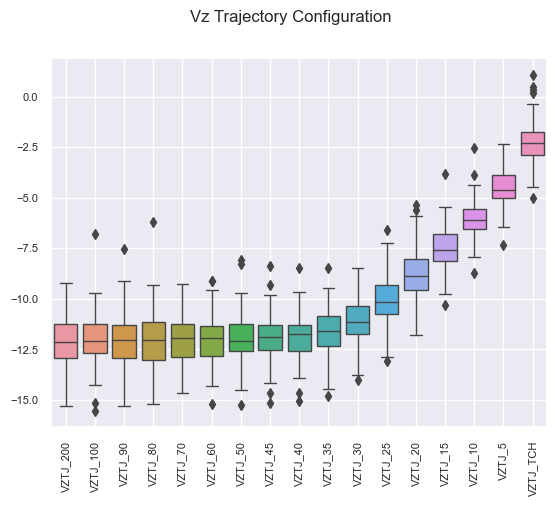

In [101]:
#prints vztraj_conf3
ax = sns.boxplot(data=vztraj_conf3,linewidth=1)
plt.suptitle("Vz Trajectory Configuration")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()

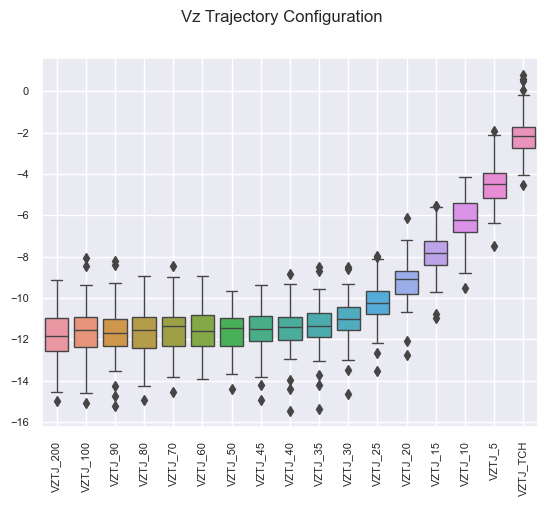

In [102]:
#prints vztraj_conff
ax = sns.boxplot(data=vztraj_conff,linewidth=1)
plt.suptitle("Vz Trajectory Configuration")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()

In [103]:
liste_maj=[]
liste_min=['teta_200','teta_100','teta_90','teta_80','teta_70','teta_60','teta_50','teta_45','teta_40','teta_35','teta_30','teta_25','teta_20','teta_15','teta_10','teta_5','teta_x0','teta_x60','teta_tch']
for elem in liste_min:
    liste_maj.append(elem.upper())
print(liste_maj)

['TETA_200', 'TETA_100', 'TETA_90', 'TETA_80', 'TETA_70', 'TETA_60', 'TETA_50', 'TETA_45', 'TETA_40', 'TETA_35', 'TETA_30', 'TETA_25', 'TETA_20', 'TETA_15', 'TETA_10', 'TETA_5', 'TETA_X0', 'TETA_X60', 'TETA_TCH']


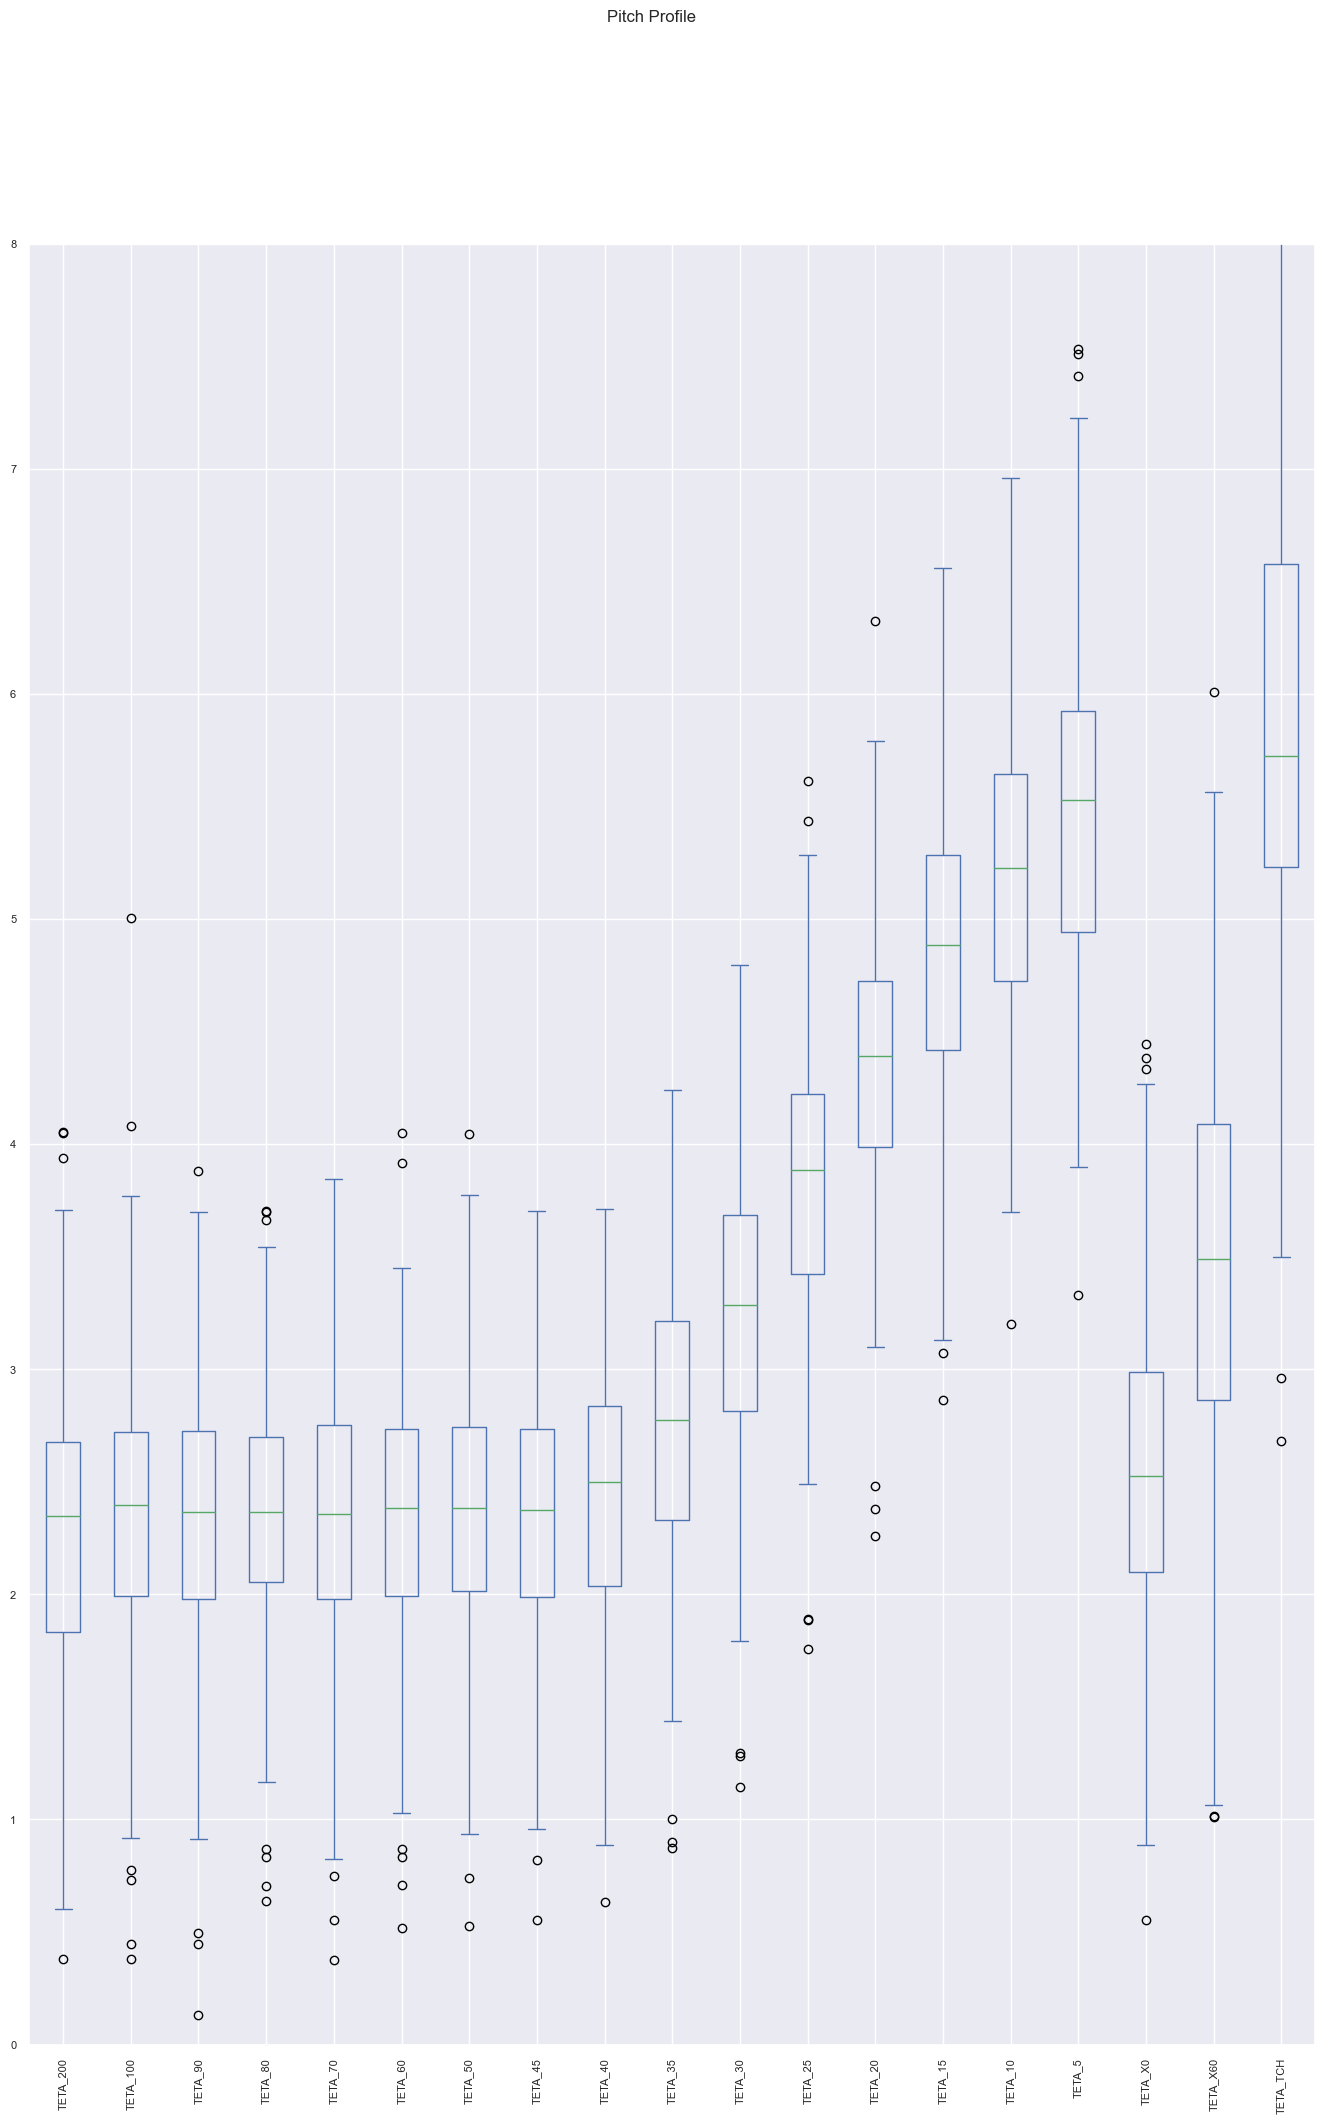

In [104]:
#boxplot pitch profile (without outside values)
import matplotlib.pyplot as plt
teta_pitch=dataset[['TETA_200', 'TETA_100', 'TETA_90', 'TETA_80', 'TETA_70', 'TETA_60', 'TETA_50', 'TETA_45', 'TETA_40', 'TETA_35', 'TETA_30', 'TETA_25', 'TETA_20', 'TETA_15', 'TETA_10', 'TETA_5', 'TETA_X0', 'TETA_X60', 'TETA_TCH']]
#define boxplot and set size to A2 for readableness
teta_pitch.plot(kind='box',figsize=(16.59, 23.39))
#insert titel
plt.suptitle('Pitch Profile')
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
#set y boundaries from 0 to 8
plt.ylim((0,8))
#plot grid for better radableness
plt.grid(True)
plt.show()


In [105]:

liste_guidance=["AC_NB","FLT","TEST_NB","TEST","RWY","W_HDG","W_SPD","W_GUST","W_AXIS","W_LAT","WGT","CG","CONF","AP","ATHR","VSEL","ENG_CND","DVC_MIN_5_50","DVC_MEA_5_50","DVC_MAX_5_50","LOC_MAX_3_15","GS_MAX_3_1","CREW","COMMENTS"]


In [106]:
#building list guidance performance
guidance_perfo=dataset[liste_guidance]
#guidance_perfo.insert(0, "Run",0)
print (guidance_perfo)
#guidance_perfo.head()


     AC_NB    FLT TEST_NB TEST      RWY  W_HDG  W_SPD  W_GUST  W_AXIS   W_LAT  \
0   M11000  V0217       1  LDG  LFBO32L    0.0    0.0     0.0  0.0000  0.0000   
1   M11000  V0217       2  LDG  LFBO32L    0.0    0.0     0.0  0.0000  0.0000   
2   M11000  V0217       3  LDG  LFBO32L  210.0    2.0     2.0  0.7000 -1.9000   
3   M11000  V0217       4  LDG  LFBO32L  120.0    3.0     3.0  2.8000  1.1000   
4   M11000  V0217       5  LDG  LFBO32L  130.0    2.0     2.0  2.0000  0.4000   
..     ...    ...     ...  ...      ...    ...    ...     ...     ...     ...   
67  M11058  V0105      12  LDG  LFBO14R  250.0    2.0     0.0  0.6180  1.9021   
68  M11058  V0105      13  LDG  LFBO14R  270.0    5.0     0.0  3.0783  3.9400   
69  M11058  V0105      14  LDG  LFBO14R  290.0    3.0     0.0  2.5441  1.5898   
70  M11058  V0105      15  LDG  LFBO14R  350.0    2.0     0.0  1.7659 -0.9389   
71  M11058  V0105      16   RO  LFBO14R  340.0    2.0     0.0  1.9021 -0.6183   

    ...  ATHR    VSEL ENG_C

In [107]:
#building list landing performance
landing_perfo=dataset[["AC_NB","FLT","TEST_NB","TEST","RWY","W_HDG","W_SPD","W_GUST","W_AXIS","W_LAT","WGT","CG","CONF","AP","ATHR","VSEL","ENG_CND","XR_TCH","VZTCH","YR_TCH","VY_TCH","PHI_TCH","CREW","COMMENTS"]]
print (landing_perfo)

     AC_NB    FLT TEST_NB TEST      RWY  W_HDG  W_SPD  W_GUST  W_AXIS   W_LAT  \
0   M11000  V0217       1  LDG  LFBO32L    0.0    0.0     0.0  0.0000  0.0000   
1   M11000  V0217       2  LDG  LFBO32L    0.0    0.0     0.0  0.0000  0.0000   
2   M11000  V0217       3  LDG  LFBO32L  210.0    2.0     2.0  0.7000 -1.9000   
3   M11000  V0217       4  LDG  LFBO32L  120.0    3.0     3.0  2.8000  1.1000   
4   M11000  V0217       5  LDG  LFBO32L  130.0    2.0     2.0  2.0000  0.4000   
..     ...    ...     ...  ...      ...    ...    ...     ...     ...     ...   
67  M11058  V0105      12  LDG  LFBO14R  250.0    2.0     0.0  0.6180  1.9021   
68  M11058  V0105      13  LDG  LFBO14R  270.0    5.0     0.0  3.0783  3.9400   
69  M11058  V0105      14  LDG  LFBO14R  290.0    3.0     0.0  2.5441  1.5898   
70  M11058  V0105      15  LDG  LFBO14R  350.0    2.0     0.0  1.7659 -0.9389   
71  M11058  V0105      16   RO  LFBO14R  340.0    2.0     0.0  1.9021 -0.6183   

    ...  ATHR    VSEL ENG_C

In [108]:
print ('Min/Max experimented XR_TCH:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')

print ('Min/Max experimented YR_TCH:',int(min(dataset['YR_TCH'])),'/',int(max(dataset['YR_TCH'])),'m')

Min/Max experimented XR_TCH: 205 / 543 m
Min/Max experimented YR_TCH: -3 / 4 m


In [109]:
print('mean_XTP',dataset['XR_TCH'].mean())
print('stdev_XTP',dataset['XR_TCH'].std())
print('NB_XTP',dataset['XR_TCH'].count())
result_XTP = datanew.groupby('BULLE_SPAT').agg({'XR_TCH': ['min', 'max','mean','std','count']}) 
print (result_XTP)

mean_XTP 376.44671875
stdev_XTP 60.78024325815976
NB_XTP 176
              XR_TCH                                       
                 min       max        mean        std count
BULLE_SPAT                                                 
22032       369.9701  500.3135  427.662830  37.649698    10
22084       278.8711  445.8440  367.481629  48.944905    35
22085       264.3960  479.8687  383.413884  63.614422    31
22086       205.8401  543.0090  372.303068  63.453957   100


In [110]:
result_VZTCH = datanew.groupby('BULLE_SPAT').agg({'VZTCH': ['min', 'max','mean','std','count']}) 
print (result_VZTCH)

             VZTCH                                  
               min     max      mean       std count
BULLE_SPAT                                          
22032      -3.3140 -1.4612 -2.434510  0.594914    10
22084      -5.4549  0.0000 -2.664541  1.373100    27
22085      -4.3209 -0.9356 -2.612523  0.892776    31
22086      -5.4900  1.2289 -2.826122  1.129679   100


In [111]:
sns.set_theme(font_scale=1)

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


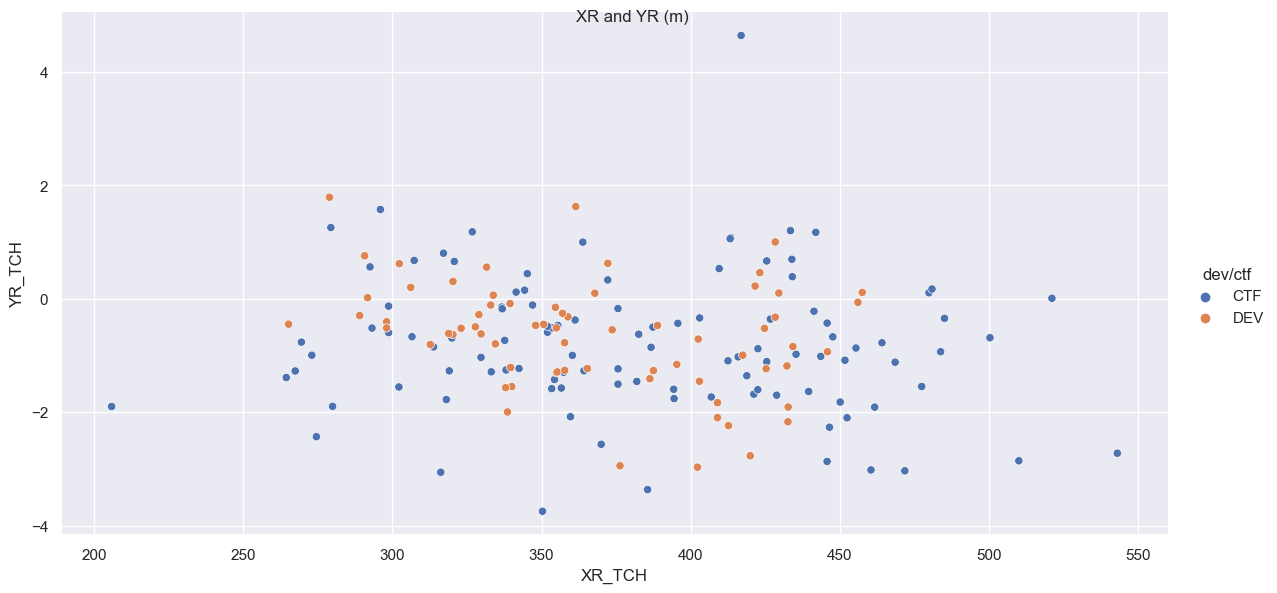

Min/Max experimented XR_TCH: 205 / 543 m
Min/Max experimented YR_TCH: -3 / 4 m


In [112]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="XR_TCH",y_vars="YR_TCH",size=6, aspect=2)
plt.suptitle('XR and YR (m)')
plt.grid(True)
plt.show()
print ('Min/Max experimented XR_TCH:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')
print ('Min/Max experimented YR_TCH:',int(min(dataset['YR_TCH'])),'/',int(max(dataset['YR_TCH'])),'m')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


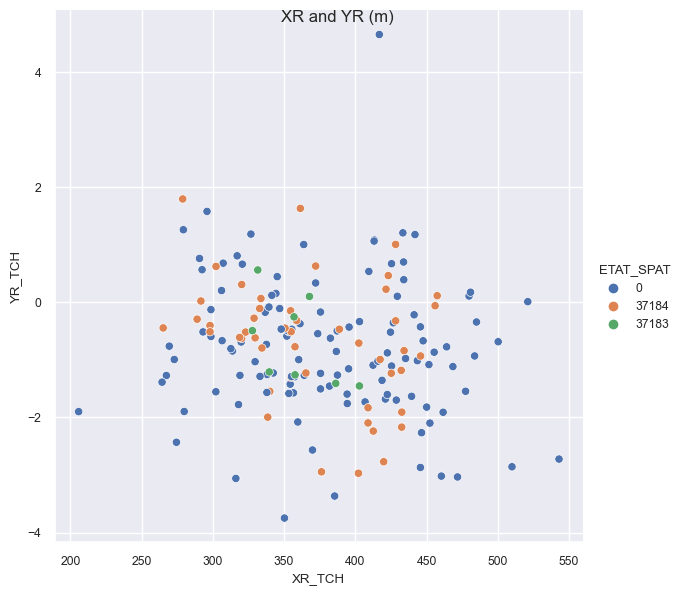

Min/Max experimented XR_TCH: 205 / 543 m
Min/Max experimented YR_TCH: -3 / 4 m


In [195]:
sns.pairplot(data=dataset,hue="ETAT_SPAT",x_vars="XR_TCH",y_vars="YR_TCH",size=6, aspect=1)
plt.suptitle('XR and YR (m)')
plt.grid(True)
plt.show()
print ('Min/Max experimented XR_TCH:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')
print ('Min/Max experimented YR_TCH:',int(min(dataset['YR_TCH'])),'/',int(max(dataset['YR_TCH'])),'m')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


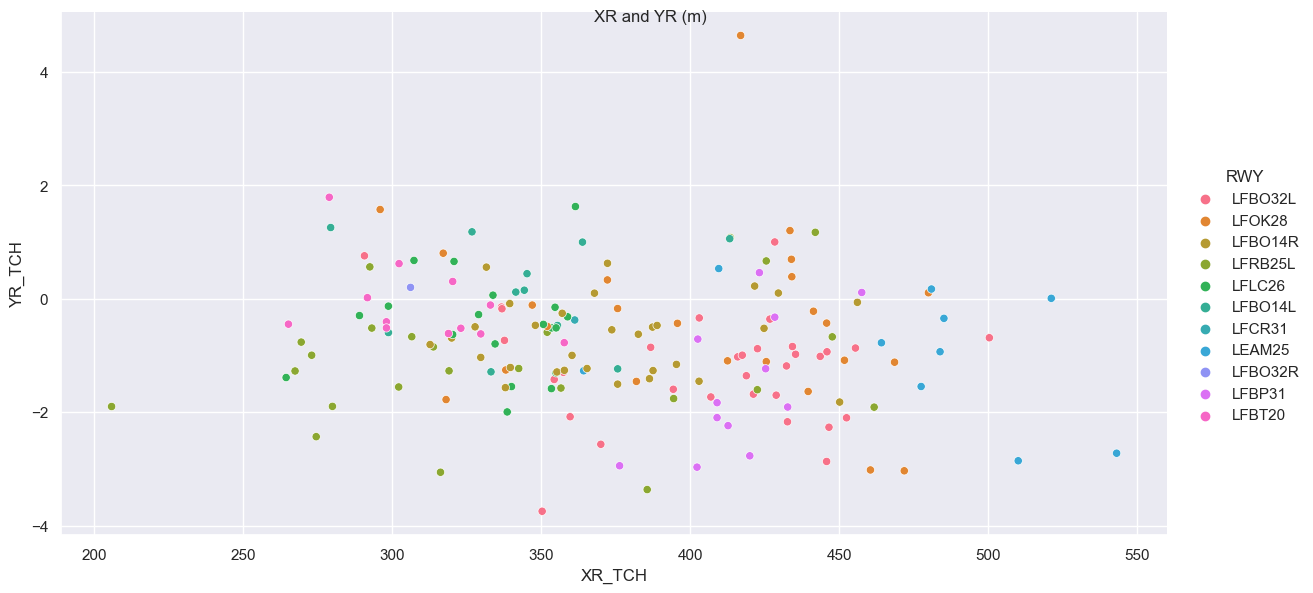

Min/Max Ximpact: 205 / 543 m
Min/Max Yimpact: -3 / 4 m


In [114]:
sns.pairplot(data=dataset,hue="RWY",x_vars="XR_TCH",y_vars="YR_TCH",size=6, aspect=2)
plt.suptitle('XR and YR (m)')
plt.grid(True)
plt.show()
print ('Min/Max Ximpact:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')
print ('Min/Max Yimpact:',int(min(dataset['YR_TCH'])),'/',int(max(dataset['YR_TCH'])),'m')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


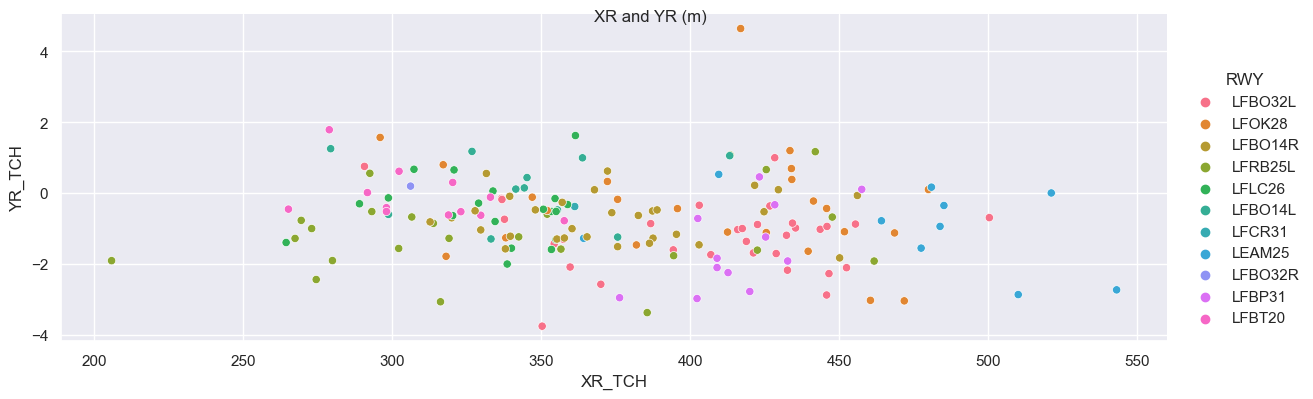

Min/Max Ximpact: 205 / 543 m
Min/Max Yimpact: -3 / 4 m


In [115]:
sns.pairplot(data=dataset,hue="RWY",x_vars="XR_TCH",y_vars="YR_TCH",size=4, aspect=3)
plt.suptitle('XR and YR (m)')
plt.grid(True)
plt.show()
print ('Min/Max Ximpact:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')
print ('Min/Max Yimpact:',int(min(dataset['YR_TCH'])),'/',int(max(dataset['YR_TCH'])),'m')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


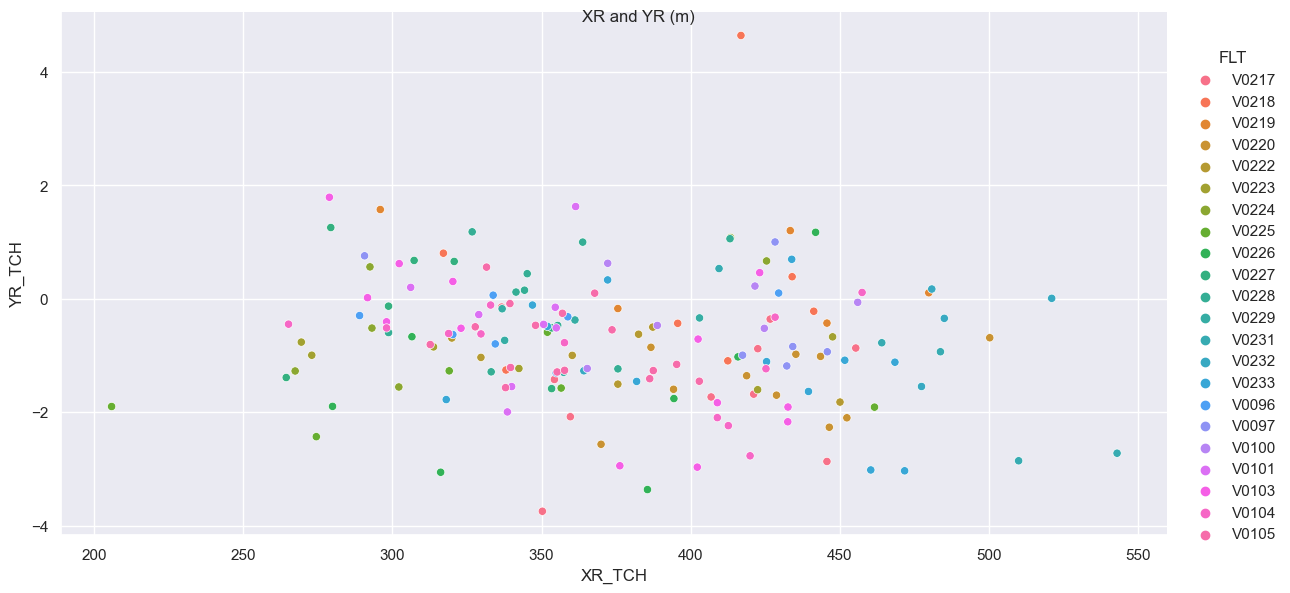

Min/Max Ximpact: 205 / 543 m
Min/Max Yimpact: -3 / 4 m


In [116]:
sns.pairplot(data=dataset,hue="FLT",x_vars="XR_TCH",y_vars="YR_TCH",size=6, aspect=2)
plt.suptitle('XR and YR (m)')
plt.grid(True)
plt.show()
print ('Min/Max Ximpact:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')
print ('Min/Max Yimpact:',int(min(dataset['YR_TCH'])),'/',int(max(dataset['YR_TCH'])),'m')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


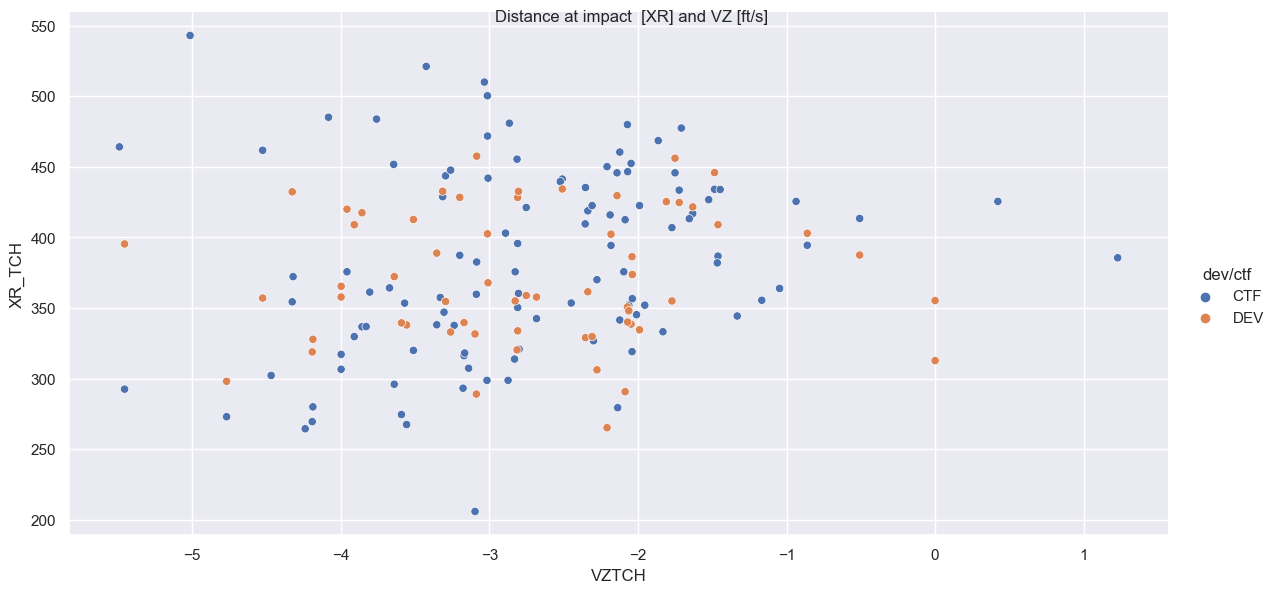

Min/Max experimented XR_TCH: 205 / 543 m
Min/Max Vzimpact: -5.49 / 1.2289 ft/s


In [117]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="VZTCH",y_vars="XR_TCH",size=6, aspect=2)
plt.suptitle('Distance at impact  [XR] and VZ [ft/s]')
plt.grid(True)
plt.show()
print ('Min/Max experimented XR_TCH:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')
print ('Min/Max Vzimpact:',(min(dataset['VZTCH'])),'/',(max(dataset['VZTCH'])),'ft/s')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


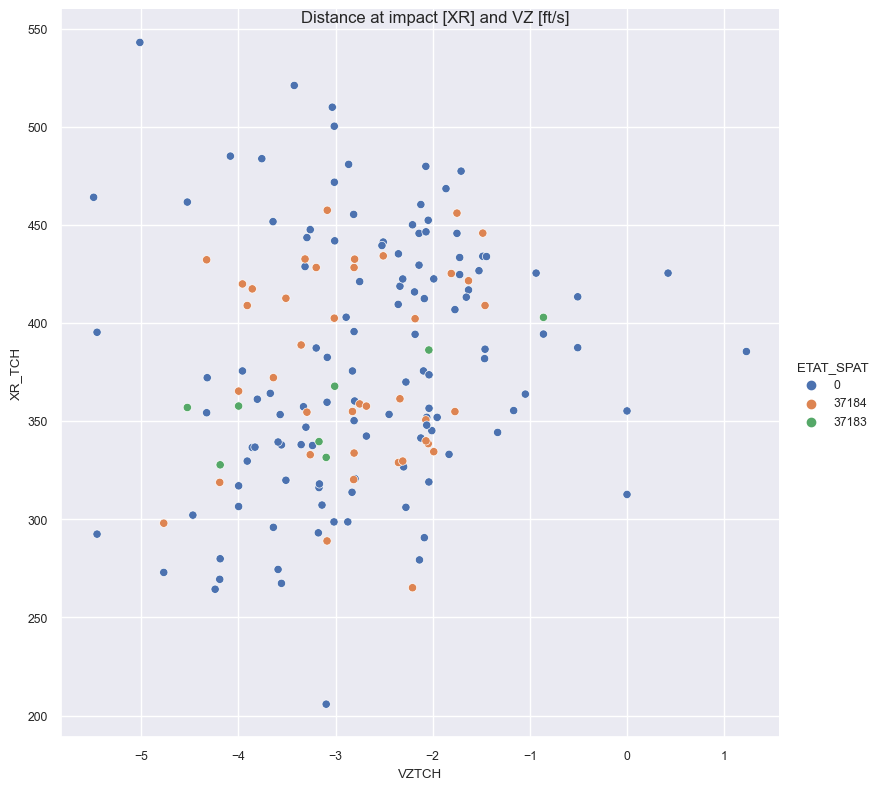

Min/Max experimented XR_TCH: 205 / 543 m
Min/Max experimented VZ: -5.49 / 1.2289 ft/s


In [193]:
sns.pairplot(data=dataset,hue="ETAT_SPAT",x_vars="VZTCH",y_vars="XR_TCH",size=8, aspect=1)
plt.suptitle('Distance at impact [XR] and VZ [ft/s]')
plt.grid(True)
plt.show()
print ('Min/Max experimented XR_TCH:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')
print ('Min/Max experimented VZ:',(min(dataset['VZTCH'])),'/',(max(dataset['VZTCH'])),'ft/s')

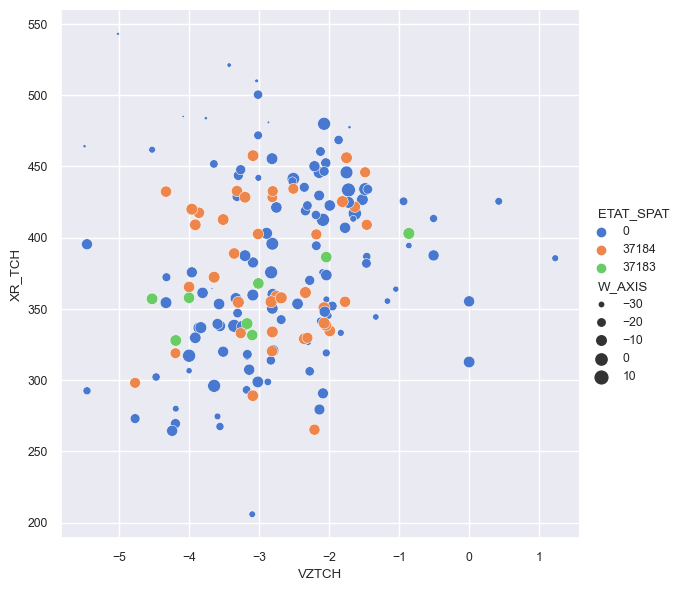

In [206]:
#sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",sizes=(40, 400), alpha=.5, palette="muted",height=6, data=mpg)
sns.relplot(data=dataset,hue="ETAT_SPAT",x="VZTCH",y="XR_TCH",size="W_AXIS",sizes=(0, 100), alpha=1,palette="muted",height=6)

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


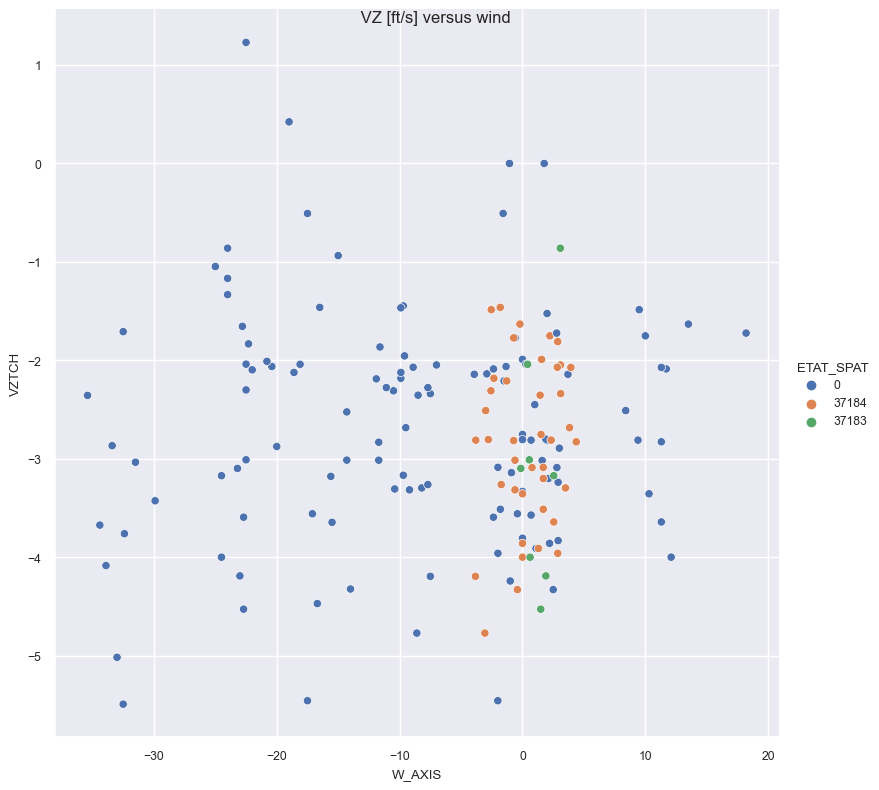

Min/Max experimented VZ: -5.49 / 1.2289 ft/s


In [191]:
sns.pairplot(data=dataset,hue="ETAT_SPAT",x_vars="W_AXIS",y_vars="VZTCH",size=8, aspect=1)
plt.suptitle(' VZ [ft/s] versus wind ')
plt.grid(True)
plt.show()
print ('Min/Max experimented VZ:',(min(dataset['VZTCH'])),'/',(max(dataset['VZTCH'])),'ft/s')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


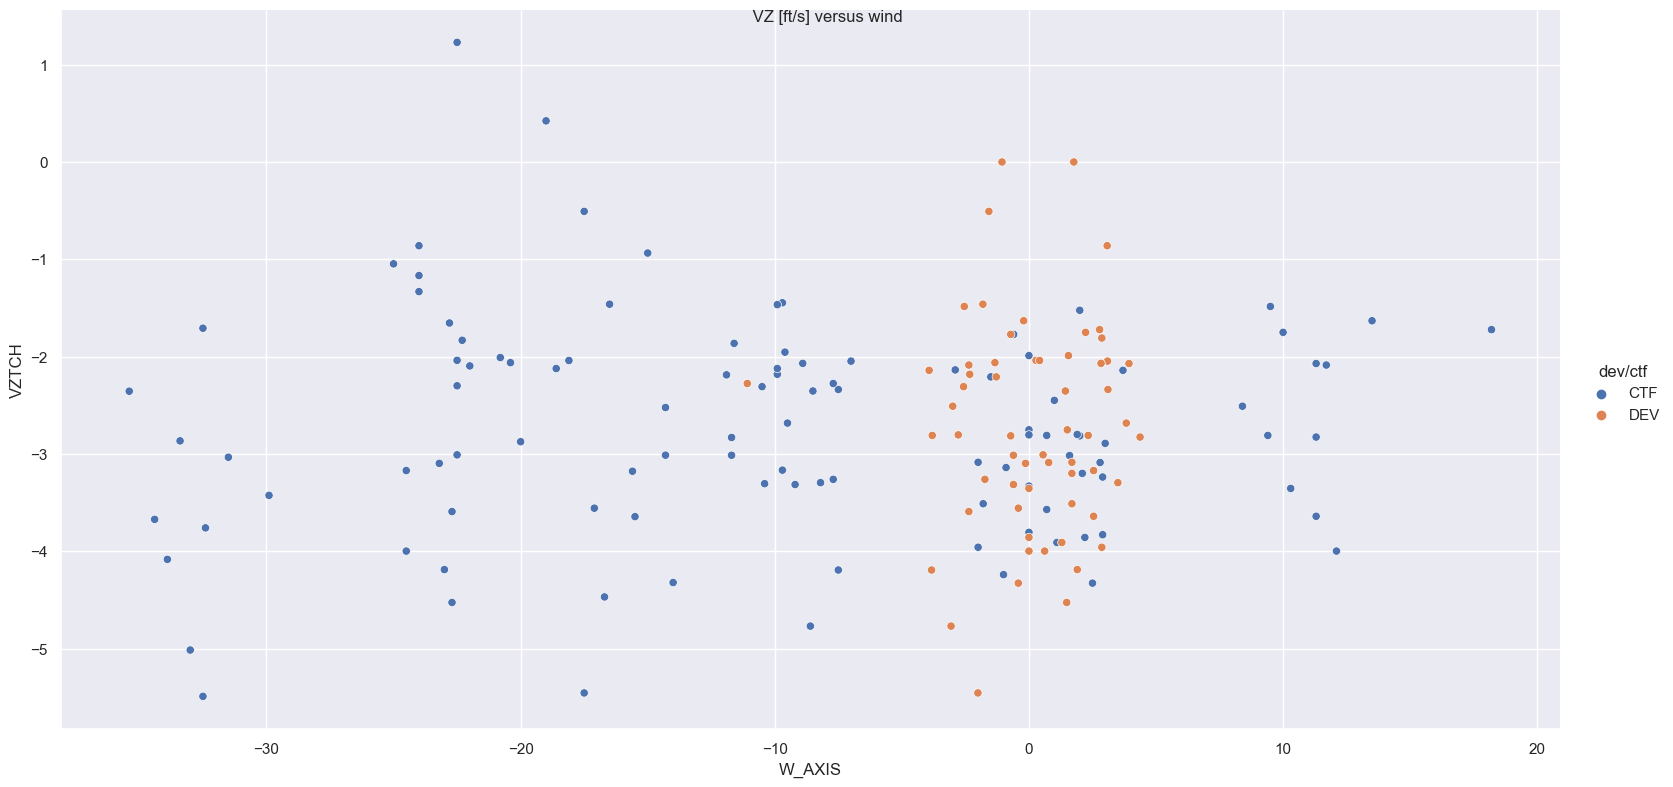

Min/Max experimented VZ: -5.49 / 1.2289 ft/s


In [120]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="W_AXIS",y_vars="VZTCH",size=8, aspect=2)
plt.suptitle(' VZ [ft/s] versus wind ')
plt.grid(True)
plt.show()
print ('Min/Max experimented VZ:',(min(dataset['VZTCH'])),'/',(max(dataset['VZTCH'])),'ft/s')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


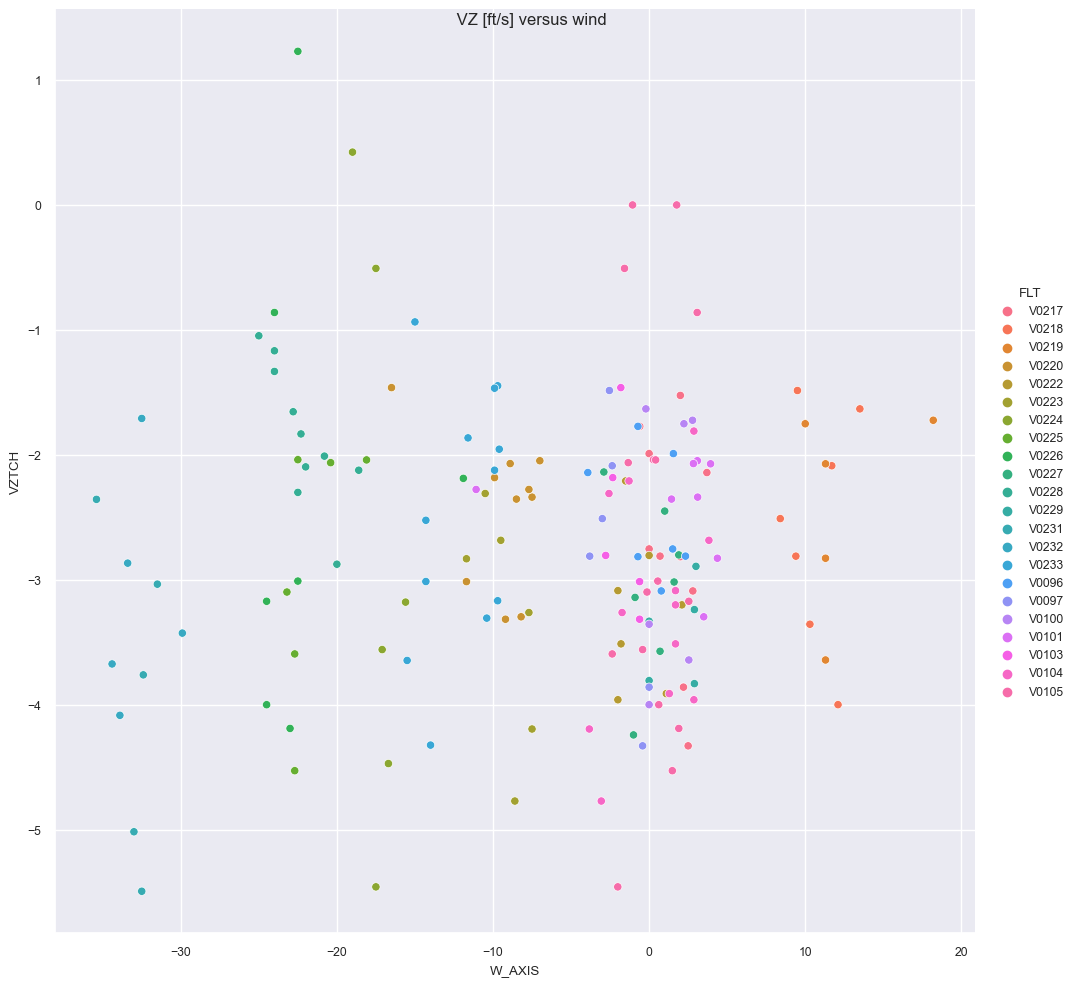

Min/Max experimented VZ: -5.49 / 1.2289 ft/s


In [187]:
sns.pairplot(data=dataset,hue="FLT",x_vars="W_AXIS",y_vars="VZTCH",size=10, aspect=1)
plt.suptitle(' VZ [ft/s] versus wind ')
plt.grid(True)
plt.show()
print ('Min/Max experimented VZ:',(min(dataset['VZTCH'])),'/',(max(dataset['VZTCH'])),'ft/s')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


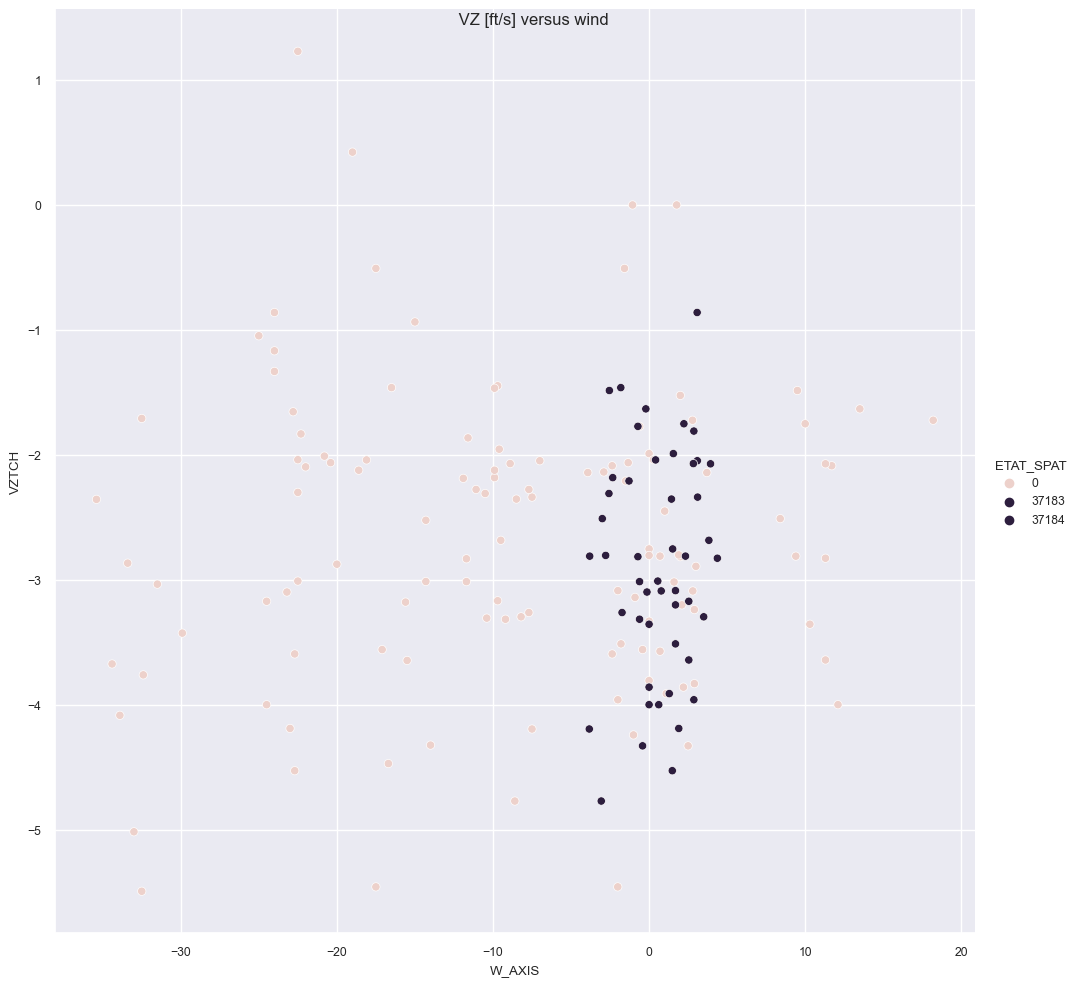

Min/Max experimented VZ: -5.49 / 1.2289 ft/s


In [188]:
sns.pairplot(data=dataset,hue="ETAT_SPAT",x_vars="W_AXIS",y_vars="VZTCH",size=10, aspect=1)
plt.suptitle(' VZ [ft/s] versus wind ')
plt.grid(True)
plt.show()
print ('Min/Max experimented VZ:',(min(dataset['VZTCH'])),'/',(max(dataset['VZTCH'])),'ft/s')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


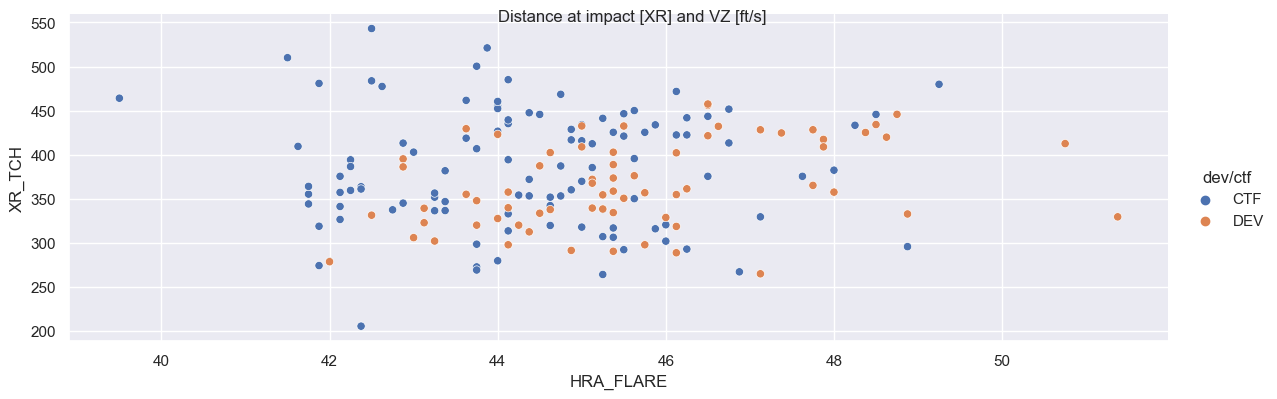

Min/Max experimented XR_TCH: 205 / 543 m
Min/Max experimented HRA_FLARE: 39.5 / 51.375 ft


In [121]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="HRA_FLARE",y_vars="XR_TCH",size=4, aspect=3)
plt.suptitle('Distance at impact [XR] and VZ [ft/s]')
plt.grid(True)
plt.show()
print ('Min/Max experimented XR_TCH:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')
print ('Min/Max experimented HRA_FLARE:',(min(dataset['HRA_FLARE'])),'/',(max(dataset['HRA_FLARE'])),'ft')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


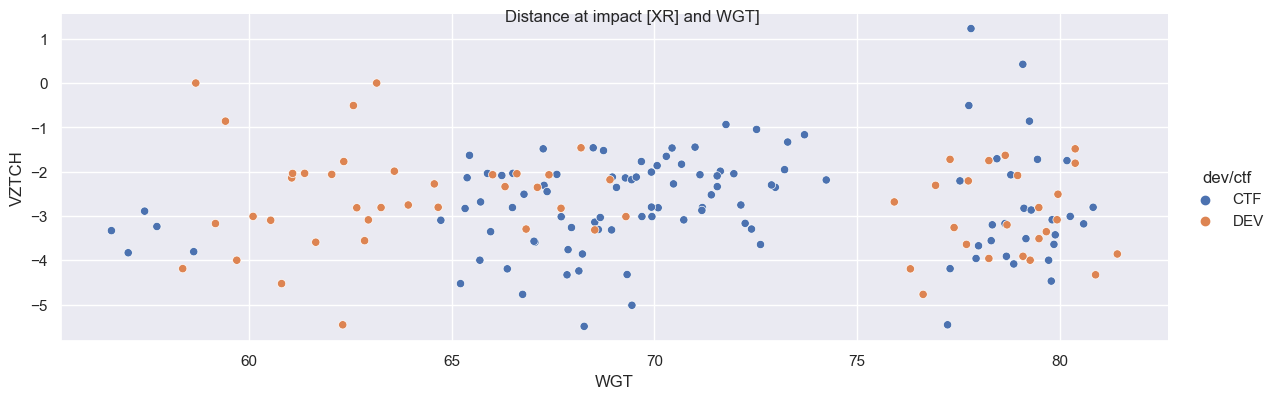

Min/Max experimented VZTCH: -5 / 1 ft/s
Min/Max experimented WGT: 56.5964 / 81.4238 tons


In [122]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="WGT",y_vars="VZTCH",size=4, aspect=3)
plt.suptitle('Distance at impact [XR] and WGT]')
plt.grid(True)
plt.show()
print ('Min/Max experimented VZTCH:', int(min(dataset['VZTCH'])),'/',int(max(dataset['VZTCH'])),'ft/s')
print ('Min/Max experimented WGT:',(min(dataset['WGT'])),'/',(max(dataset['WGT'])),'tons')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


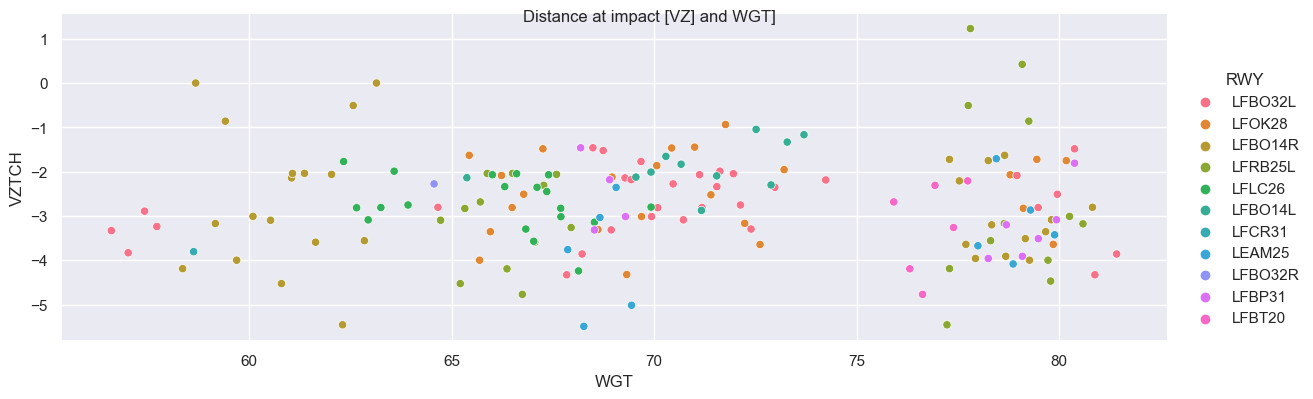

Min/Max experimented XR_TCH: -5 / 1 m
Min/Max experimented WGT: 56.5964 / 81.4238 tons


In [123]:
sns.pairplot(data=dataset,hue="RWY",x_vars="WGT",y_vars="VZTCH",size=4, aspect=3)
plt.suptitle('Distance at impact [VZ] and WGT]')
plt.grid(True)
plt.show()
print ('Min/Max experimented XR_TCH:', int(min(dataset['VZTCH'])),'/',int(max(dataset['VZTCH'])),'m')
print ('Min/Max experimented WGT:',(min(dataset['WGT'])),'/',(max(dataset['WGT'])),'tons')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


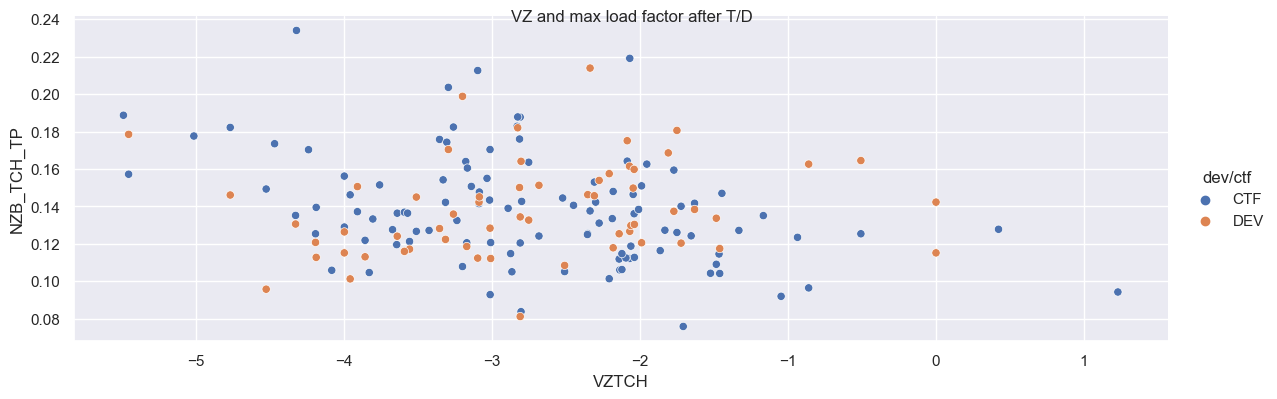

Min/Max experimented NZ: 0.0759 / 0.234 g
Min/Max experimented VZ: -5.49 / 1.2289 ft/s


In [124]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="VZTCH",y_vars="NZB_TCH_TP",size=4, aspect=3)
plt.suptitle('VZ and max load factor after T/D')
plt.grid(True)
plt.show()
print ('Min/Max experimented NZ:', (min(dataset["NZB_TCH_TP"])),'/',(max(dataset["NZB_TCH_TP"])),'g')
print ('Min/Max experimented VZ:',(min(dataset['VZTCH'])),'/',(max(dataset['VZTCH'])),'ft/s')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


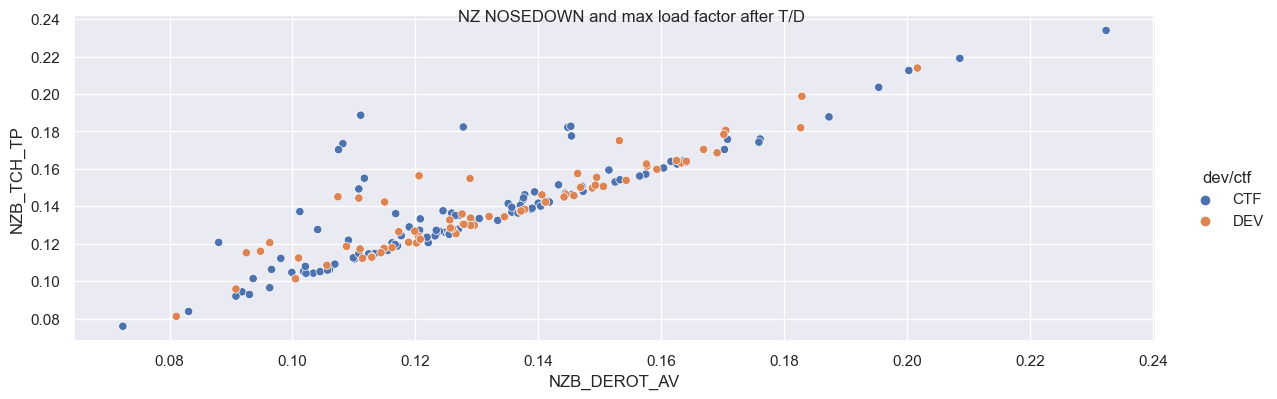

Min/Max experimented NZ: 0.0759 / 0.234 g
Min/Max experimented NZ NOSE DOWN: 0.0724 / 0.2324 g


In [125]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="NZB_DEROT_AV",y_vars="NZB_TCH_TP",size=4, aspect=3)
plt.suptitle('NZ NOSEDOWN and max load factor after T/D')
plt.grid(True)
plt.show()
print ('Min/Max experimented NZ:', (min(dataset["NZB_TCH_TP"])),'/',(max(dataset["NZB_TCH_TP"])),'g')
print ('Min/Max experimented NZ NOSE DOWN:',(min(dataset['NZB_DEROT_AV'])),'/',(max(dataset['NZB_DEROT_AV'])),'g')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


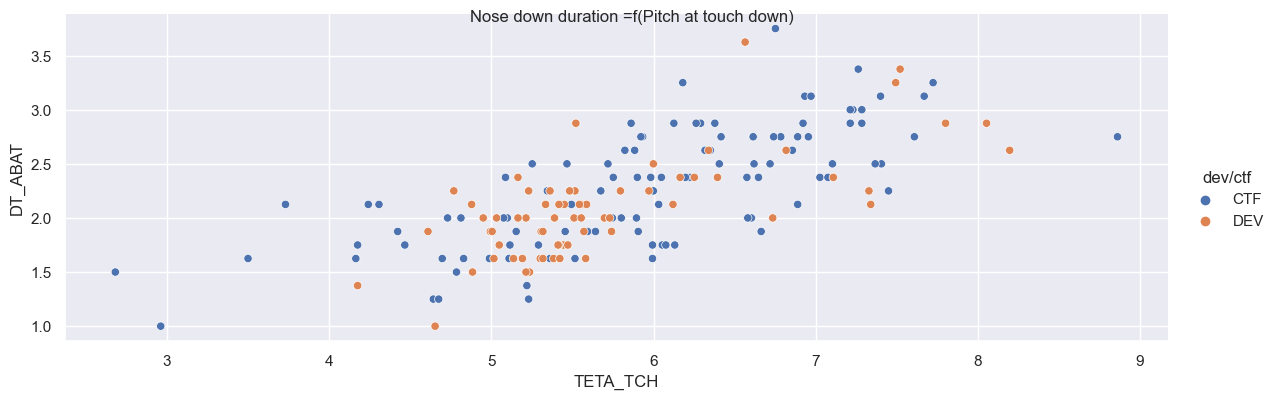

Min/Max nosedown duration: 1.0 / 3.75 s
Min/Max Pitch: 2.6807 / 8.8605 deg


In [126]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="TETA_TCH",y_vars="DT_ABAT",size=4, aspect=3)
plt.suptitle('Nose down duration =f(Pitch at touch down)')
plt.grid(True)
plt.show()
print ('Min/Max nosedown duration:', (min(dataset["DT_ABAT"])),'/',(max(dataset["DT_ABAT"])),'s')
print ('Min/Max Pitch:',(min(dataset['TETA_TCH'])),'/',(max(dataset['TETA_TCH'])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


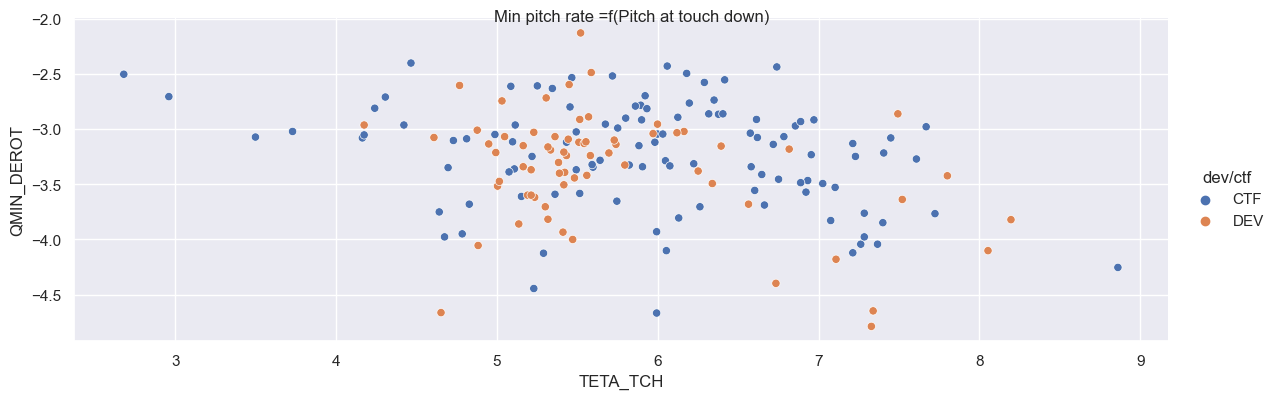

Min/Max nosedown pitch rate: -4.7891 / -1.7734 deg/s
Min/Max Pitch: 2.6807 / 8.8605 deg


In [127]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="TETA_TCH",y_vars="QMIN_DEROT",size=4, aspect=3)
plt.suptitle('Min pitch rate =f(Pitch at touch down)')
plt.grid(True)
plt.show()
print ('Min/Max nosedown pitch rate:', (min(dataset["QMIN_DEROT"])),'/',(max(dataset["QMIN_DEROT"])),'deg/s')
print ('Min/Max Pitch:',(min(dataset['TETA_TCH'])),'/',(max(dataset['TETA_TCH'])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


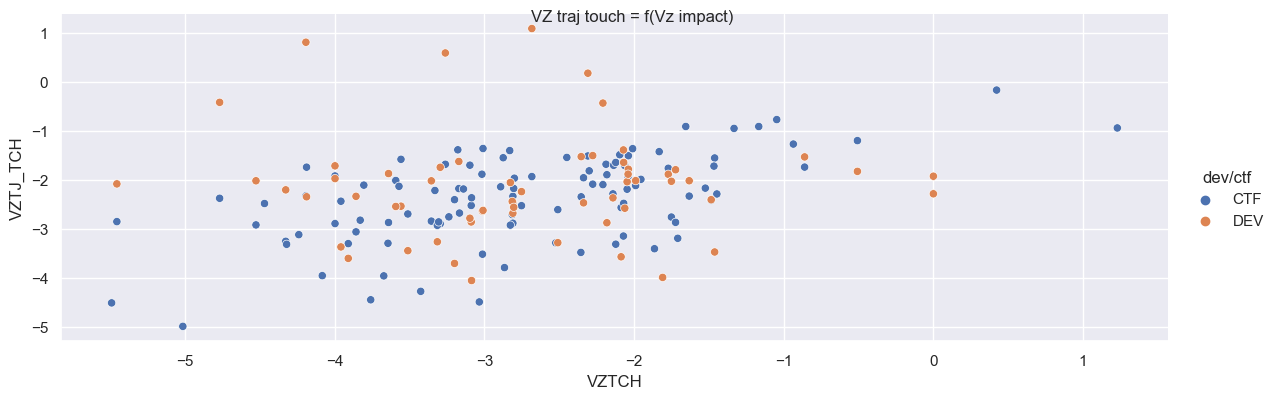

Min/Max experimented VZ traj touch: -4.9919 / 1.0836 ft/s
Min/Max experimented VZ: -5.49 / 1.2289 ft/s


In [128]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="VZTCH",y_vars="VZTJ_TCH",size=4, aspect=3)
plt.suptitle('VZ traj touch = f(Vz impact)')
plt.grid(True)
plt.show()
print ('Min/Max experimented VZ traj touch:', (min(dataset["VZTJ_TCH"])),'/',(max(dataset["VZTJ_TCH"])),'ft/s')
print ('Min/Max experimented VZ:',(min(dataset['VZTCH'])),'/',(max(dataset['VZTCH'])),'ft/s')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


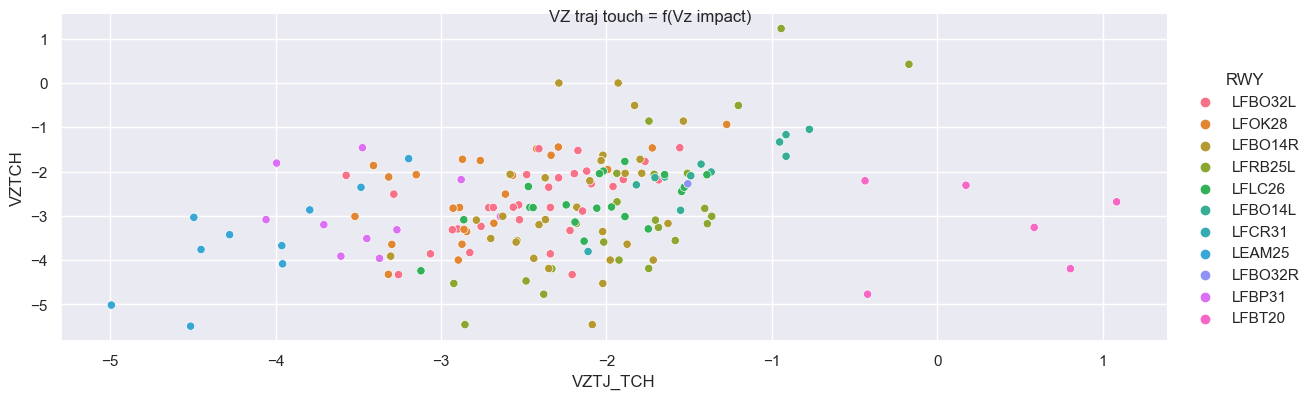

Min/Max experimented VZ traj touch: -4.9919 / 1.0836 ft/s
Min/Max experimented VZ: -5.49 / 1.2289 ft/s


In [129]:
sns.pairplot(data=dataset,hue="RWY",x_vars="VZTJ_TCH",y_vars="VZTCH",size=4, aspect=3)
plt.suptitle('VZ traj touch = f(Vz impact)')
plt.grid(True)
plt.show()
print ('Min/Max experimented VZ traj touch:', (min(dataset["VZTJ_TCH"])),'/',(max(dataset["VZTJ_TCH"])),'ft/s')
print ('Min/Max experimented VZ:',(min(dataset['VZTCH'])),'/',(max(dataset['VZTCH'])),'ft/s')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


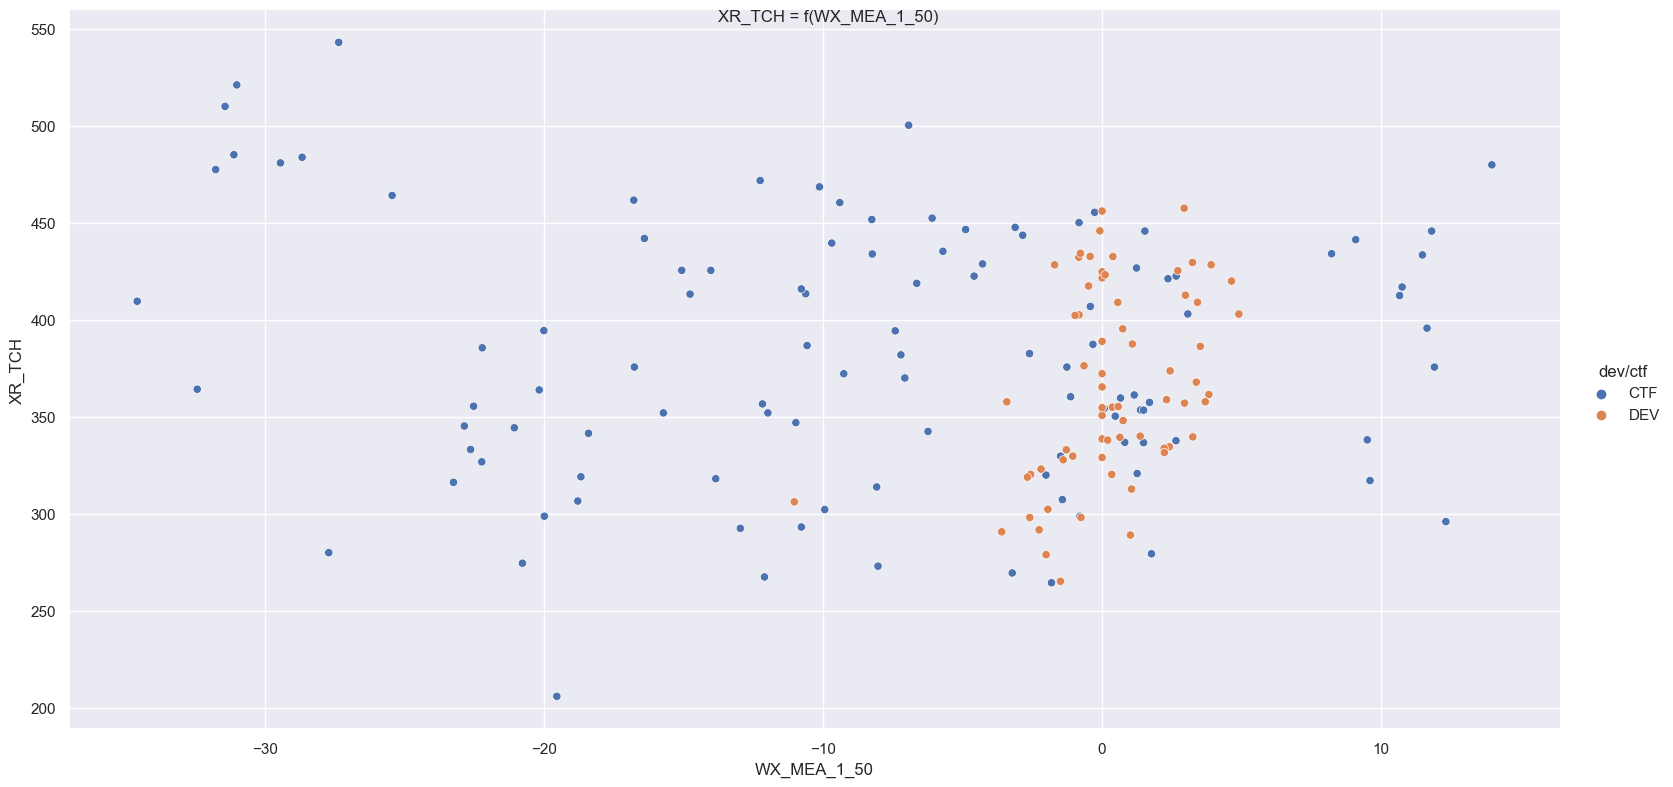

Min/Max experimented VZ traj touch: 205.8401 / 543.009 ft/s
Min/Max experimented Wind: -34.5953 / 13.9746 kt


In [130]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="WX_MEA_1_50",y_vars="XR_TCH",size=8, aspect=2)
plt.suptitle('XR_TCH = f(WX_MEA_1_50)')
plt.grid(True)
plt.show()
print ('Min/Max experimented VZ traj touch:', (min(dataset["XR_TCH"])),'/',(max(dataset["XR_TCH"])),'ft/s')
print ('Min/Max experimented Wind:',(min(dataset['WX_MEA_1_50'])),'/',(max(dataset['WX_MEA_1_50'])),'kt')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


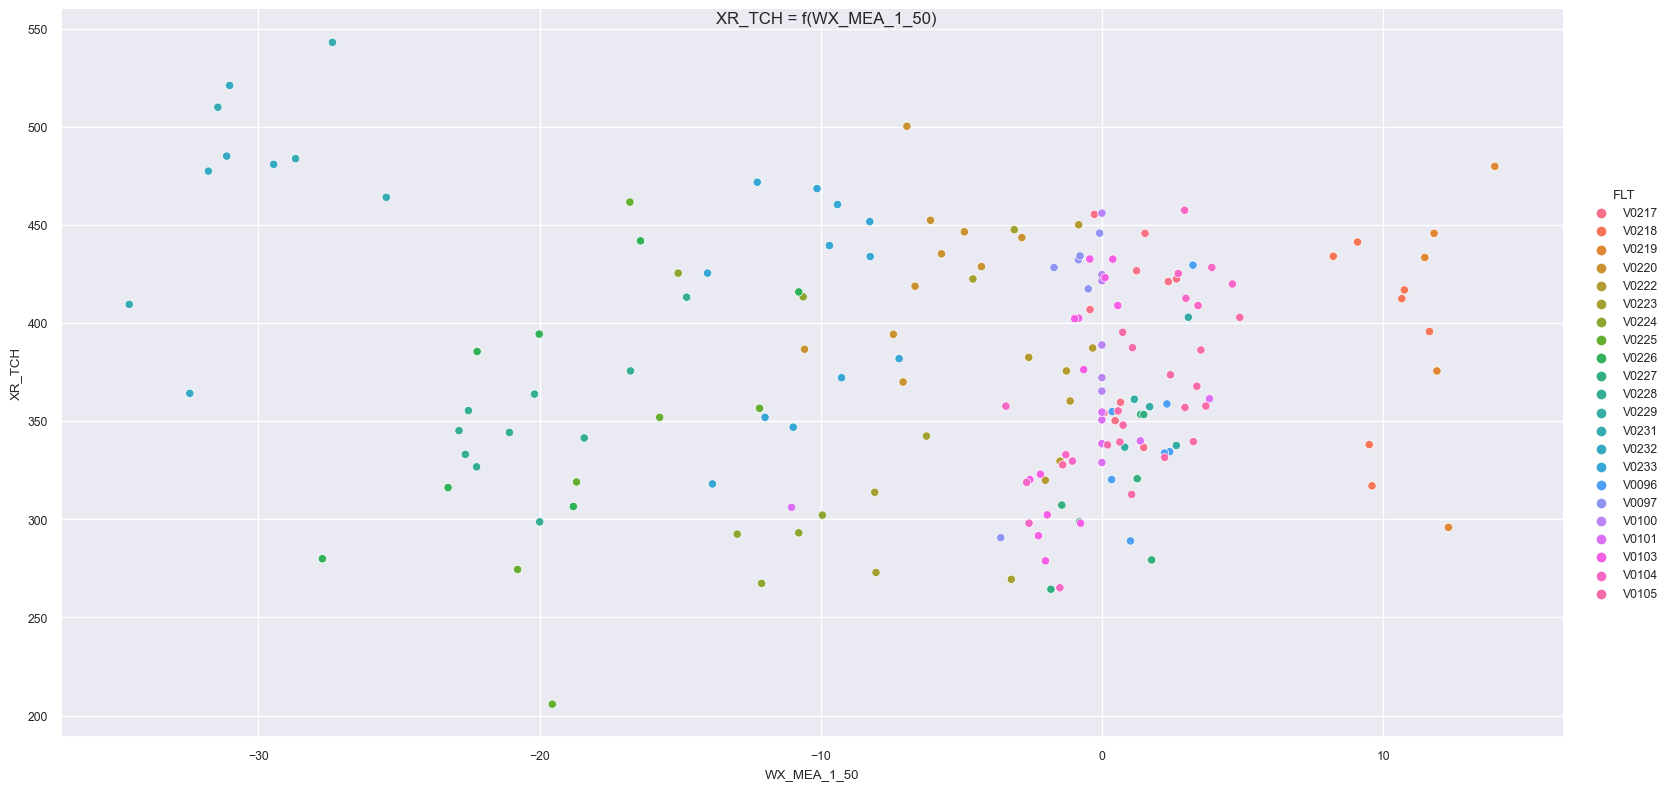

Min/Max experimented VZ traj touch: 205.8401 / 543.009 ft/s
Min/Max experimented Wind: -34.5953 / 13.9746 kt


In [184]:
sns.pairplot(data=dataset,hue="FLT",x_vars="WX_MEA_1_50",y_vars="XR_TCH",size=8, aspect=2)
plt.suptitle('XR_TCH = f(WX_MEA_1_50)')
plt.grid(True)
plt.show()
print ('Min/Max experimented VZ traj touch:', (min(dataset["XR_TCH"])),'/',(max(dataset["XR_TCH"])),'ft/s')
print ('Min/Max experimented Wind:',(min(dataset['WX_MEA_1_50'])),'/',(max(dataset['WX_MEA_1_50'])),'kt')

In [131]:
print (dataset['WX_MEA_1_50'],dataset['WY_MEA_1_50'])

0     2.3621
1     2.6548
2     0.4708
3     0.6609
4    -0.2675
       ...  
67    3.6977
68    4.9051
69    3.2538
70    1.0579
71   -1.3962
Name: WX_MEA_1_50, Length: 177, dtype: float64 0     1.8237
1     0.4576
2     1.3768
3     0.3351
4    -0.5922
       ...  
67    1.7765
68    1.5277
69    2.3448
70    0.1851
71    0.5207
Name: WY_MEA_1_50, Length: 177, dtype: float64


C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


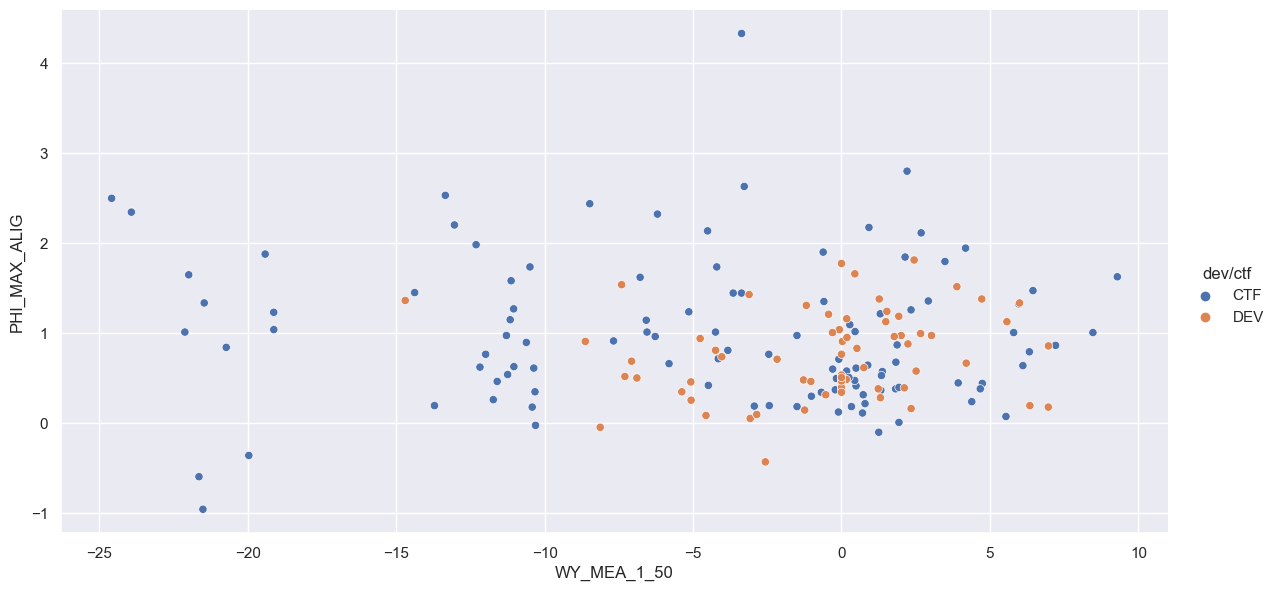

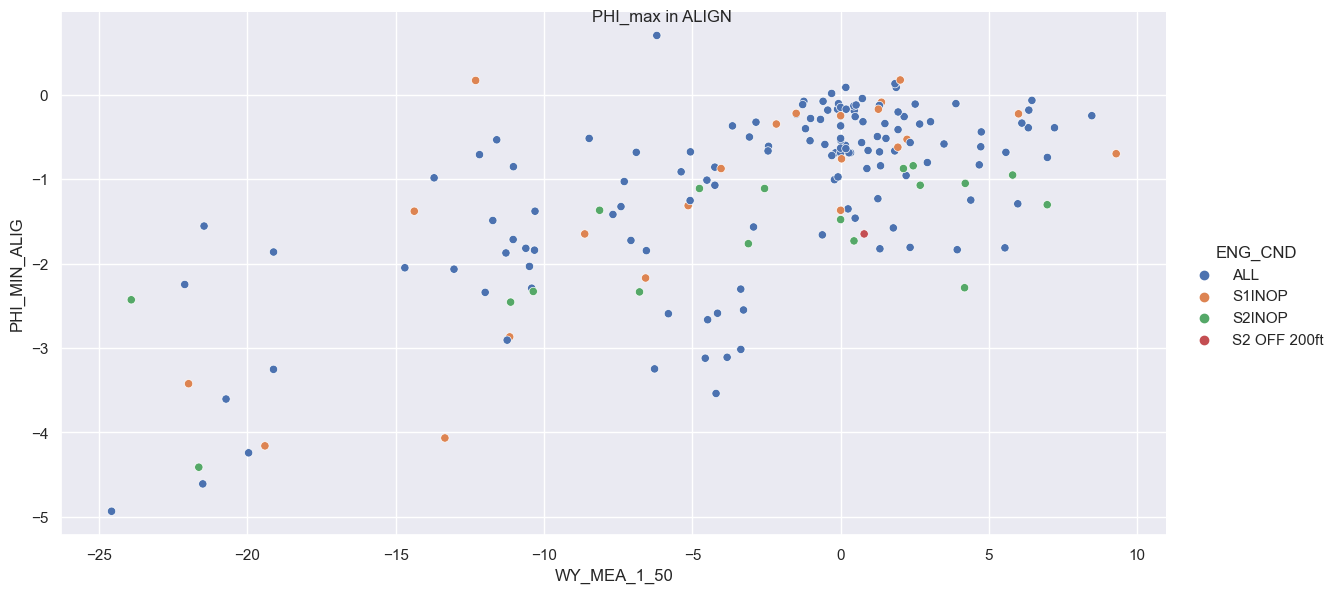

Min/Max experimented PHI: -4.9329 / 4.3341 deg


In [132]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="WY_MEA_1_50",y_vars="PHI_MAX_ALIG",size=6, aspect=2)
sns.pairplot(data=dataset,hue="ENG_CND",x_vars="WY_MEA_1_50",y_vars="PHI_MIN_ALIG",size=6, aspect=2)
plt.suptitle('PHI_max in ALIGN')
plt.grid(True)
plt.show()
print ('Min/Max experimented PHI:', (min(dataset["PHI_MIN_ALIG"])),'/',(max(dataset["PHI_MAX_ALIG"])),'deg')


C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


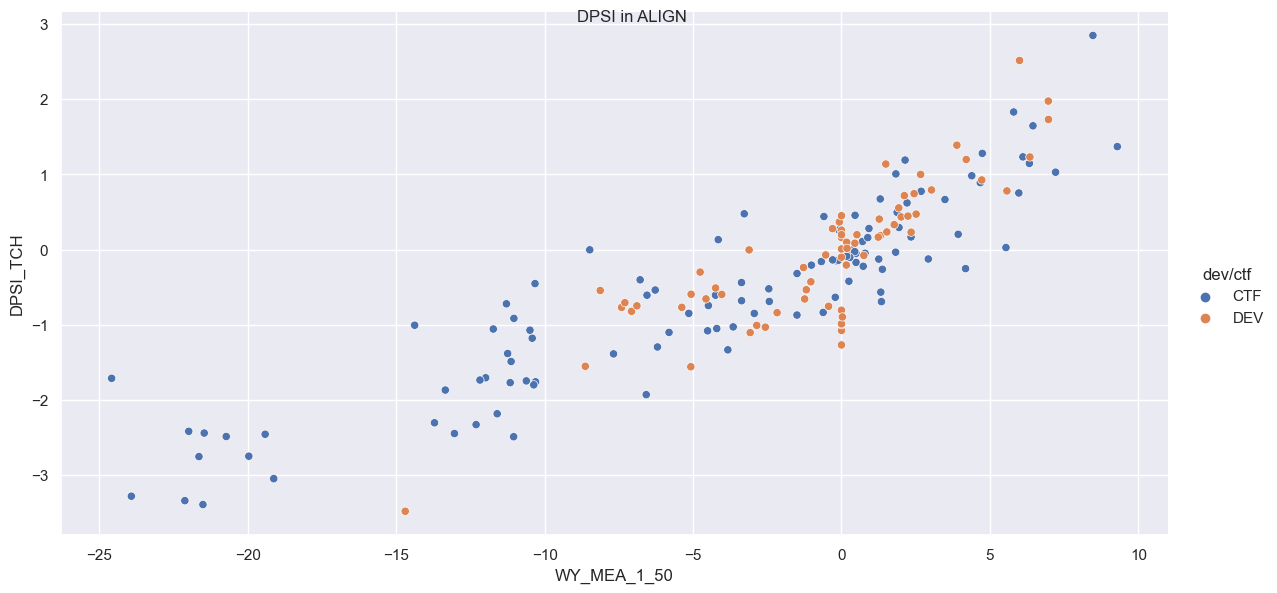

Min/Max experimented DPSI ALIGN: -9.4787 / 3.1216 deg
Min/Max experimented DPSI TOUCH: -3.4793 / 2.8469 deg


In [133]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="WY_MEA_1_50",y_vars="DPSI_TCH",size=6, aspect=2)
plt.suptitle('DPSI in ALIGN')
plt.grid(True)
plt.show()
print ('Min/Max experimented DPSI ALIGN:', (min(dataset["DPSI_ALIG"])),'/',(max(dataset["DPSI_ALIG"])),'deg')
print ('Min/Max experimented DPSI TOUCH:', (min(dataset["DPSI_TCH"])),'/',(max(dataset["DPSI_TCH"])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


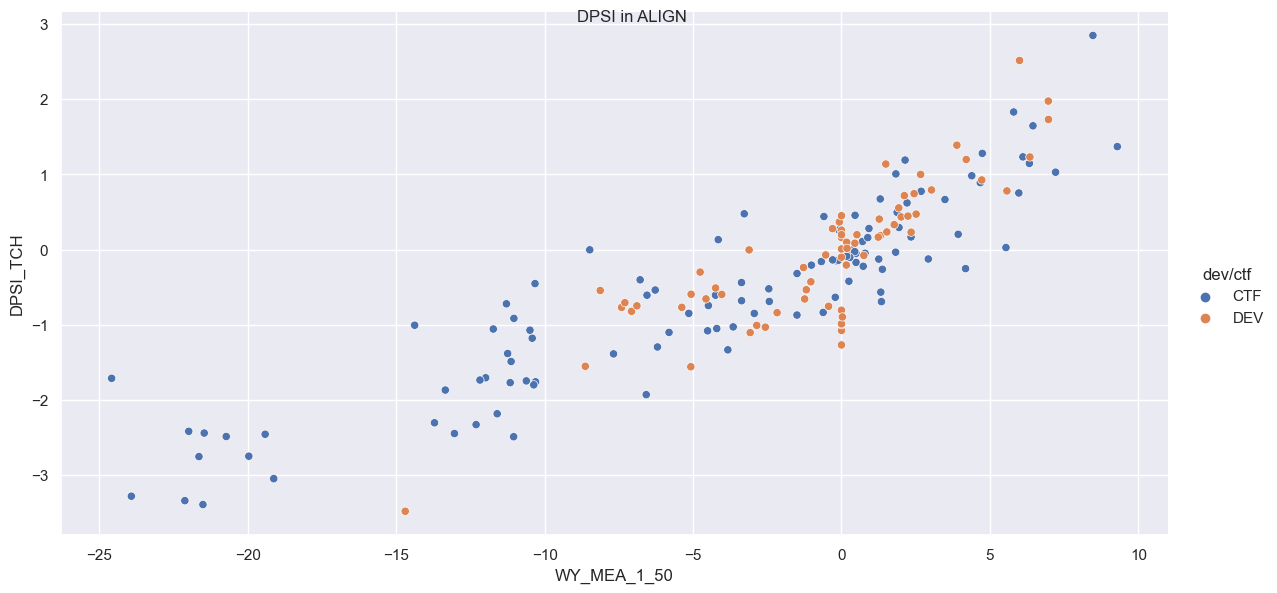

Min/Max experimented DPSI ALIGN: -9.4787 / 3.1216 deg
Min/Max experimented DPSI TOUCH: -3.4793 / 2.8469 deg


In [134]:

sns.pairplot(data=dataset,hue="dev/ctf",x_vars="WY_MEA_1_50",y_vars="DPSI_TCH",size=6, aspect=2)
plt.suptitle('DPSI in ALIGN')
plt.grid(True)
plt.show()
print ('Min/Max experimented DPSI ALIGN:', (min(dataset["DPSI_ALIG"])),'/',(max(dataset["DPSI_ALIG"])),'deg')
print ('Min/Max experimented DPSI TOUCH:', (min(dataset["DPSI_TCH"])),'/',(max(dataset["DPSI_TCH"])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


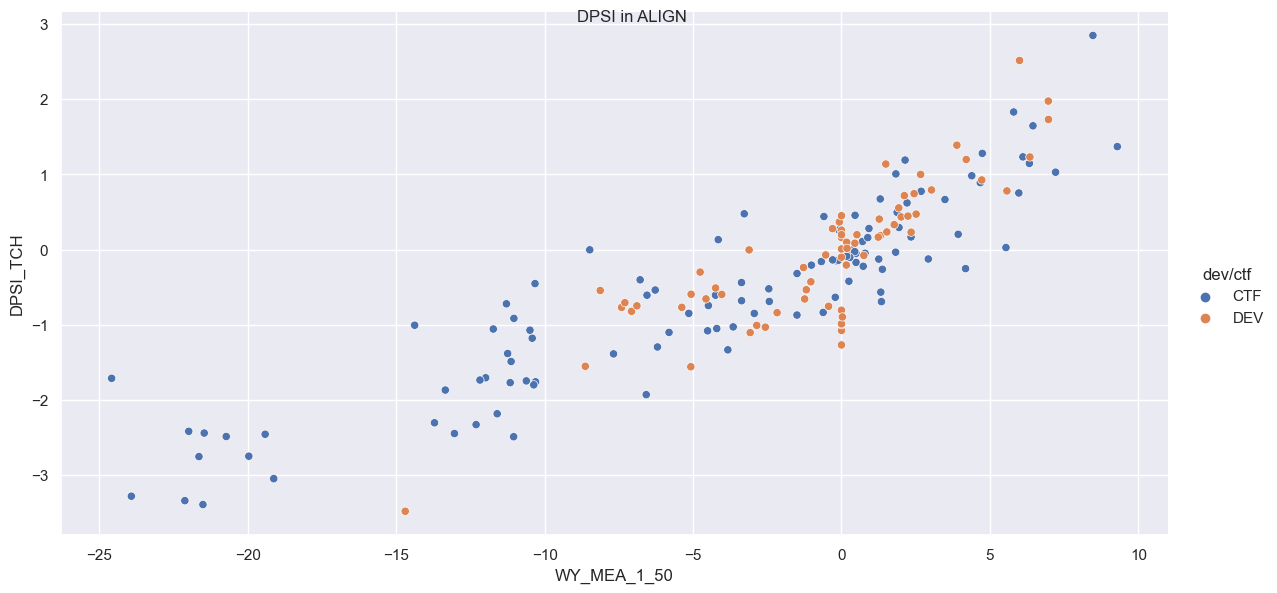

Min/Max experimented DPSI ALIGN: -9.4787 / 3.1216 deg
Min/Max experimented DPSI TOUCH: -3.4793 / 2.8469 deg


In [135]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="WY_MEA_1_50",y_vars="DPSI_TCH",size=6, aspect=2)
plt.suptitle('DPSI in ALIGN')
plt.grid(True)
plt.show()
print ('Min/Max experimented DPSI ALIGN:', (min(dataset["DPSI_ALIG"])),'/',(max(dataset["DPSI_ALIG"])),'deg')
print ('Min/Max experimented DPSI TOUCH:', (min(dataset["DPSI_TCH"])),'/',(max(dataset["DPSI_TCH"])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


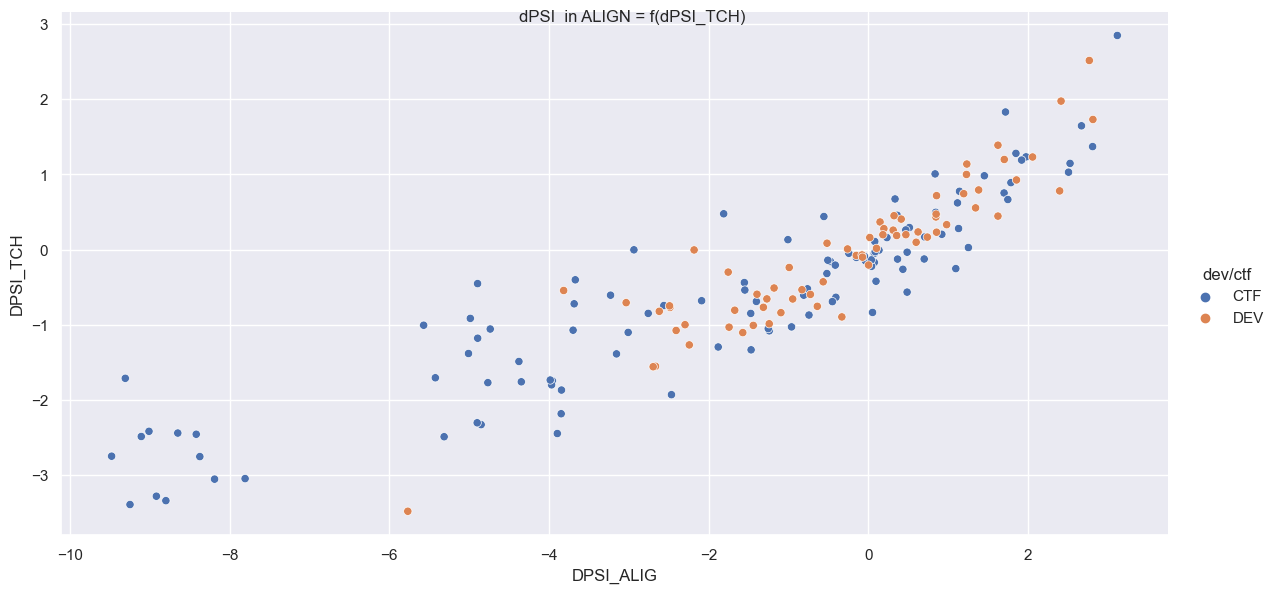

Min/Max experimented PHI: -3.4793 / 3.1216 deg


In [136]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="DPSI_ALIG",y_vars="DPSI_TCH",size=6, aspect=2)

plt.suptitle('dPSI  in ALIGN = f(dPSI_TCH)')
plt.grid(True)
plt.show()
print ('Min/Max experimented PHI:', (min(dataset["DPSI_TCH"])),'/',(max(dataset["DPSI_ALIG"])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


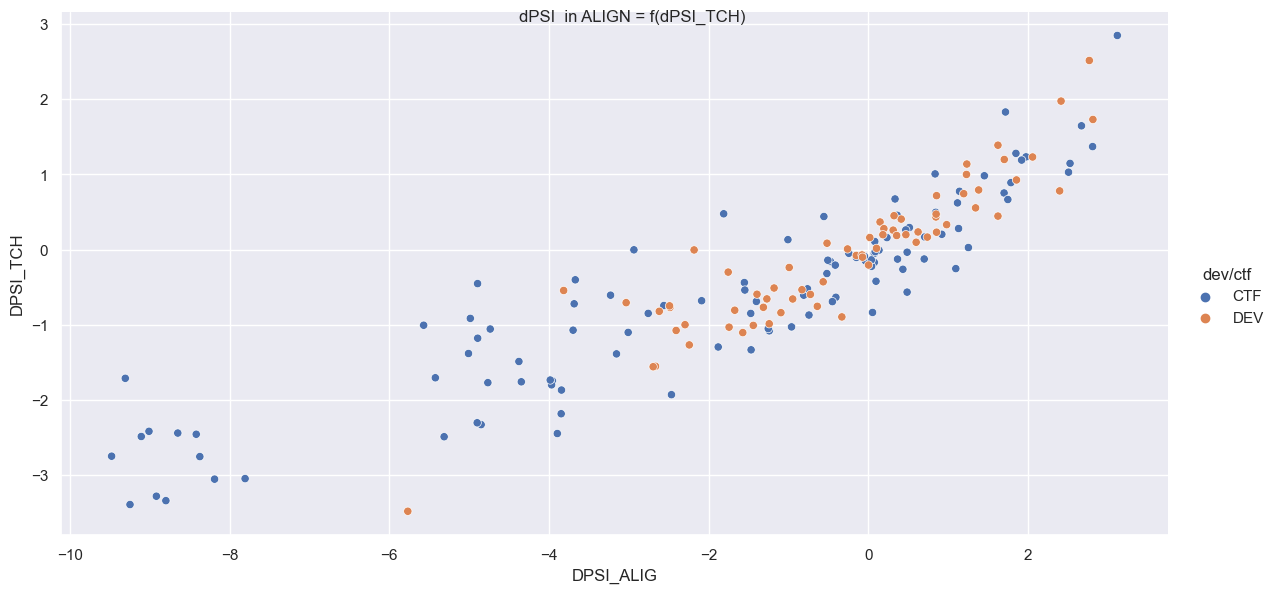

Min/Max experimented DPSI: -3.4793 / 3.1216 deg


In [137]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="DPSI_ALIG",y_vars="DPSI_TCH",size=6, aspect=2)

plt.suptitle('dPSI  in ALIGN = f(dPSI_TCH)')
plt.grid(True)
plt.show()
print ('Min/Max experimented DPSI:', (min(dataset["DPSI_TCH"])),'/',(max(dataset["DPSI_ALIG"])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


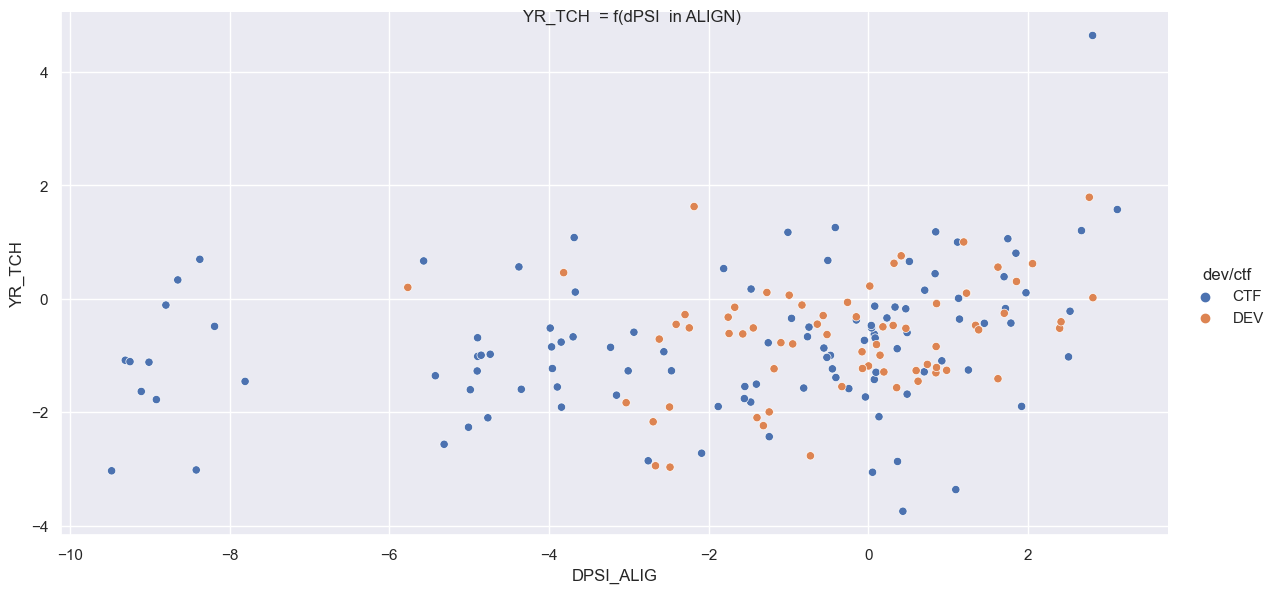

Min/Max experimented DPSI: -3.4793 / 3.1216 deg


In [138]:
sns.pairplot(data=dataset,hue="dev/ctf",x_vars="DPSI_ALIG",y_vars="YR_TCH",size=6, aspect=2)

plt.suptitle('YR_TCH  = f(dPSI  in ALIGN)')
plt.grid(True)
plt.show()
print ('Min/Max experimented DPSI:', (min(dataset["DPSI_TCH"])),'/',(max(dataset["DPSI_ALIG"])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


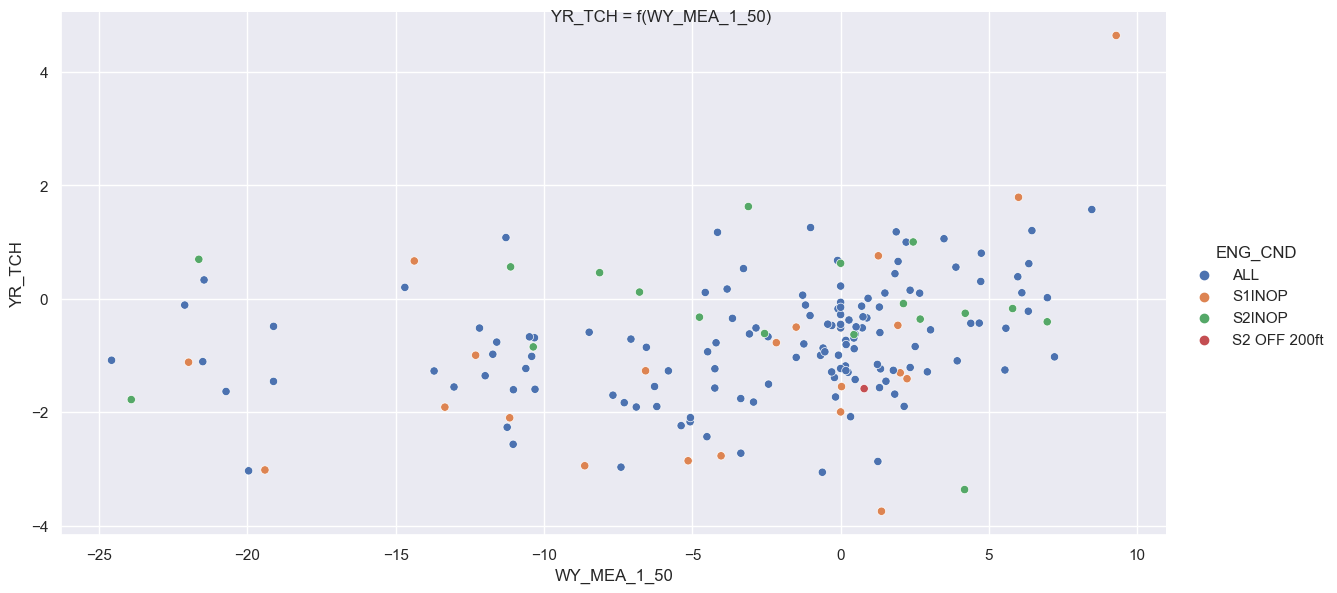

Min/Max experimented DPSI: -3.4793 / 3.1216 deg


In [139]:
sns.pairplot(data=dataset,hue="ENG_CND",x_vars="WY_MEA_1_50",y_vars="YR_TCH",size=6, aspect=2)

plt.suptitle('YR_TCH = f(WY_MEA_1_50)')
plt.grid(True)
plt.show()
print ('Min/Max experimented DPSI:', (min(dataset["DPSI_TCH"])),'/',(max(dataset["DPSI_ALIG"])),'deg')


In [140]:
dataset['OVER_LOCSTAR']=dataset['OVER_LOCSTAR'].fillna(0)

In [141]:
print (dataset.loc[:,"OVER_LOCSTAR"])

0     0.0649
1     1.4126
2     0.0000
3     0.8426
4     0.0000
       ...  
67    0.0000
68    0.9763
69    1.1800
70    0.8571
71    1.3653
Name: OVER_LOCSTAR, Length: 177, dtype: float64


In [142]:
def cond_overshoot(over):
    if (over>0) :
        overshoot=1
    else:
        overshoot=0
    return overshoot  

In [143]:
dataset.loc[:,'OVERSHOOT_LOC*'] = dataset['OVER_LOCSTAR'].apply(cond_overshoot)
dataset.loc[:,'DTRK_LOC*']=dataset['DTRK_LOCSTAR'].apply(lambda row: abs(row))


In [144]:
dataset.describe()

BULLE_SPAT          CG  DENSITY_ALT  DH_GA  DIST_LOCSTAR   DPSI_ALIG  \
count    177.000000  177.000000   103.000000    0.0    174.000000  177.000000   
mean   22082.372881   25.005622   538.160776    NaN     10.412079   -1.284788   
std       12.386620    9.891826   455.068354    NaN      2.734036    2.864017   
min    22032.000000   11.010000  -289.679500    NaN      5.600700   -9.478700   
25%    22084.000000   15.325800   177.872600    NaN      8.352975   -2.617300   
50%    22086.000000   27.131800   496.663600    NaN      9.910600   -0.505400   
75%    22086.000000   35.547100   821.941600    NaN     11.908550    0.601200   
max    22086.000000   39.594600  2461.069600    NaN     21.787100    3.121600   

         DPSI_TCH   DT_50_TCH     DT_ABAT    DT_FLARE  ...         WGT  \
count  176.000000  176.000000  175.000000  177.000000  ...  177.000000   
mean    -0.408226    6.493608    2.207143    6.594633  ...   70.490082   
std      1.157619    1.062869    0.518812    1.038010  ...    6.489451   
min     -3.479300    4.125000    1.000000    4.250000  ...   56.596400   
25%     -1.013000    5.750000    1.875000    5.750000  ...   66.312000   
50%     -0.257600    6.375000    2.125000    6.500000  ...   69.434900   
75%      0.278725    7.250000    2.500000    7.250000  ...   77.539700   
max      2.846900    9.750000    3.750000    9.750000  ...   81.423800   

       WX_MEA_1_50  WY_MEA_1_50    XR_NWTCH      XR_TCH   YR_MAX_RO  \
count   177.000000   177.000000  175.000000  176.000000  177.000000   
mean     -4.951312    -2.975888  550.298214  376.446719   -0.763776   
std      10.296220     7.164941   47.684640   60.780243    1.758192   
min     -34.595300   -24.582300  390.243400  205.840100   -5.593100   
25%     -10.577200    -6.550400  516.736150  333.076400   -1.912800   
50%      -1.129800    -0.209200  546.382400  368.901250   -1.131700   
75%       1.152200     1.492300  583.260050  425.318550    0.491000   
max      13.974600     9.290100  683.256000  543.009000    4.645800   

         YR_NWTCH      YR_TCH  OVERSHOOT_LOC*   DTRK_LOC*  
count  175.000000  176.000000      177.000000  177.000000  
mean    -0.683953   -0.749027        0.723164   74.095344  
std      1.153985    1.130804        0.448704   30.805665  
min     -3.813100   -3.747200        0.000000   14.450800  
25%     -1.383400   -1.412450        0.000000   44.345700  
50%     -0.720800   -0.721450        1.000000   70.465300  
75%     -0.017700   -0.124525        1.000000  109.826600  
max      3.965900    4.645800        1.000000  114.802400  

[8 rows x 132 columns]

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


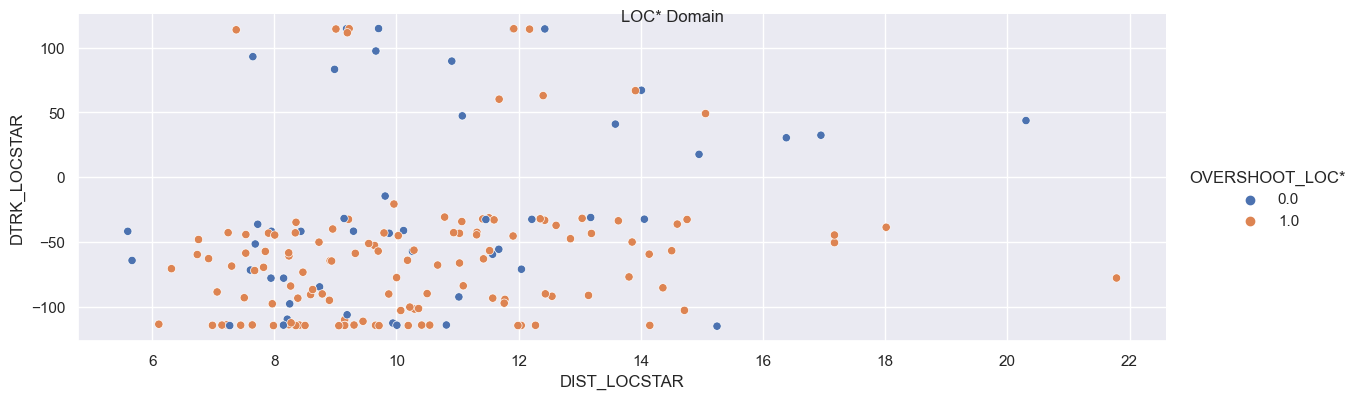

Min/Max experimented OVER: 0.0 / 371.0419 mA


In [145]:
sns.pairplot(data=dataset,hue='OVERSHOOT_LOC*',size=4,x_vars="DIST_LOCSTAR",y_vars="DTRK_LOCSTAR", aspect=3)
plt.suptitle('LOC* Domain')
plt.grid(True)
plt.show()
print ('Min/Max experimented OVER:', (min(dataset["OVER_LOCSTAR"])),'/',(max(dataset["OVER_LOCSTAR"])),'mA')


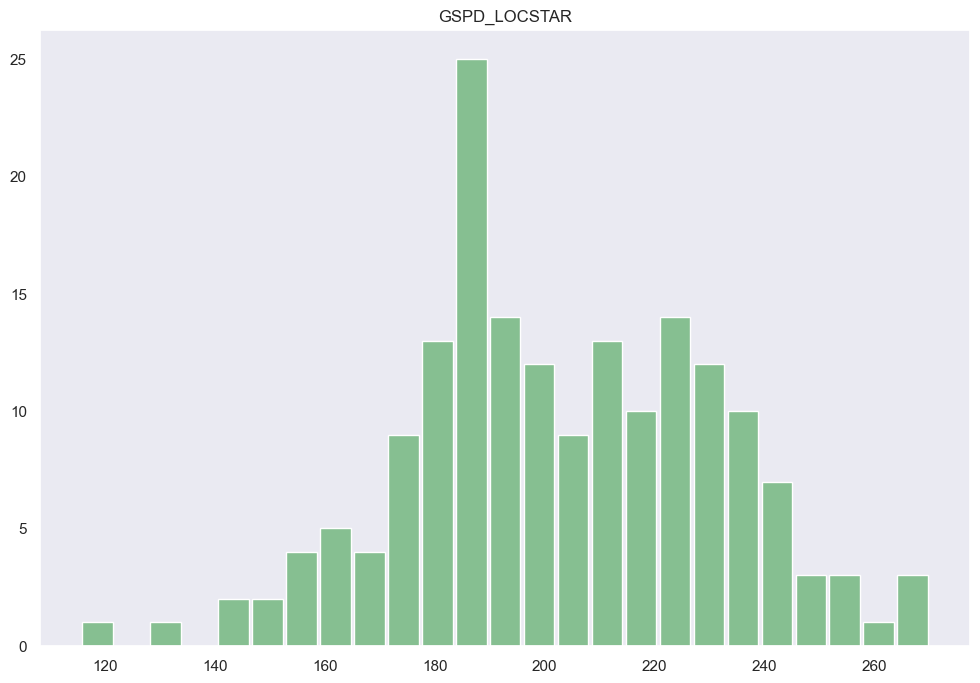

In [146]:
dataset.hist(column='GSPD_LOCSTAR', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


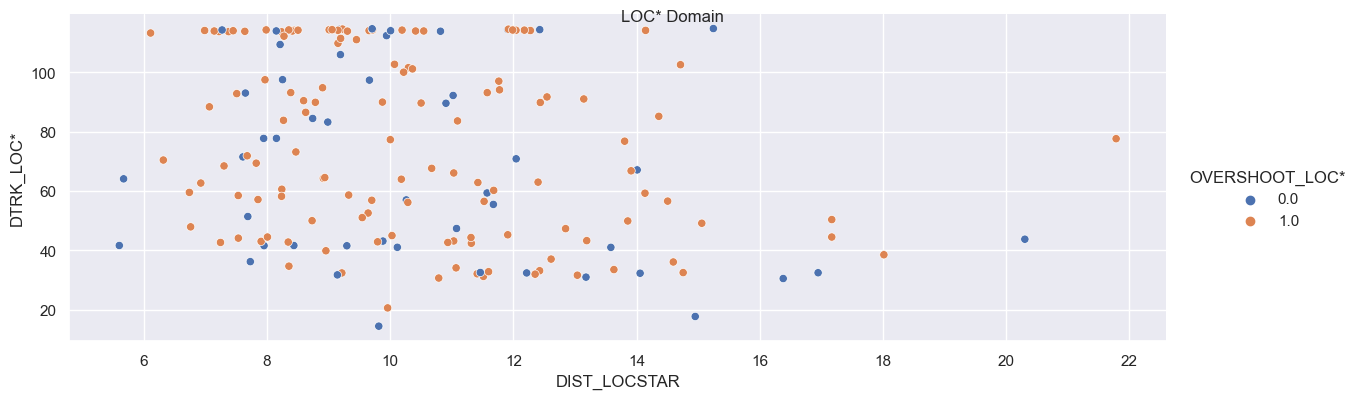

Min/Max experimented OVER: 0.0 / 371.0419 mA


In [147]:
sns.pairplot(data=dataset,hue='OVERSHOOT_LOC*',size=4,x_vars="DIST_LOCSTAR",y_vars="DTRK_LOC*", aspect=3)
plt.suptitle('LOC* Domain')
plt.grid(True)
plt.show()
print ('Min/Max experimented OVER:', (min(dataset["OVER_LOCSTAR"])),'/',(max(dataset["OVER_LOCSTAR"])),'mA')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


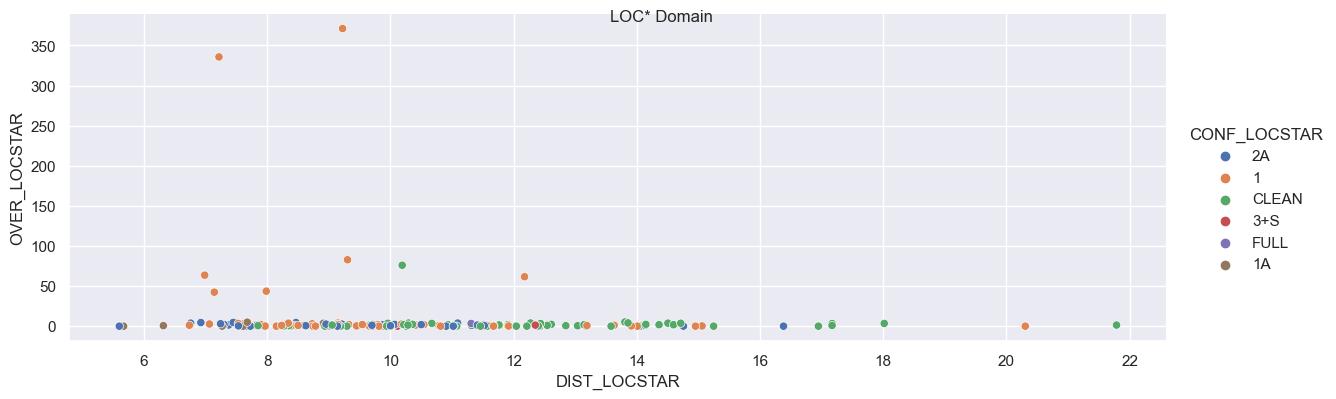

Min/Max experimented OVER: 0.0 / 371.0419 mA


In [148]:
sns.pairplot(data=dataset,hue='CONF_LOCSTAR',size=4,x_vars="DIST_LOCSTAR",y_vars="OVER_LOCSTAR", aspect=3)
plt.suptitle('LOC* Domain')
plt.grid(True)
plt.show()
print ('Min/Max experimented OVER:', (min(dataset["OVER_LOCSTAR"])),'/',(max(dataset["OVER_LOCSTAR"])),'mA')

In [149]:
overshoot_above100 = dataset[dataset['OVER_LOCSTAR'] >=100].key
print (overshoot_above100)

14     M11000_V0218_5
104    M11000_V0232_2
24     M11058_V0101_5
Name: key, dtype: object


C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


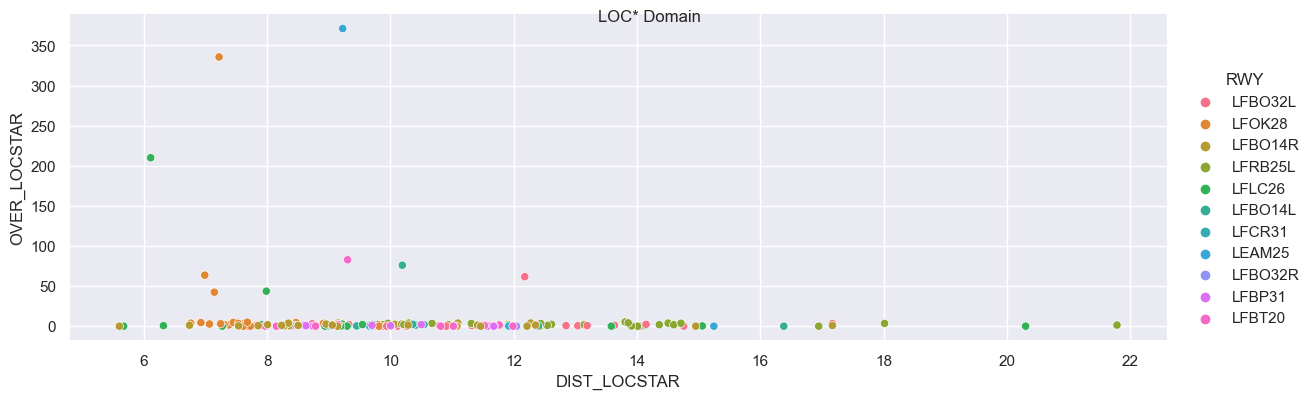

Min/Max experimented OVER: 0.0 / 371.0419 mA


In [150]:
sns.pairplot(data=dataset,hue='RWY',size=4,x_vars="DIST_LOCSTAR",y_vars="OVER_LOCSTAR", aspect=3)
plt.suptitle('LOC* Domain')
plt.grid(True)
plt.show()
print ('Min/Max experimented OVER:', (min(dataset["OVER_LOCSTAR"])),'/',(max(dataset["OVER_LOCSTAR"])),'mA')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


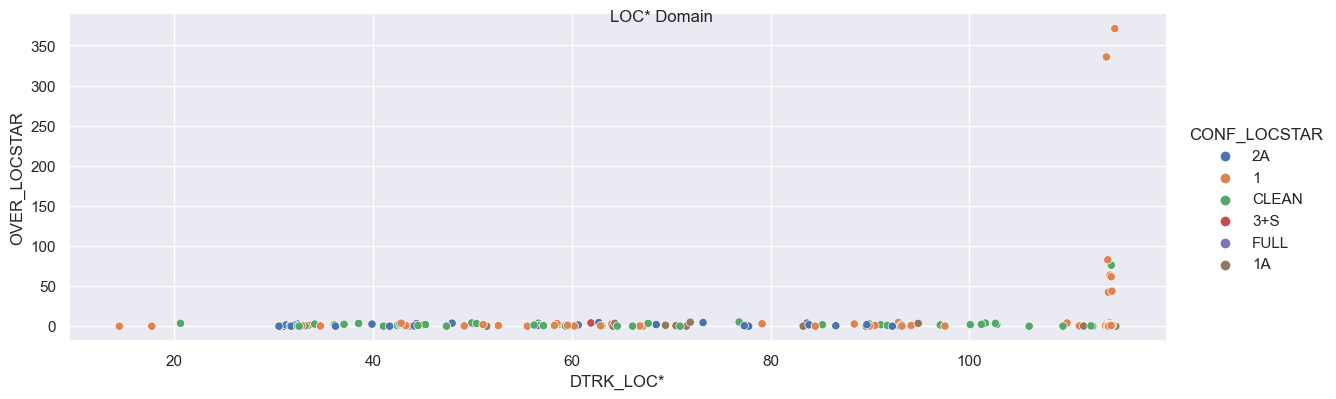

Min/Max experimented OVER: 0.0 / 371.0419 mA


In [151]:
sns.pairplot(data=dataset,hue='CONF_LOCSTAR',size=4,x_vars="DTRK_LOC*",y_vars="OVER_LOCSTAR", aspect=3)
plt.suptitle('LOC* Domain')
plt.grid(True)
plt.show()
print ('Min/Max experimented OVER:', (min(dataset["OVER_LOCSTAR"])),'/',(max(dataset["OVER_LOCSTAR"])),'mA')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


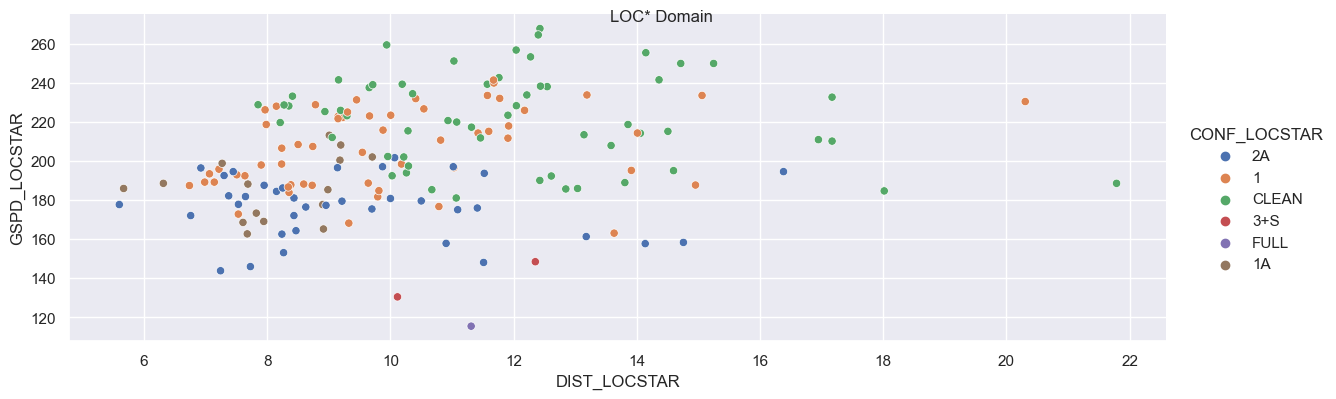

Min/Max experimented OVER: 0.0 / 371.0419 mA


In [152]:
sns.pairplot(data=dataset,hue='CONF_LOCSTAR',size=4,x_vars="DIST_LOCSTAR",y_vars="GSPD_LOCSTAR", aspect=3)
plt.suptitle('LOC* Domain')
plt.grid(True)
plt.show()
print ('Min/Max experimented OVER:', (min(dataset["OVER_LOCSTAR"])),'/',(max(dataset["OVER_LOCSTAR"])),'mA')

In [153]:

liste_LOCSTAR=["CONF_LOCSTAR",'OVERSHOOT_LOC*','GSPD_LOCSTAR','OVER_LOCSTAR','DTRK_LOC*','DIST_LOCSTAR']


In [154]:
dataset_locstar=dataset[liste_LOCSTAR]

In [155]:
dataset_locstar.describe()

OVERSHOOT_LOC*  GSPD_LOCSTAR  OVER_LOCSTAR   DTRK_LOC*  DIST_LOCSTAR
count      177.000000    177.000000    177.000000  177.000000    174.000000
mean         0.723164    202.927966      8.503664   74.095344     10.412079
std          0.448704     28.122710     41.724689   30.805665      2.734036
min          0.000000    115.500000      0.000000   14.450800      5.600700
25%          0.000000    184.875000      0.000000   44.345700      8.352975
50%          1.000000    198.500000      0.956900   70.465300      9.910600
75%          1.000000    225.125000      2.339000  109.826600     11.908550
max          1.000000    270.125000    371.041900  114.802400     21.787100

In [156]:
sns.set_theme(font_scale=0.8)

ValueError: cannot reindex on an axis with duplicate labels

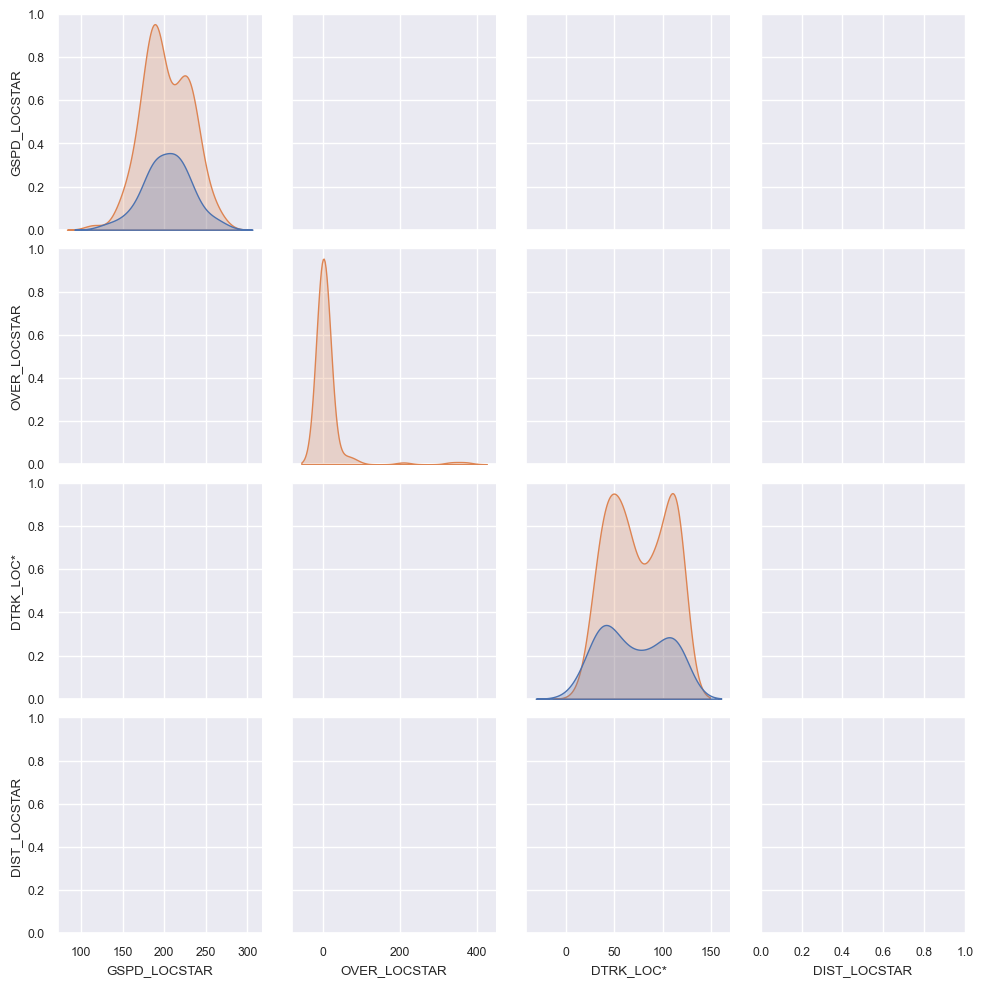

In [157]:
sns.pairplot(dataset_locstar, hue="OVERSHOOT_LOC*")
plt.show()

In [ ]:
dataset_locstar_clean=dataset_locstar[dataset_locstar["CONF_LOCSTAR"]=='CLEAN']
dataset_locstar_conf1or2=dataset_locstar[(dataset_locstar["CONF_LOCSTAR"]=="1") | (dataset_locstar["CONF_LOCSTAR"]=='1A') | (dataset_locstar["CONF_LOCSTAR"]=="2A")]
dataset_locstar_conf3orF=dataset_locstar[(dataset_locstar["CONF_LOCSTAR"]=="3+S")| (dataset_locstar["CONF_LOCSTAR"]=='FULL')]

In [ ]:
sns.pairplot(dataset_locstar_clean, hue="OVERSHOOT_LOC*",height=5)
plt.show()

In [ ]:
sns.pairplot(dataset_locstar_conf1or2, hue="OVERSHOOT_LOC*",height=5)
plt.show()

In [ ]:
sns.pairplot(dataset_locstar_conf3orF, hue="OVERSHOOT_LOC*",height=5)
plt.show()

In [ ]:
dataset_locstar_clean.describe()

In [ ]:
dataset_locstar_clean.corr(method='pearson')

In [ ]:
from sklearn.linear_model import LinearRegression


# transforming the data to include another axis
x = dataset_locstar_clean['DTRK_LOC*'].values.reshape(-1, 1)
y = dataset_locstar_clean['OVER_LOCSTAR'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [ ]:
#landing_perfo=dataset[["AC_NB","FLT","TEST_NB","TEST","RWY","W_HDG","W_SPD","W_GUST","W_AXIS","W_LAT","WGT","CG","CONF","AP","ATHR","VSEL","ENG_CND","XR_TCH","VZTCH","YR_TCH","VY_TCH","PHI_TCH","CREW","COMMENTS"]]
landing_perfo=dataset[["AC_NB","FLT","TEST_NB","GMT_REF","RWY","WX_MEA_1_50","WY_MEA_1_50","WGT","CG","CONF","AP","ATHR","VSEL","ENG_CND","XR_TCH","VZTCH","YR_TCH","VY_TCH","PHI_TCH","DPSI_TCH","COMMENTS"]].round(1)

In [ ]:
s = landing_perfo.style.set_table_styles([
                            {
                                "selector":"thead",
                                "props": [("background-color", "grey"), ("color", "white"),
                                          ("border", "3px solid black"),
                                          ("font-size", "6pt"), ("font-style", "italic")]
                            },
                            {
                                'selector': 'th', 
                                'props': [("border", "3px solid black")]
                            },
                            {
                                "selector":"th.row_heading",
                                "props": [("background-color", "white"), ("color", "BLACK"),
                                          ("border", "2px solid black"),
                                          ("font-size", "6pt"), ("font-style", "italic")]
                            },
                            {
                                            "selector" :"td",
                                            "props": [("border","1px solid black"),
                                                      ("color", "blue"),
                                                      ("background-color", "white"),('text-align','center')]
                                        }
                        ]).set_properties(color="black", border="1px solid black").format(precision=1, na_rep="")


In [ ]:
s

In [ ]:
stat_landing=landing_perfo[["XR_TCH","YR_TCH","VZTCH","PHI_TCH","VY_TCH","DPSI_TCH"]]


In [ ]:
stat_landing.describe(percentiles=[])

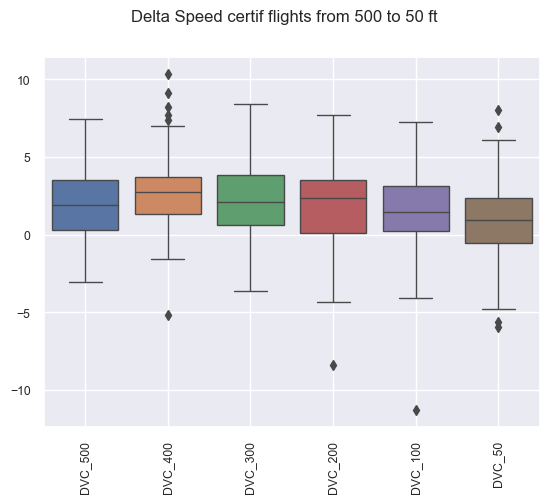

In [158]:
#plots boxplot DVC
#plots boxplot Loc
dvc=dataset[["DVC_500","DVC_400","DVC_300","DVC_200","DVC_100","DVC_50","dev/ctf"]]
dvc_ctf=dvc[(dvc["dev/ctf"]=='CTF')]
ax = sns.boxplot(data=dvc_ctf,linewidth=1)
plt.suptitle("Delta Speed certif flights from 500 to 50 ft")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()

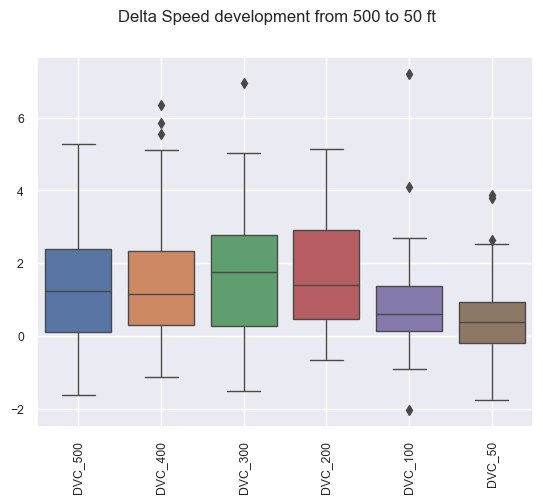

In [159]:
dvc=dataset[["DVC_500","DVC_400","DVC_300","DVC_200","DVC_100","DVC_50","dev/ctf"]]
dvc_dev=dvc[(dvc["dev/ctf"]=='DEV')]
ax = sns.boxplot(data=dvc_dev,linewidth=1)
plt.suptitle("Delta Speed development from 500 to 50 ft")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()

In [162]:
result_DVC_MAX_5_50 = dataset.groupby('dev/ctf').agg({'DVC_MAX_5_50': ['min', 'max','mean','std','count']}) 

In [163]:
result_DVC_MIN_5_50 = dataset.groupby('dev/ctf').agg({'DVC_MIN_5_50': ['min', 'max','mean','std','count']}) 

In [164]:
print ("max DVc between 500 ft - 50ft",result_DVC_MAX_5_50)

max DVc between 500 ft - 50ft         DVC_MAX_5_50                                   
                 min      max      mean       std count
dev/ctf                                                
CTF           1.6303  15.4872  6.735564  2.244298   109
DEV           0.9743  11.0001  3.461046  2.010837    68


In [165]:
print ("min DVc between 500 ft - 50ft",result_DVC_MIN_5_50)

min DVc between 500 ft - 50ft         DVC_MIN_5_50                                  
                 min     max      mean       std count
dev/ctf                                               
CTF         -11.5886  1.3861 -2.501085  2.491322   109
DEV          -5.0624  0.6843 -0.793429  0.912816    68


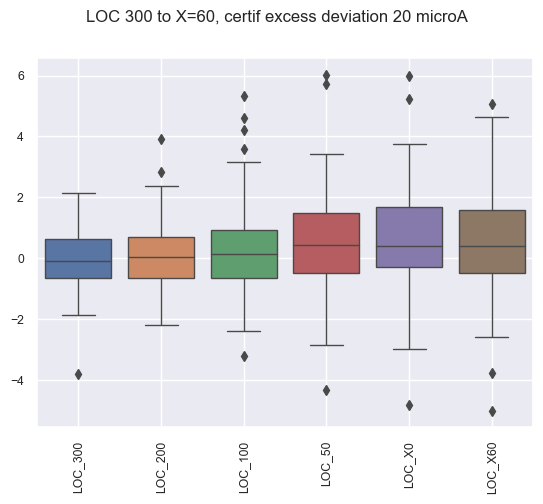

In [172]:
#plots boxplot Loc 300 to X=60 (20 microA Loc)
loc_perfo=dataset[["LOC_300","LOC_200","LOC_100","LOC_50","LOC_X0","LOC_X60","dev/ctf"]]
loc_perfo_ctf=loc_perfo[(loc_perfo["dev/ctf"]=='CTF')]
ax = sns.boxplot(data=loc_perfo_ctf,linewidth=1)
plt.suptitle("LOC 300 to X=60, certif excess deviation 20 microA")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()


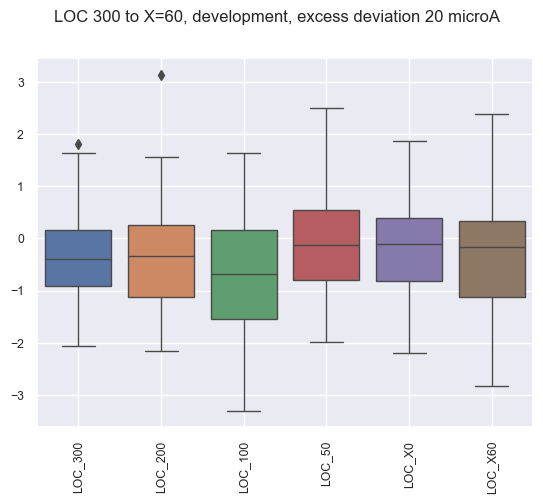

In [174]:
#plots boxplot Loc 300 to X=60 (20 microA Loc)
loc_perfo=dataset[["LOC_300","LOC_200","LOC_100","LOC_50","LOC_X0","LOC_X60","dev/ctf"]]
loc_perfo_dev=loc_perfo[(loc_perfo["dev/ctf"]=='DEV')]
ax = sns.boxplot(data=loc_perfo_dev,linewidth=1)
plt.suptitle("LOC 300 to X=60, development, excess deviation 20 microA")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()


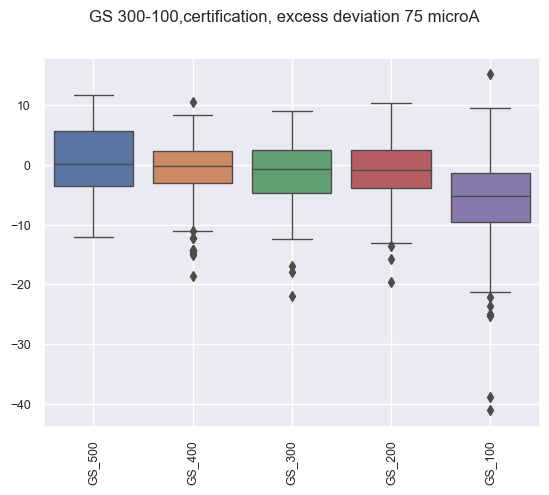

In [182]:
#plots Boxplot GS 300 to 100 75 microA
gs_perfo=dataset[["GS_500", "GS_400","GS_300","GS_200","GS_100","dev/ctf"]]
gs_perfo_ctf=gs_perfo[(gs_perfo["dev/ctf"]=='CTF')]
ax = sns.boxplot(data=gs_perfo_ctf,linewidth=1)
plt.suptitle("GS 300-100,certification, excess deviation 75 microA")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()

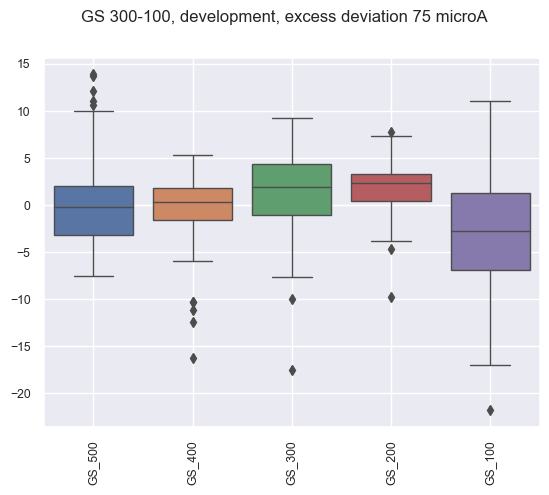

In [183]:
#plots Boxplot GS 300 to 100 75 microA
gs_perfo=dataset[["GS_500", "GS_400","GS_300","GS_200","GS_100","dev/ctf"]]
gs_perfo_dev=gs_perfo[(gs_perfo["dev/ctf"]=='DEV')]
ax = sns.boxplot(data=gs_perfo_dev,linewidth=1)
plt.suptitle("GS 300-100, development, excess deviation 75 microA")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()

In [180]:
result_GS_MAX_500_100 = dataset.groupby('dev/ctf').agg({'GS_MAX_5_1': ['min', 'max','mean','std','count']}) 
print ("perfo GSdev 500 ft 100 ft ",result_GS_MAX_500_100)


perfo GSdev 500 ft 100 ft          GS_MAX_5_1                                     
               min      max       mean        std count
dev/ctf                                                
CTF       -41.4193  22.7691 -10.193341  10.675692   109
DEV       -21.8526  13.6325  -0.343274  10.093745    68


In [181]:
result_LOC_MAX_500_100 = dataset.groupby('dev/ctf').agg({'LOC_MAX_5_15': ['min', 'max','mean','std','count']}) 
print ("perfo LOC dev 500 ft 15 ft ",result_LOC_MAX_500_100)


perfo LOC dev 500 ft 15 ft          LOC_MAX_5_15                                  
                 min     max      mean       std count
dev/ctf                                               
CTF          -5.1294  6.3063  0.687228  2.746012   109
DEV          -3.3906  3.6190 -0.830604  1.850073    68
